# Sleep Health Analysis: Comprehensive Data Science Project

## Project Overview
**Research Question:** How do lifestyle factors (physical activity, stress, occupation) and physiological indicators (BMI, blood pressure, heart rate) predict sleep quality and sleep disorder risk?

**Objectives:**
1. Analyze relationships between lifestyle factors and sleep health
2. Develop predictive models for sleep quality and disorder classification
3. Create actionable insights for sleep health improvement
4. Deploy interactive web application for personalized recommendations

**Dataset:** Sleep Health and Lifestyle Dataset (Kaggle)
- **Source:** https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset
- **Dimensions:** 374 observations × 13 features
- **Target Variables:** Quality of Sleep (regression), Sleep Disorder (classification)

**Author:** Yashwitha Velamuru  
**Course:** CMSE 830 - Foundations of Data Science  
**Institution:** Michigan State University

---

## Table of Contents
1. [Setup and Imports](#setup)
2. [Data Collection and Loading](#data-collection)
3. [Data Cleaning and Validation](#data-cleaning)
4. [Exploratory Data Analysis (EDA)](#eda)
5. [Data Encoding and Transformation](#encoding)
6. [Feature Engineering](#feature-engineering)
7. [Data Scaling and Normalization](#scaling)
8. [Advanced Imputation Techniques](#imputation)
9. [Model Development](#modeling)
10. [Model Evaluation and Comparison](#evaluation)
11. [Advanced Modeling Techniques](#advanced-modeling)
12. [Feature Importance Analysis](#feature-importance)
13. [Clustering and Unsupervised Learning](#clustering)
14. [Results and Insights](#results)

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency, f_oneway, ttest_ind

# Machine Learning - Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer  # Enable experimental feature
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

# Machine Learning - Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                             precision_score, recall_score, f1_score, roc_auc_score, roc_curve,
                             mean_squared_error, mean_absolute_error, r2_score)

# Machine Learning - Models
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor, VotingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Clustering
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Utilities
import json
import os
from datetime import datetime
import joblib

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Set random seed for reproducibility
np.random.seed(42)

print("✓ All libraries imported successfully")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ NumPy version: {np.__version__}")
print(f"✓ Scikit-learn imported")
print(f"✓ Plotly imported")
print("\n" + "="*80)
print("SLEEP HEALTH ANALYSIS - COMPREHENSIVE PROJECT")
print("="*80)

✓ All libraries imported successfully
✓ Pandas version: 2.3.2
✓ NumPy version: 2.0.2
✓ Scikit-learn imported
✓ Plotly imported

SLEEP HEALTH ANALYSIS - COMPREHENSIVE PROJECT


# ============================================================================
# CELL 3: [MARKDOWN]
# ============================================================================

## 1. Data Collection and Loading

### Dataset Information
The Sleep Health and Lifestyle Dataset contains comprehensive information about sleep patterns, lifestyle factors, and health indicators for 374 individuals.

**Features:**
- **Demographics:** Person ID, Gender, Age, Occupation
- **Sleep Metrics:** Sleep Duration, Quality of Sleep
- **Lifestyle Factors:** Physical Activity Level, Daily Steps, Stress Level
- **Health Indicators:** BMI Category, Blood Pressure, Heart Rate
- **Target Variable:** Sleep Disorder (None, Insomnia, Sleep Apnea)

In [5]:
# ============================================================================
# CELL 4: [CODE] - Data Loading
# ============================================================================

# Load dataset
file_path = r"C:\Users\HP\Desktop\FinalProject_EndTerm\Sleep_health_and_lifestyle_dataset.csv"

try:
    df = pd.read_csv(file_path)
    print("✓ Dataset loaded successfully")
    print(f"✓ Dataset shape: {df.shape}")
    print(f"✓ Number of observations: {df.shape[0]}")
    print(f"✓ Number of features: {df.shape[1]}")
except FileNotFoundError:
    print("❌ Error: Dataset file not found!")
    print(f"Expected location: {file_path}")
    print("Please ensure the CSV file is in the correct location.")

print("\n" + "="*80)
print("DATASET PREVIEW")
print("="*80)
print("\nFirst 5 rows:")
display(df.head())

print("\n" + "="*80)
print("DATASET STRUCTURE")
print("="*80)
df.info()

✓ Dataset loaded successfully
✓ Dataset shape: (374, 13)
✓ Number of observations: 374
✓ Number of features: 13

DATASET PREVIEW

First 5 rows:


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea



DATASET STRUCTURE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
# ============================================================================
# CELL 5: [CODE] - Initial Data Exploration
# ============================================================================

print("="*80)
print("COLUMN NAMES AND DATA TYPES")
print("="*80)
for idx, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{idx:2d}. {col:30s} → {str(dtype):10s}")

print("\n" + "="*80)
print("BASIC STATISTICS - NUMERICAL FEATURES")
print("="*80)
display(df.describe())

print("\n" + "="*80)
print("BASIC STATISTICS - CATEGORICAL FEATURES")
print("="*80)
display(df.describe(include=['object']))

print("\n" + "="*80)
print("UNIQUE VALUES PER COLUMN")
print("="*80)
for col in df.columns:
    n_unique = df[col].nunique()
    print(f"{col:30s} → {n_unique:3d} unique values")

COLUMN NAMES AND DATA TYPES
 1. Person ID                      → int64     
 2. Gender                         → object    
 3. Age                            → int64     
 4. Occupation                     → object    
 5. Sleep Duration                 → float64   
 6. Quality of Sleep               → int64     
 7. Physical Activity Level        → int64     
 8. Stress Level                   → int64     
 9. BMI Category                   → object    
10. Blood Pressure                 → object    
11. Heart Rate                     → int64     
12. Daily Steps                    → int64     
13. Sleep Disorder                 → object    

BASIC STATISTICS - NUMERICAL FEATURES


,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000



BASIC STATISTICS - CATEGORICAL FEATURES


,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,155
unique,2,11,4,25,2
top,Male,Nurse,Normal,130/85,Sleep Apnea
freq,189,73,195,99,78



UNIQUE VALUES PER COLUMN
Person ID                      → 374 unique values
Gender                         →   2 unique values
Age                            →  31 unique values
Occupation                     →  11 unique values
Sleep Duration                 →  27 unique values
Quality of Sleep               →   6 unique values
Physical Activity Level        →  16 unique values
Stress Level                   →   6 unique values
BMI Category                   →   4 unique values
Blood Pressure                 →  25 unique values
Heart Rate                     →  19 unique values
Daily Steps                    →  20 unique values
Sleep Disorder                 →   2 unique values


# ============================================================================
# CELL 6: [MARKDOWN]
# ============================================================================

## 2. Data Cleaning and Validation

### Data Quality Checks
Comprehensive data quality assessment including:
1. **Duplicate Detection:** Identify and remove duplicate records
2. **Missing Value Analysis:** Quantify and visualize missing data
3. **Outlier Detection:** Use IQR method to identify anomalies
4. **Data Type Validation:** Ensure appropriate data types
5. **Range Validation:** Verify physiological measures are within normal ranges


In [7]:
# ============================================================================
# CELL 7: [CODE] - Duplicate Detection
# ============================================================================

print("="*80)
print("DUPLICATE DETECTION")
print("="*80)

# Check for duplicate rows
duplicates = df.duplicated()
n_duplicates = duplicates.sum()

print(f"\n📊 Duplicate Analysis:")
print(f"   • Total rows: {len(df)}")
print(f"   • Duplicate rows: {n_duplicates}")
print(f"   • Duplicate percentage: {(n_duplicates/len(df)*100):.2f}%")

if n_duplicates > 0:
    print(f"\n⚠️  Found {n_duplicates} duplicate rows")
    print("\nDuplicate rows:")
    display(df[duplicates])
    
    # Remove duplicates
    df_clean = df.drop_duplicates()
    print(f"\n✓ Duplicates removed. New shape: {df_clean.shape}")
else:
    print("\n✓ No duplicate rows found")
    df_clean = df.copy()


DUPLICATE DETECTION

📊 Duplicate Analysis:
   • Total rows: 374
   • Duplicate rows: 0
   • Duplicate percentage: 0.00%

✓ No duplicate rows found


MISSING VALUE ANALYSIS

📊 Missing Value Summary:
   • Total columns with missing values: 1
   • Total missing values: 219

Detailed breakdown:


,Column,Missing_Count,Missing_Percentage,Data_Type
12,Sleep Disorder,219,58.55615,object


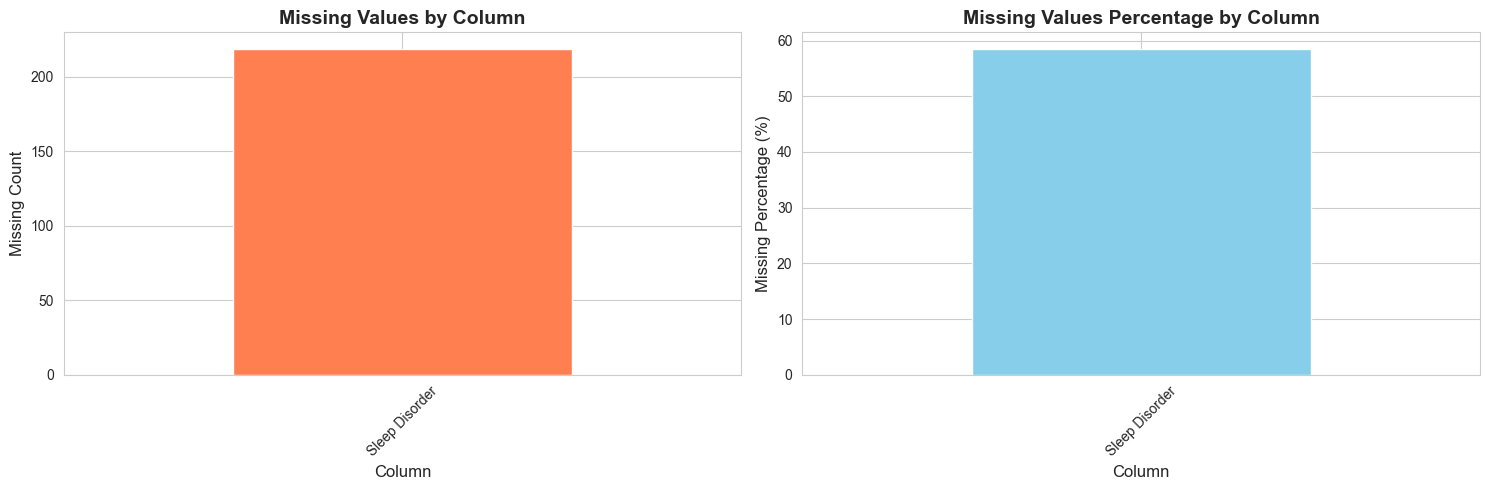


SLEEP DISORDER COLUMN ANALYSIS

Value counts (including NaN):
Sleep Disorder
NaN            219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

Interpretation:
   • NaN values represent individuals WITHOUT diagnosed sleep disorders
   • This is meaningful categorical data, not missing data
   • We will treat NaN as 'None' category (no disorder)


In [8]:

# ============================================================================
# CELL 8: [CODE] - Missing Value Analysis
# ============================================================================

print("="*80)
print("MISSING VALUE ANALYSIS")
print("="*80)

# Calculate missing values
missing_values = df_clean.isnull().sum()
missing_percent = (missing_values / len(df_clean)) * 100

# Create missing value dataframe
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percent.values,
    'Data_Type': df_clean.dtypes.values
})

# Filter to show only columns with missing values
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print(f"\n📊 Missing Value Summary:")
    print(f"   • Total columns with missing values: {len(missing_df)}")
    print(f"   • Total missing values: {missing_df['Missing_Count'].sum()}")
    print("\nDetailed breakdown:")
    display(missing_df)
    
    # Visualize missing values
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar plot
    missing_df.plot(x='Column', y='Missing_Count', kind='bar', ax=ax1, color='coral', legend=False)
    ax1.set_title('Missing Values by Column', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Column', fontsize=12)
    ax1.set_ylabel('Missing Count', fontsize=12)
    ax1.tick_params(axis='x', rotation=45)
    
    # Percentage plot
    missing_df.plot(x='Column', y='Missing_Percentage', kind='bar', ax=ax2, color='skyblue', legend=False)
    ax2.set_title('Missing Values Percentage by Column', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Column', fontsize=12)
    ax2.set_ylabel('Missing Percentage (%)', fontsize=12)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values found in any column!")

# Analyze Sleep Disorder column specifically
print("\n" + "="*80)
print("SLEEP DISORDER COLUMN ANALYSIS")
print("="*80)
print("\nValue counts (including NaN):")
print(df_clean['Sleep Disorder'].value_counts(dropna=False))
print(f"\nInterpretation:")
print(f"   • NaN values represent individuals WITHOUT diagnosed sleep disorders")
print(f"   • This is meaningful categorical data, not missing data")
print(f"   • We will treat NaN as 'None' category (no disorder)")


OUTLIER DETECTION (IQR METHOD)

📊 Analyzing 7 numerical features for outliers

✓  Age                            → No outliers
✓  Sleep Duration                 → No outliers
✓  Quality of Sleep               → No outliers
✓  Physical Activity Level        → No outliers
✓  Stress Level                   → No outliers
⚠️  Heart Rate                     →  15 outliers (4.01%)
✓  Daily Steps                    → No outliers

OUTLIER SUMMARY TABLE


,Feature,Q1,Q3,IQR,Lower_Bound,Upper_Bound,Outliers,Outlier_%
5,Heart Rate,68.0,72.0,4.0,62.0,78.0,15,4.010695


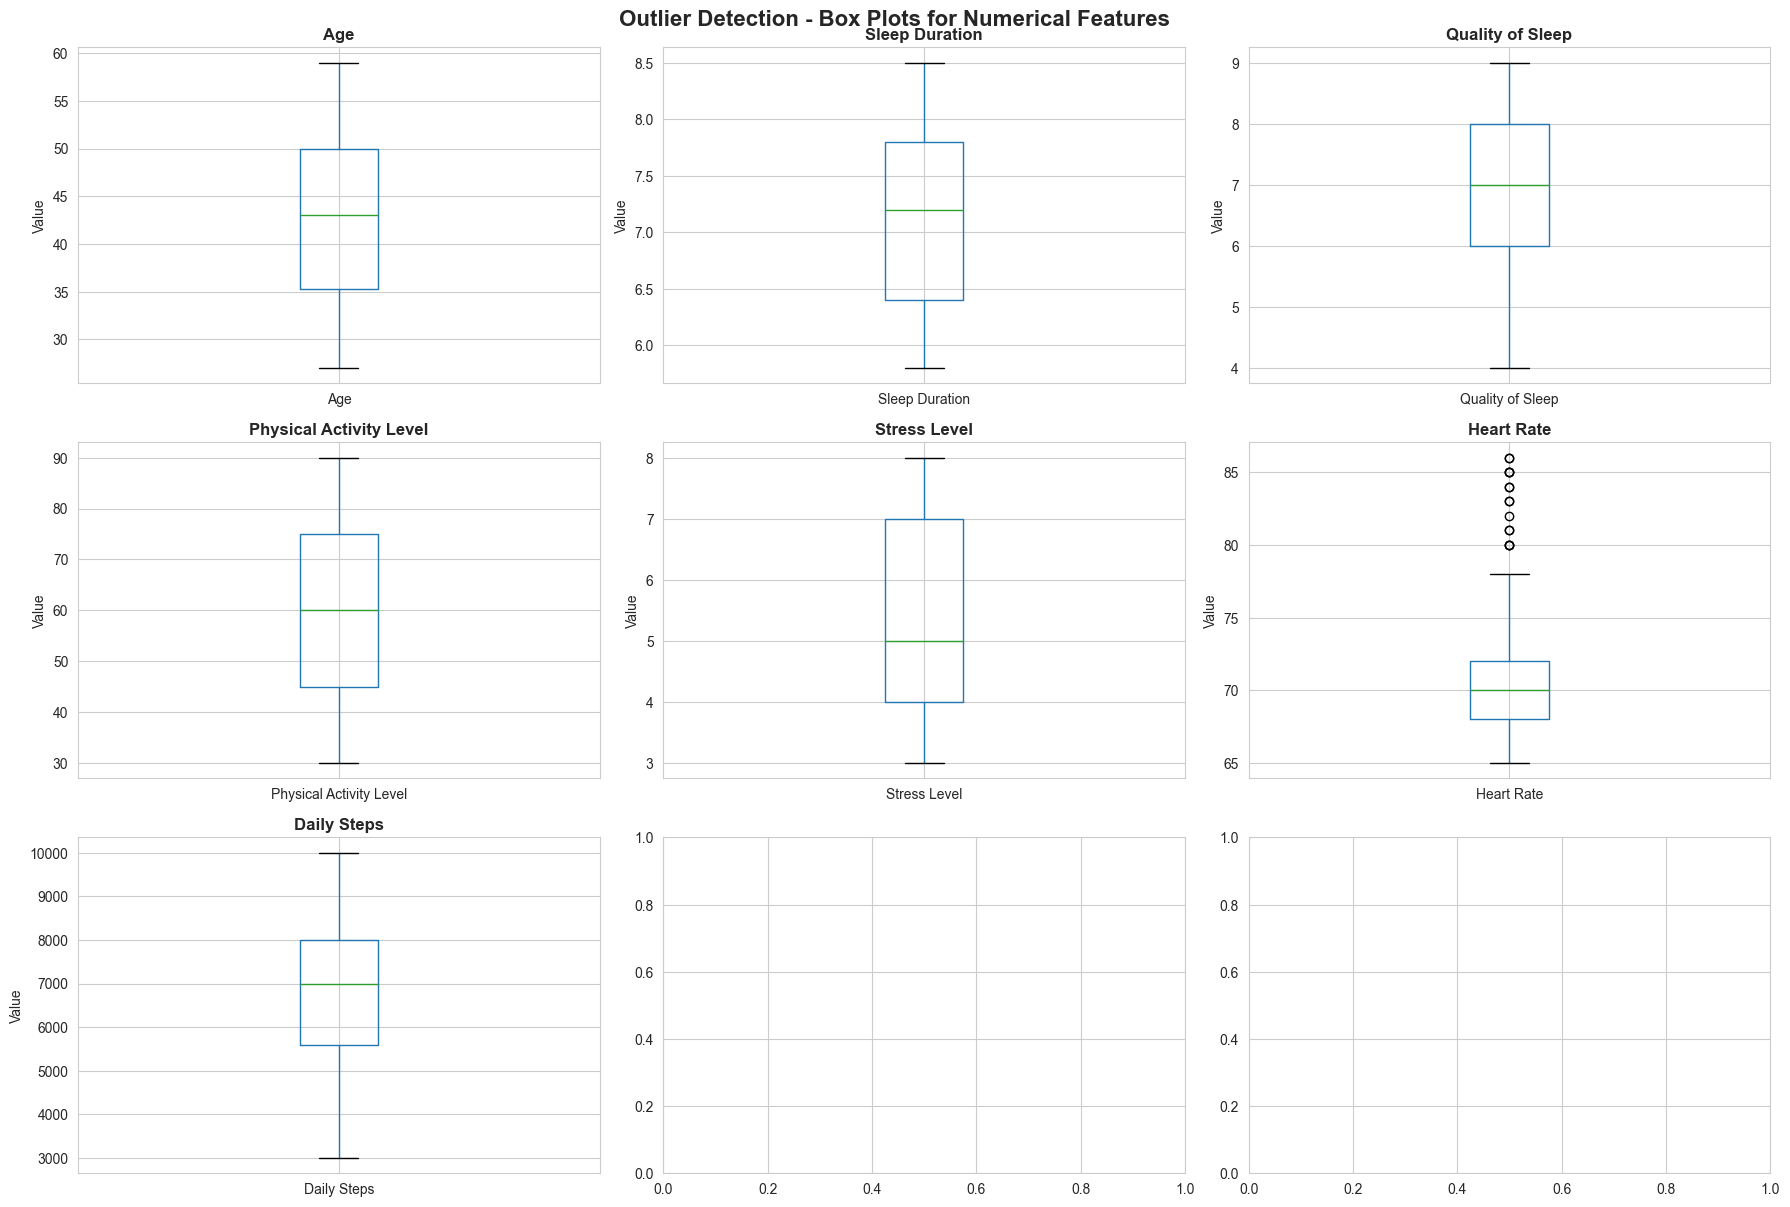


💡 Interpretation:
   • Outliers in physiological data (Heart Rate, BP) may represent health conditions
   • These are retained as they provide valuable information for sleep disorder prediction
   • No outliers will be removed - all data points are clinically meaningful


In [9]:

# ============================================================================
# CELL 9: [CODE] - Outlier Detection
# ============================================================================

print("="*80)
print("OUTLIER DETECTION (IQR METHOD)")
print("="*80)

# Select numerical columns for outlier detection
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
# Remove Person ID as it's just an identifier
numerical_cols = [col for col in numerical_cols if col != 'Person ID']

print(f"\n📊 Analyzing {len(numerical_cols)} numerical features for outliers\n")

outlier_summary = []

for col in numerical_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)]
    n_outliers = len(outliers)
    outlier_percent = (n_outliers / len(df_clean)) * 100
    
    outlier_summary.append({
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower_Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outliers': n_outliers,
        'Outlier_%': outlier_percent
    })
    
    if n_outliers > 0:
        print(f"⚠️  {col:30s} → {n_outliers:3d} outliers ({outlier_percent:.2f}%)")
    else:
        print(f"✓  {col:30s} → No outliers")

outlier_df = pd.DataFrame(outlier_summary)

print("\n" + "="*80)
print("OUTLIER SUMMARY TABLE")
print("="*80)
display(outlier_df[outlier_df['Outliers'] > 0])

# Visualize outliers with box plots
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        df_clean.boxplot(column=col, ax=axes[idx])
        axes[idx].set_title(f'{col}', fontsize=12, fontweight='bold')
        axes[idx].set_ylabel('Value', fontsize=10)

plt.tight_layout()
plt.suptitle('Outlier Detection - Box Plots for Numerical Features', fontsize=16, fontweight='bold', y=1.002)
plt.show()

print("\n💡 Interpretation:")
print("   • Outliers in physiological data (Heart Rate, BP) may represent health conditions")
print("   • These are retained as they provide valuable information for sleep disorder prediction")
print("   • No outliers will be removed - all data points are clinically meaningful")


In [10]:

# ============================================================================
# CELL 10: [CODE] - Data Type Validation and Range Checks
# ============================================================================

print("="*80)
print("DATA TYPE VALIDATION AND RANGE CHECKS")
print("="*80)

# Define expected ranges for physiological measures
physiological_ranges = {
    'Age': (27, 59, 'years'),
    'Sleep Duration': (5.5, 8.5, 'hours'),
    'Quality of Sleep': (1, 10, 'rating'),
    'Physical Activity Level': (30, 90, 'minutes'),
    'Stress Level': (1, 10, 'rating'),
    'Heart Rate': (60, 90, 'bpm'),
    'Daily Steps': (3000, 10000, 'steps')
}

print("\n📊 Physiological Range Validation:\n")

for feature, (min_val, max_val, unit) in physiological_ranges.items():
    if feature in df_clean.columns:
        actual_min = df_clean[feature].min()
        actual_max = df_clean[feature].max()
        
        in_range = (actual_min >= min_val * 0.9) and (actual_max <= max_val * 1.1)
        status = "✓" if in_range else "⚠️"
        
        print(f"{status} {feature:30s}")
        print(f"   Expected range: {min_val:6.1f} - {max_val:6.1f} {unit}")
        print(f"   Actual range:   {actual_min:6.1f} - {actual_max:6.1f} {unit}")
        print()


DATA TYPE VALIDATION AND RANGE CHECKS

📊 Physiological Range Validation:

✓ Age                           
   Expected range:   27.0 -   59.0 years
   Actual range:     27.0 -   59.0 years

✓ Sleep Duration                
   Expected range:    5.5 -    8.5 hours
   Actual range:      5.8 -    8.5 hours

✓ Quality of Sleep              
   Expected range:    1.0 -   10.0 rating
   Actual range:      4.0 -    9.0 rating

✓ Physical Activity Level       
   Expected range:   30.0 -   90.0 minutes
   Actual range:     30.0 -   90.0 minutes

✓ Stress Level                  
   Expected range:    1.0 -   10.0 rating
   Actual range:      3.0 -    8.0 rating

✓ Heart Rate                    
   Expected range:   60.0 -   90.0 bpm
   Actual range:     65.0 -   86.0 bpm

✓ Daily Steps                   
   Expected range: 3000.0 - 10000.0 steps
   Actual range:   3000.0 - 10000.0 steps




# ============================================================================
# CELL 11: [MARKDOWN]
# ============================================================================

## 3. Exploratory Data Analysis (EDA)

### Comprehensive Statistical Analysis
In-depth exploration including:
1. **Univariate Analysis:** Distribution of each feature
2. **Bivariate Analysis:** Relationships between features and targets
3. **Multivariate Analysis:** Complex interactions and correlations
4. **Statistical Testing:** Hypothesis testing for group differences
5. **Visualization:** Multiple chart types for insight communication

DISTRIBUTION ANALYSIS - NUMERICAL FEATURES


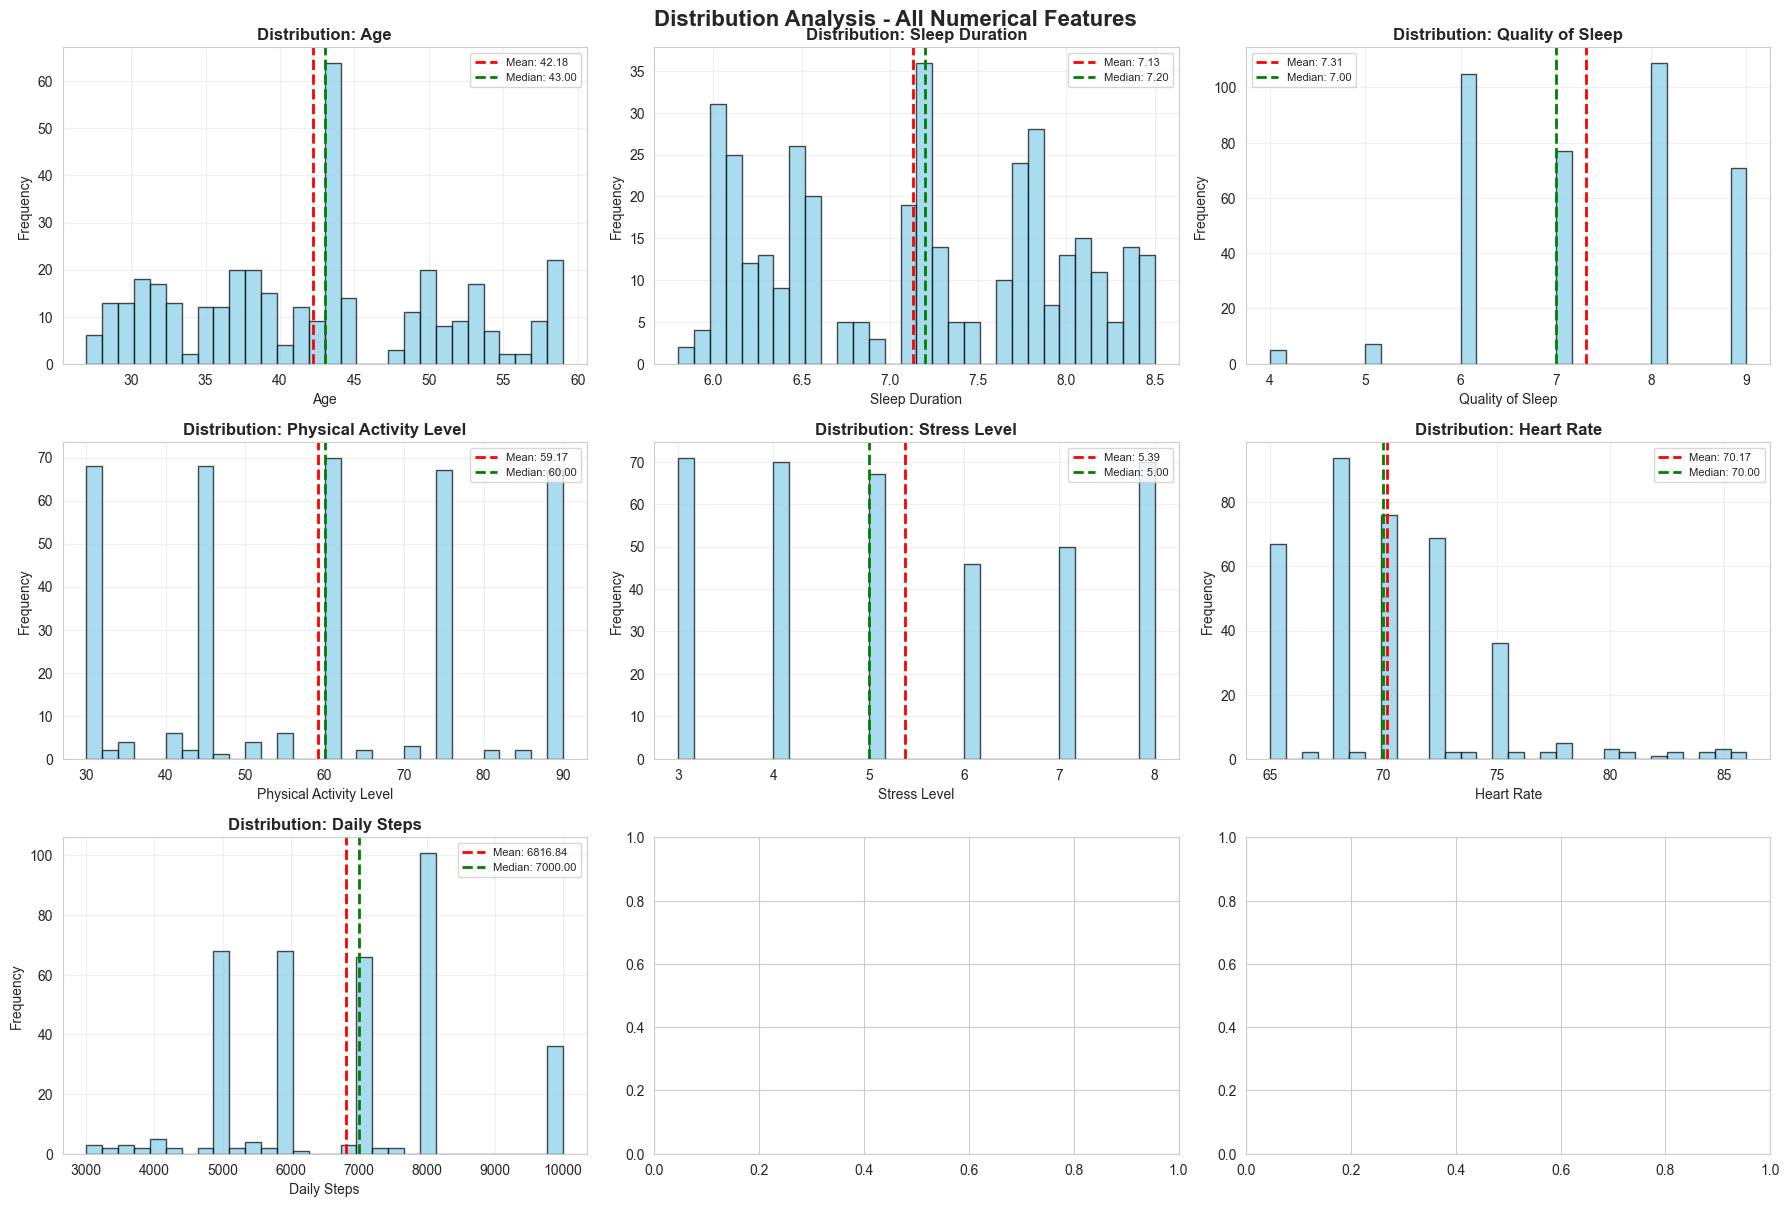


STATISTICAL SUMMARY - KEY METRICS


,mean,median,std,min,max,skew,kurt
Age,42.184492,43.0,8.673133,27.0,59.0,0.257222,-0.909780
Sleep Duration,7.132086,7.2,0.795657,5.8,8.5,0.037554,-1.286506
Quality of Sleep,7.312834,7.0,1.196956,4.0,9.0,-0.207448,-0.748276
Physical Activity Level,59.171123,60.0,20.830804,30.0,90.0,0.074487,-1.266068
Stress Level,5.385027,5.0,1.774526,3.0,8.0,0.154330,-1.327307
Heart Rate,70.165775,70.0,4.135676,65.0,86.0,1.224824,2.286455
Daily Steps,6816.844920,7000.0,1617.915679,3000.0,10000.0,0.178277,-0.394031


In [11]:

# ============================================================================
# CELL 12: [CODE] - Distribution Analysis - Numerical Features
# ============================================================================

print("="*80)
print("DISTRIBUTION ANALYSIS - NUMERICAL FEATURES")
print("="*80)

# Create comprehensive distribution plots
numerical_cols_for_dist = [col for col in numerical_cols if col != 'Person ID']

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols_for_dist):
    if idx < len(axes):
        # Histogram with KDE
        axes[idx].hist(df_clean[col], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[idx].axvline(df_clean[col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_clean[col].mean():.2f}')
        axes[idx].axvline(df_clean[col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_clean[col].median():.2f}')
        axes[idx].set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Frequency', fontsize=10)
        axes[idx].legend(fontsize=8)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Distribution Analysis - All Numerical Features', fontsize=16, fontweight='bold', y=1.002)
plt.show()

# Statistical summary
print("\n" + "="*80)
print("STATISTICAL SUMMARY - KEY METRICS")
print("="*80)

summary_stats = df_clean[numerical_cols_for_dist].agg(['mean', 'median', 'std', 'min', 'max', 'skew', 'kurt'])
display(summary_stats.T)


DISTRIBUTION ANALYSIS - CATEGORICAL FEATURES


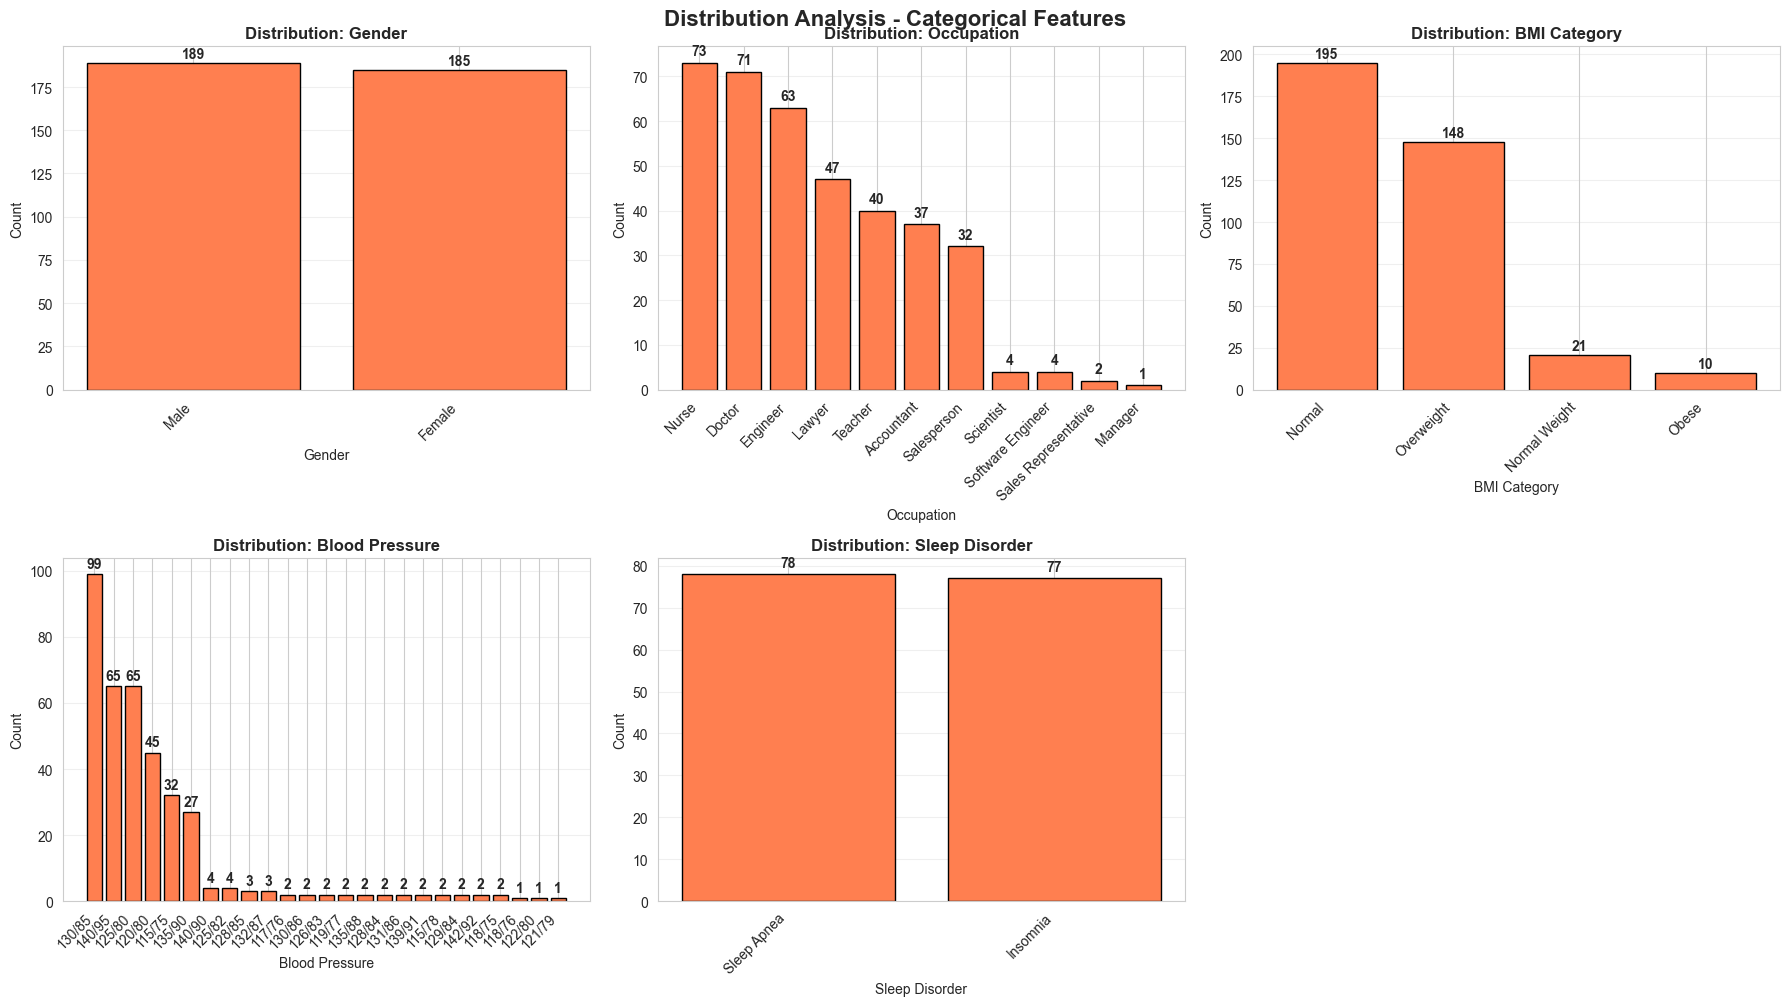


CATEGORICAL FEATURE VALUE COUNTS

Gender:
Gender
Male      189
Female    185
Name: count, dtype: int64

Percentage distribution:
Gender
Male      50.534759
Female    49.465241
Name: proportion, dtype: float64
------------------------------------------------------------

Occupation:
Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Scientist                4
Software Engineer        4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

Percentage distribution:
Occupation
Nurse                   19.518717
Doctor                  18.983957
Engineer                16.844920
Lawyer                  12.566845
Teacher                 10.695187
Accountant               9.893048
Salesperson              8.556150
Scientist                1.069519
Software Engineer        1.069519
Sales Representative     0.534759
Manag

In [12]:

# ============================================================================
# CELL 13: [CODE] - Distribution Analysis - Categorical Features
# ============================================================================

print("="*80)
print("DISTRIBUTION ANALYSIS - CATEGORICAL FEATURES")
print("="*80)

categorical_cols = df_clean.select_dtypes(include=['object']).columns.tolist()

# Create count plots for categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        value_counts = df_clean[col].value_counts()
        axes[idx].bar(range(len(value_counts)), value_counts.values, color='coral', edgecolor='black')
        axes[idx].set_title(f'Distribution: {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col, fontsize=10)
        axes[idx].set_ylabel('Count', fontsize=10)
        axes[idx].set_xticks(range(len(value_counts)))
        axes[idx].set_xticklabels(value_counts.index, rotation=45, ha='right')
        axes[idx].grid(True, alpha=0.3, axis='y')
        
        # Add value labels on bars
        for i, v in enumerate(value_counts.values):
            axes[idx].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

# Hide extra subplots
for idx in range(len(categorical_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.suptitle('Distribution Analysis - Categorical Features', fontsize=16, fontweight='bold', y=1.002)
plt.show()

# Print detailed counts
print("\n" + "="*80)
print("CATEGORICAL FEATURE VALUE COUNTS")
print("="*80)

for col in categorical_cols:
    print(f"\n{col}:")
    print(df_clean[col].value_counts())
    print(f"\nPercentage distribution:")
    print(df_clean[col].value_counts(normalize=True) * 100)
    print("-" * 60)


TARGET VARIABLE ANALYSIS

📊 QUALITY OF SLEEP (Regression Target)
Mean           :    7.313
Median         :    7.000
Std Dev        :    1.197
Min            :    4.000
Max            :    9.000
Range          :    5.000
Skewness       :   -0.207
Kurtosis       :   -0.748


📊 SLEEP DISORDER (Classification Target)

Class Distribution:
   • None           : 219 (58.56%)
   • Sleep Apnea    :  78 (20.86%)
   • Insomnia       :  77 (20.59%)

Total Observations: 374
Number of Classes: 3


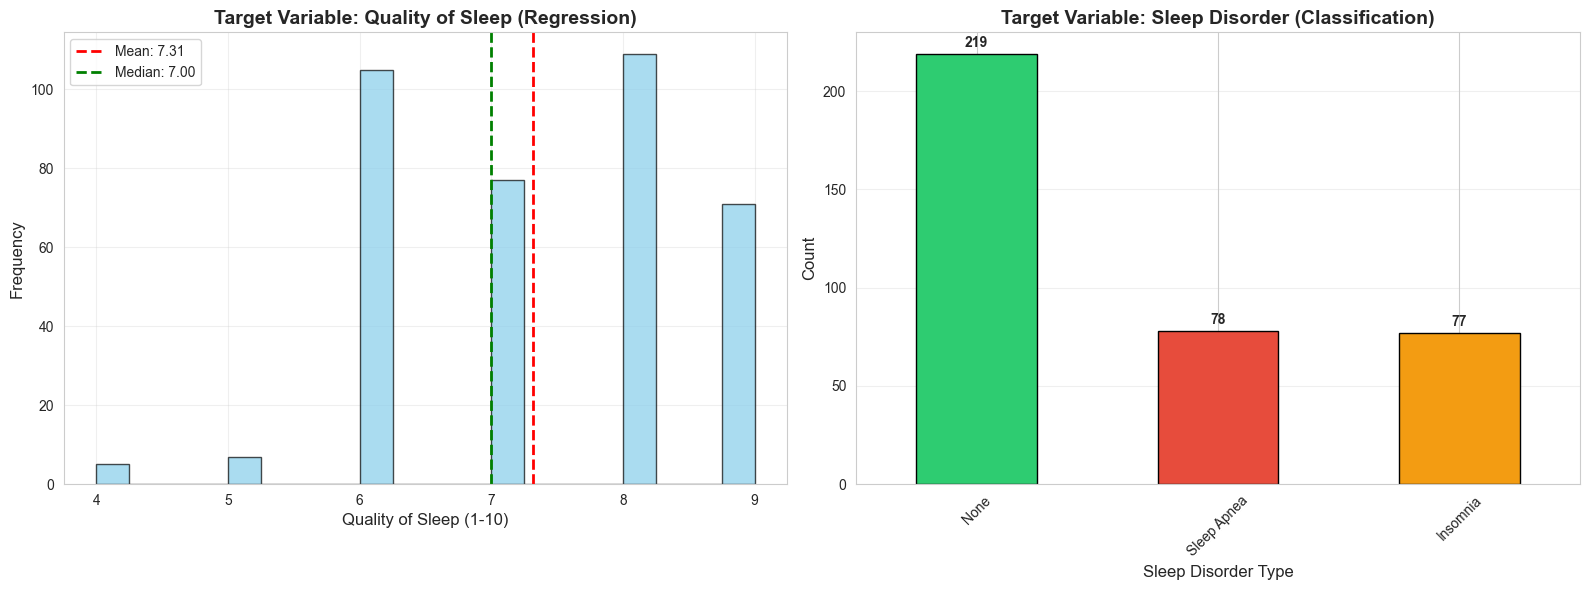

In [13]:

# ============================================================================
# CELL 14: [CODE] - Target Variable Analysis
# ============================================================================

print("="*80)
print("TARGET VARIABLE ANALYSIS")
print("="*80)

# Analyze Quality of Sleep (Regression Target)
print("\n📊 QUALITY OF SLEEP (Regression Target)")
print("=" * 60)

sleep_quality_stats = {
    'Mean': df_clean['Quality of Sleep'].mean(),
    'Median': df_clean['Quality of Sleep'].median(),
    'Std Dev': df_clean['Quality of Sleep'].std(),
    'Min': df_clean['Quality of Sleep'].min(),
    'Max': df_clean['Quality of Sleep'].max(),
    'Range': df_clean['Quality of Sleep'].max() - df_clean['Quality of Sleep'].min(),
    'Skewness': df_clean['Quality of Sleep'].skew(),
    'Kurtosis': df_clean['Quality of Sleep'].kurt()
}

for metric, value in sleep_quality_stats.items():
    print(f"{metric:15s}: {value:8.3f}")

# Analyze Sleep Disorder (Classification Target)
print("\n\n📊 SLEEP DISORDER (Classification Target)")
print("=" * 60)

# Handle NaN as "None" category
df_clean['Sleep Disorder'] = df_clean['Sleep Disorder'].fillna('None')

sleep_disorder_counts = df_clean['Sleep Disorder'].value_counts()
sleep_disorder_percent = df_clean['Sleep Disorder'].value_counts(normalize=True) * 100

print("\nClass Distribution:")
for disorder, count in sleep_disorder_counts.items():
    percent = sleep_disorder_percent[disorder]
    print(f"   • {disorder:15s}: {count:3d} ({percent:5.2f}%)")

print(f"\nTotal Observations: {len(df_clean)}")
print(f"Number of Classes: {df_clean['Sleep Disorder'].nunique()}")

# Visualize target variables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Quality of Sleep distribution
ax1.hist(df_clean['Quality of Sleep'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(df_clean['Quality of Sleep'].mean(), color='red', linestyle='--', linewidth=2, label=f"Mean: {df_clean['Quality of Sleep'].mean():.2f}")
ax1.axvline(df_clean['Quality of Sleep'].median(), color='green', linestyle='--', linewidth=2, label=f"Median: {df_clean['Quality of Sleep'].median():.2f}")
ax1.set_title('Target Variable: Quality of Sleep (Regression)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Quality of Sleep (1-10)', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Sleep Disorder distribution
sleep_disorder_counts.plot(kind='bar', ax=ax2, color=['#2ecc71', '#e74c3c', '#f39c12'], edgecolor='black')
ax2.set_title('Target Variable: Sleep Disorder (Classification)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sleep Disorder Type', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(sleep_disorder_counts.values):
    ax2.text(i, v + 2, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


CORRELATION ANALYSIS


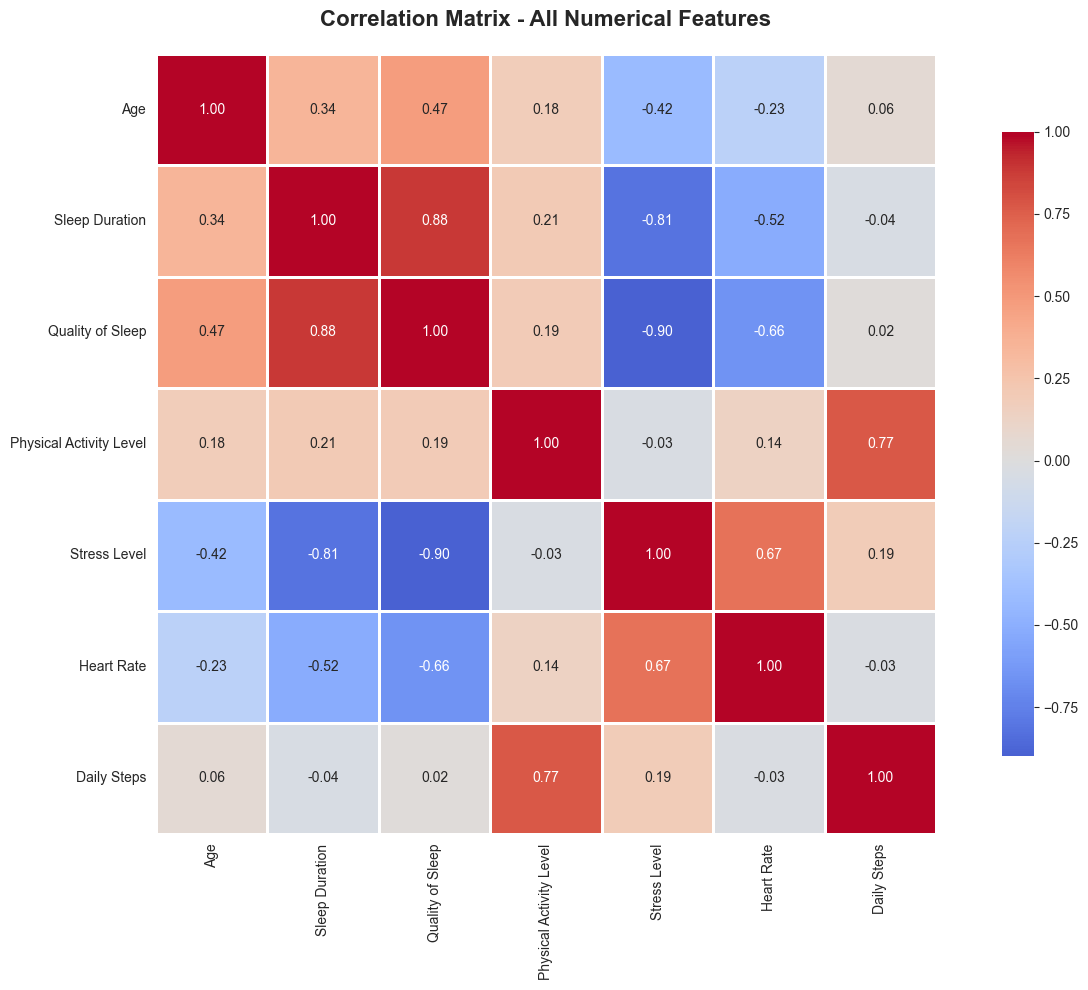


TOP CORRELATIONS WITH QUALITY OF SLEEP

Correlations (sorted by absolute value):
   • Sleep Duration                :  +0.883  [Very Strong ] ↑ Positive
   • Age                           :  +0.474  [Moderate    ] ↑ Positive
   • Physical Activity Level       :  +0.193  [Weak        ] ↑ Positive
   • Daily Steps                   :  +0.017  [Weak        ] ↑ Positive
   • Heart Rate                    :  -0.660  [Strong      ] ↓ Negative
   • Stress Level                  :  -0.899  [Very Strong ] ↓ Negative

ALL STRONG CORRELATIONS (|r| > 0.5)


,Feature 1,Feature 2,Correlation
3,Quality of Sleep,Stress Level,-0.898752
0,Sleep Duration,Quality of Sleep,0.883213
1,Sleep Duration,Stress Level,-0.811023
5,Physical Activity Level,Daily Steps,0.772723
6,Stress Level,Heart Rate,0.670026
4,Quality of Sleep,Heart Rate,-0.659865
2,Sleep Duration,Heart Rate,-0.516455


In [14]:

# ============================================================================
# CELL 15: [CODE] - Correlation Analysis
# ============================================================================

print("="*80)
print("CORRELATION ANALYSIS")
print("="*80)

# Calculate correlation matrix for numerical features
correlation_matrix = df_clean[numerical_cols_for_dist].corr()

# Create heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Find strongest correlations with Quality of Sleep
print("\n" + "="*80)
print("TOP CORRELATIONS WITH QUALITY OF SLEEP")
print("="*80)

sleep_quality_corr = correlation_matrix['Quality of Sleep'].sort_values(ascending=False)
print("\nCorrelations (sorted by absolute value):")
for feature, corr_value in sleep_quality_corr.items():
    if feature != 'Quality of Sleep':
        direction = "↑ Positive" if corr_value > 0 else "↓ Negative"
        strength = "Very Strong" if abs(corr_value) > 0.7 else "Strong" if abs(corr_value) > 0.5 else "Moderate" if abs(corr_value) > 0.3 else "Weak"
        print(f"   • {feature:30s}: {corr_value:+7.3f}  [{strength:12s}] {direction}")

# Find all strong correlations (|r| > 0.5)
print("\n" + "="*80)
print("ALL STRONG CORRELATIONS (|r| > 0.5)")
print("="*80)

strong_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            strong_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

strong_corr_df = pd.DataFrame(strong_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
display(strong_corr_df)


BIVARIATE ANALYSIS - SLEEP QUALITY VS KEY FEATURES


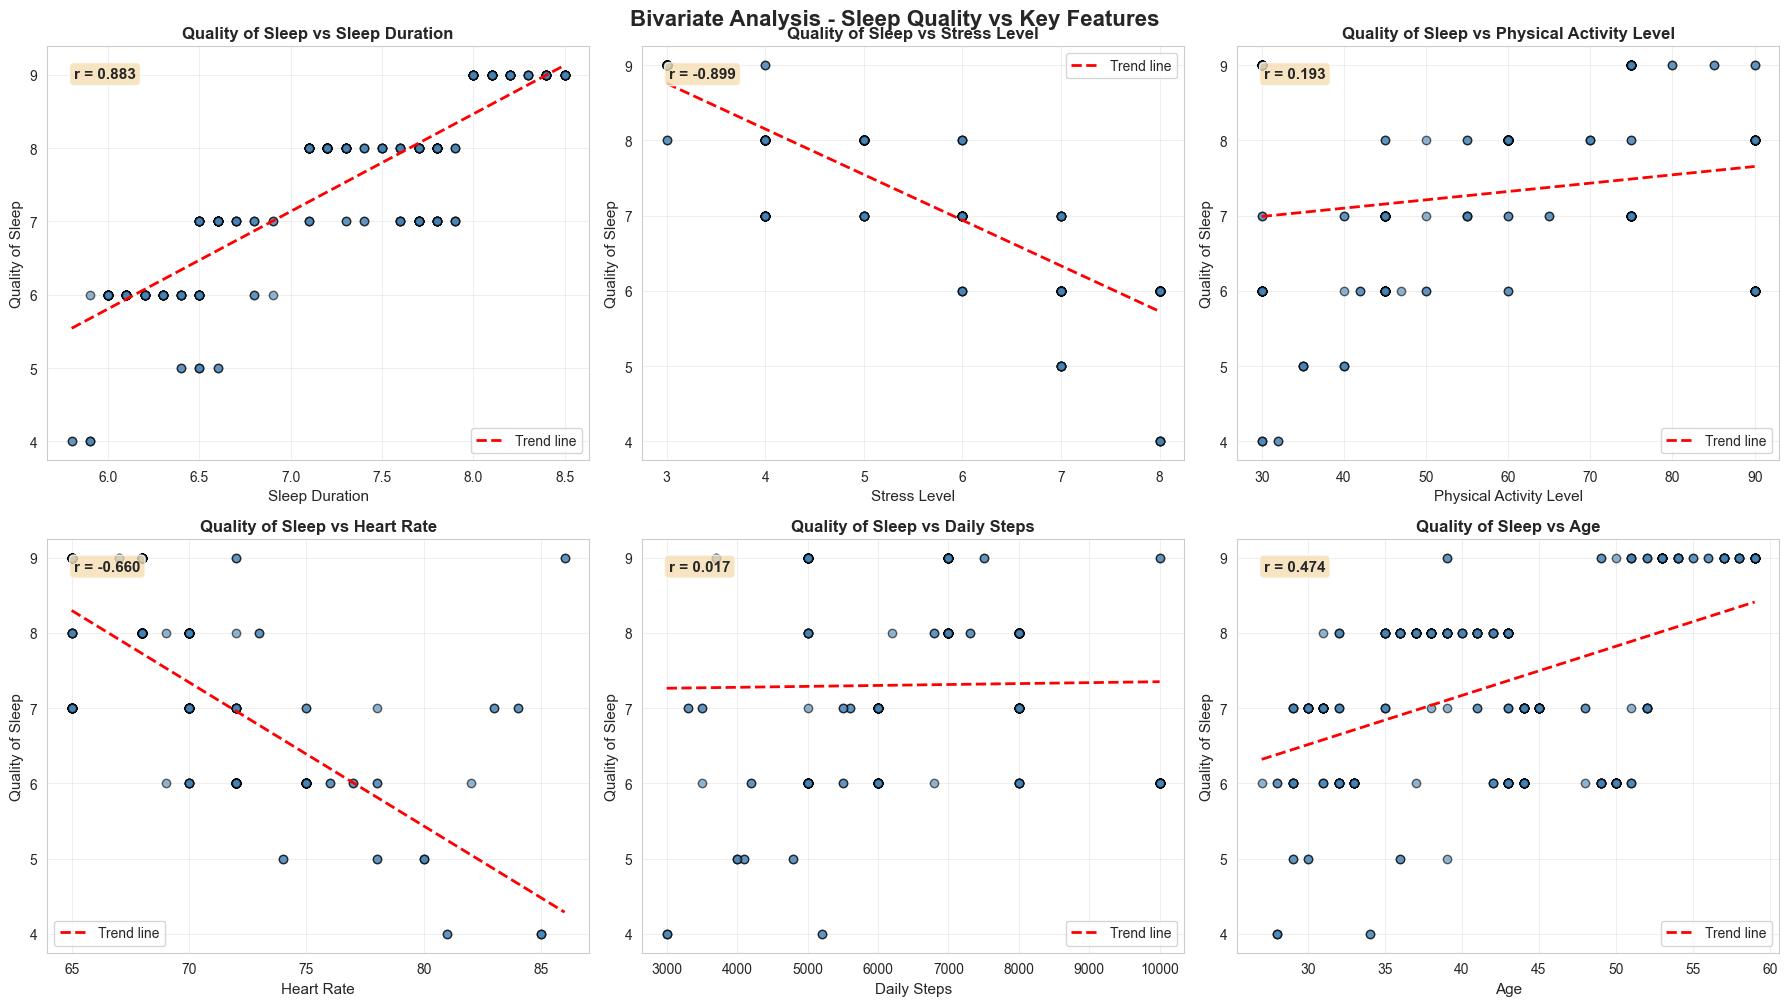

In [15]:

# ============================================================================
# CELL 16: [CODE] - Bivariate Analysis - Sleep Quality vs Features
# ============================================================================

print("="*80)
print("BIVARIATE ANALYSIS - SLEEP QUALITY VS KEY FEATURES")
print("="*80)

# Select key features for bivariate analysis
key_features = ['Sleep Duration', 'Stress Level', 'Physical Activity Level', 'Heart Rate', 'Daily Steps', 'Age']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    # Scatter plot with regression line
    axes[idx].scatter(df_clean[feature], df_clean['Quality of Sleep'], alpha=0.6, color='steelblue', edgecolors='black')
    
    # Add regression line
    z = np.polyfit(df_clean[feature], df_clean['Quality of Sleep'], 1)
    p = np.poly1d(z)
    axes[idx].plot(df_clean[feature].sort_values(), p(df_clean[feature].sort_values()), 
                   "r--", linewidth=2, label=f'Trend line')
    
    # Calculate and display correlation
    corr = df_clean[feature].corr(df_clean['Quality of Sleep'])
    axes[idx].text(0.05, 0.95, f'r = {corr:.3f}', transform=axes[idx].transAxes,
                   fontsize=11, fontweight='bold', verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    axes[idx].set_xlabel(feature, fontsize=11)
    axes[idx].set_ylabel('Quality of Sleep', fontsize=11)
    axes[idx].set_title(f'Quality of Sleep vs {feature}', fontsize=12, fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend()

plt.tight_layout()
plt.suptitle('Bivariate Analysis - Sleep Quality vs Key Features', fontsize=16, fontweight='bold', y=1.002)
plt.show()


SLEEP DISORDER ANALYSIS


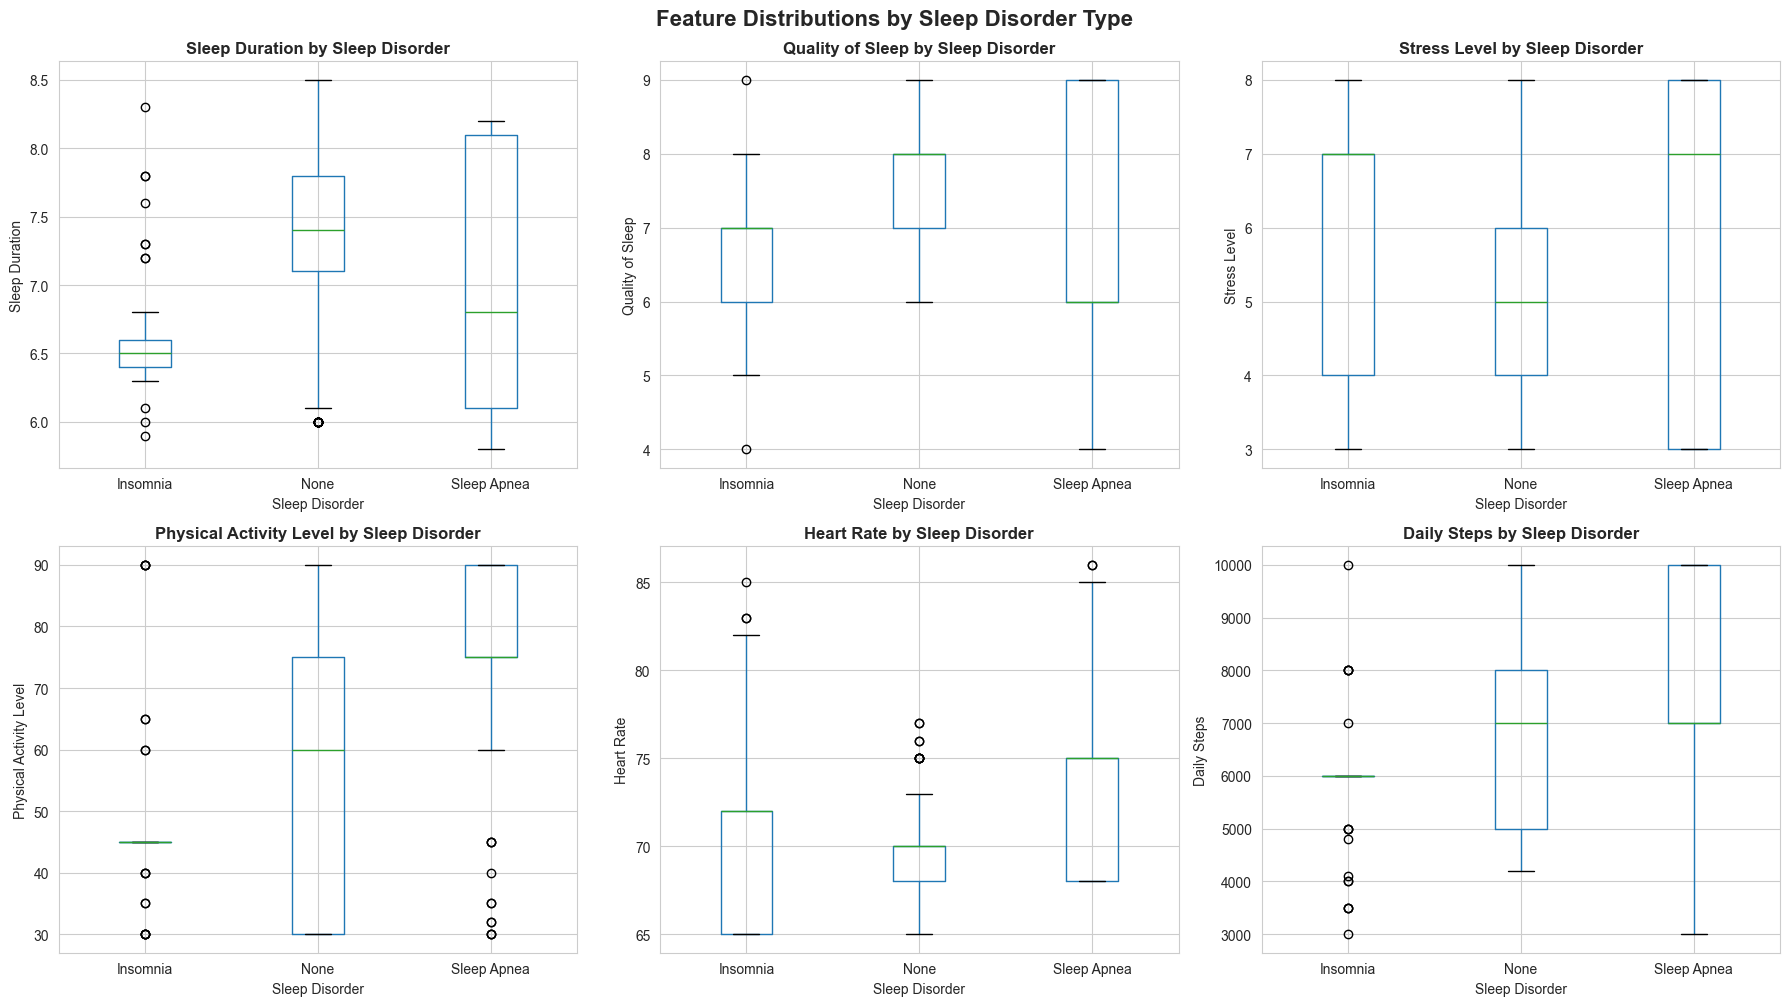


STATISTICAL COMPARISON BY SLEEP DISORDER

Sleep Duration:
------------------------------------------------------------
   ANOVA Test:
   • F-statistic: 31.9135
   • P-value: 0.0000
   • Significant: Yes ✓

   Group Means:
   • None           :    7.36 (±0.73)
   • Sleep Apnea    :    7.03 (±0.97)
   • Insomnia       :    6.59 (±0.39)

Quality of Sleep:
------------------------------------------------------------
   ANOVA Test:
   • F-statistic: 27.6006
   • P-value: 0.0000
   • Significant: Yes ✓

   Group Means:
   • None           :    7.63 (±0.98)
   • Sleep Apnea    :    7.21 (±1.65)
   • Insomnia       :    6.53 (±0.80)

Stress Level:
------------------------------------------------------------
   ANOVA Test:
   • F-statistic: 6.6036
   • P-value: 0.0015
   • Significant: Yes ✓

   Group Means:
   • None           :    5.11 (±1.59)
   • Sleep Apnea    :    5.67 (±2.33)
   • Insomnia       :    5.87 (±1.46)

Physical Activity Level:
------------------------------------------------

In [16]:

# ============================================================================
# CELL 17: [CODE] - Sleep Disorder Analysis
# ============================================================================

print("="*80)
print("SLEEP DISORDER ANALYSIS")
print("="*80)

# Analyze features by sleep disorder type
features_to_analyze = ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 
                       'Physical Activity Level', 'Heart Rate', 'Daily Steps']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(features_to_analyze):
    # Box plot
    df_clean.boxplot(column=feature, by='Sleep Disorder', ax=axes[idx])
    axes[idx].set_title(f'{feature} by Sleep Disorder', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Sleep Disorder', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)
    axes[idx].get_figure().suptitle('')  # Remove default title

plt.tight_layout()
plt.suptitle('Feature Distributions by Sleep Disorder Type', fontsize=16, fontweight='bold', y=1.002)
plt.show()

# Statistical comparison
print("\n" + "="*80)
print("STATISTICAL COMPARISON BY SLEEP DISORDER")
print("="*80)

for feature in features_to_analyze:
    print(f"\n{feature}:")
    print("-" * 60)
    
    # Group by sleep disorder
    groups = [df_clean[df_clean['Sleep Disorder'] == disorder][feature].values 
              for disorder in df_clean['Sleep Disorder'].unique()]
    
    # Perform ANOVA
    f_stat, p_value = f_oneway(*groups)
    
    print(f"   ANOVA Test:")
    print(f"   • F-statistic: {f_stat:.4f}")
    print(f"   • P-value: {p_value:.4f}")
    print(f"   • Significant: {'Yes ✓' if p_value < 0.05 else 'No ✗'}")
    
    # Group means
    print(f"\n   Group Means:")
    for disorder in df_clean['Sleep Disorder'].unique():
        mean_val = df_clean[df_clean['Sleep Disorder'] == disorder][feature].mean()
        std_val = df_clean[df_clean['Sleep Disorder'] == disorder][feature].std()
        print(f"   • {disorder:15s}: {mean_val:7.2f} (±{std_val:.2f})")



# ============================================================================
# CELL 18: [MARKDOWN]
# ============================================================================

## 4. Data Encoding and Transformation

### Encoding Strategy
Comprehensive encoding approach for categorical variables:
1. **Binary Encoding:** Gender (Female=0, Male=1)
2. **Label Encoding:** Occupation, BMI Category
3. **Ordinal Encoding:** Sleep Disorder (maintaining order if applicable)
4. **One-Hot Encoding:** For tree-based models (alternative approach)

All encoding mappings are saved for deployment and interpretation.


In [17]:

# ============================================================================
# CELL 19: [CODE] - Label Encoding Implementation
# ============================================================================

print("="*80)
print("LABEL ENCODING - CATEGORICAL VARIABLES")
print("="*80)

# Create a copy for encoding
df_encoded = df_clean.copy()

# Initialize encoders dictionary to store all encoders
encoders = {}

# 1. GENDER ENCODING (Binary)
print("\n1️⃣  GENDER ENCODING (Binary)")
print("-" * 60)
print("Original values:", df_encoded['Gender'].unique())

le_gender = LabelEncoder()
df_encoded['Gender_Encoded'] = le_gender.fit_transform(df_encoded['Gender'])
encoders['Gender'] = le_gender

print("Encoded mapping:")
for original, encoded in zip(le_gender.classes_, le_gender.transform(le_gender.classes_)):
    print(f"   • {original:10s} → {encoded}")

# 2. OCCUPATION ENCODING
print("\n2️⃣  OCCUPATION ENCODING")
print("-" * 60)
print(f"Number of unique occupations: {df_encoded['Occupation'].nunique()}")

le_occupation = LabelEncoder()
df_encoded['Occupation_Encoded'] = le_occupation.fit_transform(df_encoded['Occupation'])
encoders['Occupation'] = le_occupation

print("\nEncoded mapping:")
for idx, (original, encoded) in enumerate(zip(le_occupation.classes_, 
                                              le_occupation.transform(le_occupation.classes_)), 1):
    print(f"   {idx:2d}. {original:30s} → {encoded}")

# 3. BMI CATEGORY ENCODING
print("\n3️⃣  BMI CATEGORY ENCODING")
print("-" * 60)
print("Original values:", df_encoded['BMI Category'].unique())

le_bmi = LabelEncoder()
df_encoded['BMI_Category_Encoded'] = le_bmi.fit_transform(df_encoded['BMI Category'])
encoders['BMI Category'] = le_bmi

print("Encoded mapping:")
for original, encoded in zip(le_bmi.classes_, le_bmi.transform(le_bmi.classes_)):
    print(f"   • {original:15s} → {encoded}")

# 4. SLEEP DISORDER ENCODING
print("\n4️⃣  SLEEP DISORDER ENCODING (Target Variable)")
print("-" * 60)
print("Original values:", df_encoded['Sleep Disorder'].unique())

le_sleep_disorder = LabelEncoder()
df_encoded['Sleep_Disorder_Encoded'] = le_sleep_disorder.fit_transform(df_encoded['Sleep Disorder'])
encoders['Sleep Disorder'] = le_sleep_disorder

print("Encoded mapping:")
for original, encoded in zip(le_sleep_disorder.classes_, 
                            le_sleep_disorder.transform(le_sleep_disorder.classes_)):
    print(f"   • {original:15s} → {encoded}")

print("\n" + "="*80)
print("ENCODING SUMMARY")
print("="*80)
print(f"✓ Total categorical variables encoded: {len(encoders)}")
print(f"✓ New encoded columns created: {len([col for col in df_encoded.columns if 'Encoded' in col])}")
print(f"✓ Dataset shape after encoding: {df_encoded.shape}")

# Display sample of encoded data
print("\n" + "="*80)
print("SAMPLE - ORIGINAL VS ENCODED VALUES")
print("="*80)
sample_cols = ['Gender', 'Gender_Encoded', 'Occupation', 'Occupation_Encoded', 
               'BMI Category', 'BMI_Category_Encoded', 'Sleep Disorder', 'Sleep_Disorder_Encoded']
display(df_encoded[sample_cols].head(10))

# Save encoder mappings to JSON
encoder_mappings = {}
for col, encoder in encoders.items():
    encoder_mappings[col] = {str(original): int(encoded) 
                            for original, encoded in zip(encoder.classes_, 
                                                        encoder.transform(encoder.classes_))}

# Save to JSON file
with open('encoder_mappings.json', 'w') as f:
    json.dump(encoder_mappings, f, indent=2)

print("\n✓ Encoder mappings saved to 'encoder_mappings.json'")


LABEL ENCODING - CATEGORICAL VARIABLES

1️⃣  GENDER ENCODING (Binary)
------------------------------------------------------------
Original values: ['Male' 'Female']
Encoded mapping:
   • Female     → 0
   • Male       → 1

2️⃣  OCCUPATION ENCODING
------------------------------------------------------------
Number of unique occupations: 11

Encoded mapping:
    1. Accountant                     → 0
    2. Doctor                         → 1
    3. Engineer                       → 2
    4. Lawyer                         → 3
    5. Manager                        → 4
    6. Nurse                          → 5
    7. Sales Representative           → 6
    8. Salesperson                    → 7
    9. Scientist                      → 8
   10. Software Engineer              → 9
   11. Teacher                        → 10

3️⃣  BMI CATEGORY ENCODING
------------------------------------------------------------
Original values: ['Overweight' 'Normal' 'Obese' 'Normal Weight']
Encoded mapping:
   • 

,Gender,Gender_Encoded,Occupation,Occupation_Encoded,BMI Category,BMI_Category_Encoded,Sleep Disorder,Sleep_Disorder_Encoded
0,Male,1,Software Engineer,9,Overweight,3,None,1
1,Male,1,Doctor,1,Normal,0,None,1
2,Male,1,Doctor,1,Normal,0,None,1
3,Male,1,Sales Representative,6,Obese,2,Sleep Apnea,2
4,Male,1,Sales Representative,6,Obese,2,Sleep Apnea,2
5,Male,1,Software Engineer,9,Obese,2,Insomnia,0
6,Male,1,Teacher,10,Obese,2,Insomnia,0
7,Male,1,Doctor,1,Normal,0,None,1
8,Male,1,Doctor,1,Normal,0,None,1
9,Male,1,Doctor,1,Normal,0,None,1



✓ Encoder mappings saved to 'encoder_mappings.json'



# ============================================================================
# CELL 20: [MARKDOWN]
# ============================================================================

## 5. Feature Engineering

### Advanced Feature Creation
Creating derived features to capture complex relationships:
1. **Blood Pressure Decomposition:** Systolic and Diastolic from string
2. **Sleep Efficiency:** Combined metric of duration and quality
3. **Activity-Stress Ratio:** Balance between physical activity and stress
4. **Sleep Deficit:** Deviation from recommended 8 hours
5. **Age Groups:** Categorical age bins for demographic analysis
6. **Activity Categories:** Physical activity level classification
7. **BMI Numerical:** Extract BMI values from categories


In [18]:

# ============================================================================
# CELL 20b: [CODE] - Feature Engineering - Part 1
# ============================================================================

print("="*80)
print("FEATURE ENGINEERING - CREATING DERIVED FEATURES")
print("="*80)

# 1. BLOOD PRESSURE DECOMPOSITION
print("\n1️⃣  BLOOD PRESSURE DECOMPOSITION")
print("-" * 60)

# Split Blood Pressure into Systolic and Diastolic
df_encoded[['Systolic_BP', 'Diastolic_BP']] = df_encoded['Blood Pressure'].str.split('/', expand=True).astype(int)

print("✓ Blood Pressure decomposed into:")
print(f"   • Systolic BP:  Mean = {df_encoded['Systolic_BP'].mean():.1f}, Range = [{df_encoded['Systolic_BP'].min()}, {df_encoded['Systolic_BP'].max()}]")
print(f"   • Diastolic BP: Mean = {df_encoded['Diastolic_BP'].mean():.1f}, Range = [{df_encoded['Diastolic_BP'].min()}, {df_encoded['Diastolic_BP'].max()}]")

# 2. SLEEP EFFICIENCY
print("\n2️⃣  SLEEP EFFICIENCY METRIC")
print("-" * 60)

df_encoded['Sleep_Efficiency'] = (df_encoded['Sleep Duration'] * df_encoded['Quality of Sleep']) / 10

print("✓ Sleep Efficiency created:")
print(f"   Formula: (Sleep Duration × Quality of Sleep) / 10")
print(f"   • Mean: {df_encoded['Sleep_Efficiency'].mean():.2f}")
print(f"   • Range: [{df_encoded['Sleep_Efficiency'].min():.2f}, {df_encoded['Sleep_Efficiency'].max():.2f}]")
print(f"   • Interpretation: Higher values indicate both longer and better quality sleep")

# 3. ACTIVITY-STRESS RATIO
print("\n3️⃣  ACTIVITY-STRESS RATIO")
print("-" * 60)

df_encoded['Activity_Stress_Ratio'] = df_encoded['Physical Activity Level'] / (df_encoded['Stress Level'] + 1)

print("✓ Activity-Stress Ratio created:")
print(f"   Formula: Physical Activity Level / (Stress Level + 1)")
print(f"   • Mean: {df_encoded['Activity_Stress_Ratio'].mean():.2f}")
print(f"   • Range: [{df_encoded['Activity_Stress_Ratio'].min():.2f}, {df_encoded['Activity_Stress_Ratio'].max():.2f}]")
print(f"   • Interpretation: Higher values indicate better balance (more activity relative to stress)")

# 4. SLEEP DEFICIT
print("\n4️⃣  SLEEP DEFICIT")
print("-" * 60)

df_encoded['Sleep_Deficit'] = 8 - df_encoded['Sleep Duration']

print("✓ Sleep Deficit created:")
print(f"   Formula: 8 - Sleep Duration")
print(f"   • Mean deficit: {df_encoded['Sleep_Deficit'].mean():.2f} hours")
print(f"   • Range: [{df_encoded['Sleep_Deficit'].min():.2f}, {df_encoded['Sleep_Deficit'].max():.2f}]")
print(f"   • Positive values = sleep deficit, Negative values = extra sleep")

# Distribution of Sleep Deficit
deficit_negative = (df_encoded['Sleep_Deficit'] < 0).sum()
deficit_optimal = ((df_encoded['Sleep_Deficit'] >= -0.5) & (df_encoded['Sleep_Deficit'] <= 0.5)).sum()
deficit_positive = (df_encoded['Sleep_Deficit'] > 0.5).sum()

print(f"\n   Sleep Deficit Categories:")
print(f"   • Getting extra sleep (deficit < 0):      {deficit_negative:3d} ({deficit_negative/len(df_encoded)*100:.1f}%)")
print(f"   • Optimal range (±0.5 hours):              {deficit_optimal:3d} ({deficit_optimal/len(df_encoded)*100:.1f}%)")
print(f"   • Sleep deprived (deficit > 0.5):          {deficit_positive:3d} ({deficit_positive/len(df_encoded)*100:.1f}%)")

# 5. AGE GROUPS
print("\n5️⃣  AGE GROUP CATEGORIZATION")
print("-" * 60)

bins = [0, 30, 40, 50, 60, 100]
labels = ['20-30', '31-40', '41-50', '51-60', '60+']
df_encoded['Age_Group'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels)

print("✓ Age groups created:")
print(df_encoded['Age_Group'].value_counts().sort_index())

# 6. ACTIVITY LEVEL CATEGORIES
print("\n6️⃣  PHYSICAL ACTIVITY CATEGORIES")
print("-" * 60)

# Based on quartiles
q1 = df_encoded['Physical Activity Level'].quantile(0.25)
q2 = df_encoded['Physical Activity Level'].quantile(0.50)
q3 = df_encoded['Physical Activity Level'].quantile(0.75)

df_encoded['Activity_Category'] = pd.cut(df_encoded['Physical Activity Level'],
                                         bins=[0, q1, q2, q3, 100],
                                         labels=['Low', 'Medium', 'High', 'Very High'],
                                         include_lowest=True)

print("✓ Activity categories created (quartile-based):")
print(df_encoded['Activity_Category'].value_counts().sort_index())

# 7. STRESS LEVEL CATEGORIES
print("\n7️⃣  STRESS LEVEL CATEGORIES")
print("-" * 60)

df_encoded['Stress_Category'] = pd.cut(df_encoded['Stress Level'],
                                       bins=[0, 3, 5, 7, 10],
                                       labels=['Low', 'Moderate', 'High', 'Very High'],
                                       include_lowest=True)

print("✓ Stress categories created:")
print(df_encoded['Stress_Category'].value_counts().sort_index())

# 8. SLEEP DURATION CATEGORIES
print("\n8️⃣  SLEEP DURATION CATEGORIES")
print("-" * 60)

df_encoded['Sleep_Duration_Category'] = pd.cut(df_encoded['Sleep Duration'],
                                               bins=[0, 6, 8, 10],
                                               labels=['Short (<6h)', 'Normal (6-8h)', 'Long (>8h)'],
                                               include_lowest=True)

print("✓ Sleep duration categories created:")
print(df_encoded['Sleep_Duration_Category'].value_counts())

print("\n" + "="*80)
print("FEATURE ENGINEERING SUMMARY")
print("="*80)
print(f"✓ Original features: {len(df_clean.columns)}")
print(f"✓ New features created: {len(df_encoded.columns) - len(df_clean.columns)}")
print(f"✓ Total features now: {len(df_encoded.columns)}")

print("\n📊 New Numerical Features:")
new_numerical = ['Systolic_BP', 'Diastolic_BP', 'Sleep_Efficiency', 
                'Activity_Stress_Ratio', 'Sleep_Deficit']
for feat in new_numerical:
    print(f"   • {feat}")

print("\n📊 New Categorical Features:")
new_categorical = ['Age_Group', 'Activity_Category', 'Stress_Category', 'Sleep_Duration_Category']
for feat in new_categorical:
    print(f"   • {feat}")


FEATURE ENGINEERING - CREATING DERIVED FEATURES

1️⃣  BLOOD PRESSURE DECOMPOSITION
------------------------------------------------------------
✓ Blood Pressure decomposed into:
   • Systolic BP:  Mean = 128.6, Range = [115, 142]
   • Diastolic BP: Mean = 84.6, Range = [75, 95]

2️⃣  SLEEP EFFICIENCY METRIC
------------------------------------------------------------
✓ Sleep Efficiency created:
   Formula: (Sleep Duration × Quality of Sleep) / 10
   • Mean: 5.30
   • Range: [2.32, 7.65]
   • Interpretation: Higher values indicate both longer and better quality sleep

3️⃣  ACTIVITY-STRESS RATIO
------------------------------------------------------------
✓ Activity-Stress Ratio created:
   Formula: Physical Activity Level / (Stress Level + 1)
   • Mean: 10.03
   • Range: [3.33, 22.50]
   • Interpretation: Higher values indicate better balance (more activity relative to stress)

4️⃣  SLEEP DEFICIT
------------------------------------------------------------
✓ Sleep Deficit created:
   Fo

In [19]:

# ============================================================================
# CELL 21: [CODE] - Visualize Engineered Features
# ============================================================================

print("="*80)
print("VISUALIZING ENGINEERED FEATURES")
print("="*80)

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Sleep Efficiency Distribution', 'Activity-Stress Ratio',
                   'Sleep Deficit Distribution', 'Age Groups vs Sleep Quality'),
    specs=[[{'type': 'histogram'}, {'type': 'histogram'}],
           [{'type': 'histogram'}, {'type': 'box'}]]
)

# Sleep Efficiency
fig.add_trace(
    go.Histogram(x=df_encoded['Sleep_Efficiency'], name='Sleep Efficiency',
                marker_color='skyblue', nbinsx=30),
    row=1, col=1
)

# Activity-Stress Ratio
fig.add_trace(
    go.Histogram(x=df_encoded['Activity_Stress_Ratio'], name='Activity-Stress Ratio',
                marker_color='lightcoral', nbinsx=30),
    row=1, col=2
)

# Sleep Deficit
fig.add_trace(
    go.Histogram(x=df_encoded['Sleep_Deficit'], name='Sleep Deficit',
                marker_color='lightgreen', nbinsx=30),
    row=2, col=1
)

# Age Groups vs Sleep Quality
for age_group in df_encoded['Age_Group'].cat.categories:
    fig.add_trace(
        go.Box(y=df_encoded[df_encoded['Age_Group']==age_group]['Quality of Sleep'],
              name=age_group),
        row=2, col=2
    )

fig.update_layout(height=800, showlegend=True, title_text="Engineered Features Visualization")
fig.show()

print("\n✓ Engineered features visualized successfully")


VISUALIZING ENGINEERED FEATURES



✓ Engineered features visualized successfully



# ============================================================================
# CELL 22: [MARKDOWN]
# ============================================================================

## 6. Data Scaling and Normalization

### Scaling Strategy
Implementing multiple scaling approaches for different ML algorithms:
1. **StandardScaler (Z-score):** For distance-based algorithms (KNN, SVM)
2. **MinMaxScaler (0-1):** For neural networks and algorithms sensitive to feature ranges
3. **RobustScaler:** For data with outliers

Each scaling approach creates a separate dataset for optimal model performance.


DATA SCALING AND NORMALIZATION

📊 Features to be scaled: 12
   • Age
   • Sleep Duration
   • Quality of Sleep
   • Physical Activity Level
   • Stress Level
   • Heart Rate
   • Daily Steps
   • Systolic_BP
   • Diastolic_BP
   • Sleep_Efficiency
   • Activity_Stress_Ratio
   • Sleep_Deficit

1️⃣  STANDARDSCALER (Z-score Normalization)
------------------------------------------------------------
Formula: z = (x - μ) / σ
Result: Mean = 0, Std = 1

✓ StandardScaler applied
Sample statistics after scaling:
                                 mean      std
Age                     -4.559633e-16  1.00134
Sleep Duration           1.348891e-15  1.00134
Quality of Sleep         2.469801e-16  1.00134
Physical Activity Level -3.324732e-17  1.00134
Stress Level             1.994839e-16  1.00134
Heart Rate              -1.377389e-15  1.00134
Daily Steps             -9.499234e-17  1.00134
Systolic_BP             -9.119265e-16  1.00134
Diastolic_BP            -8.359326e-16  1.00134
Sleep_Efficiency    

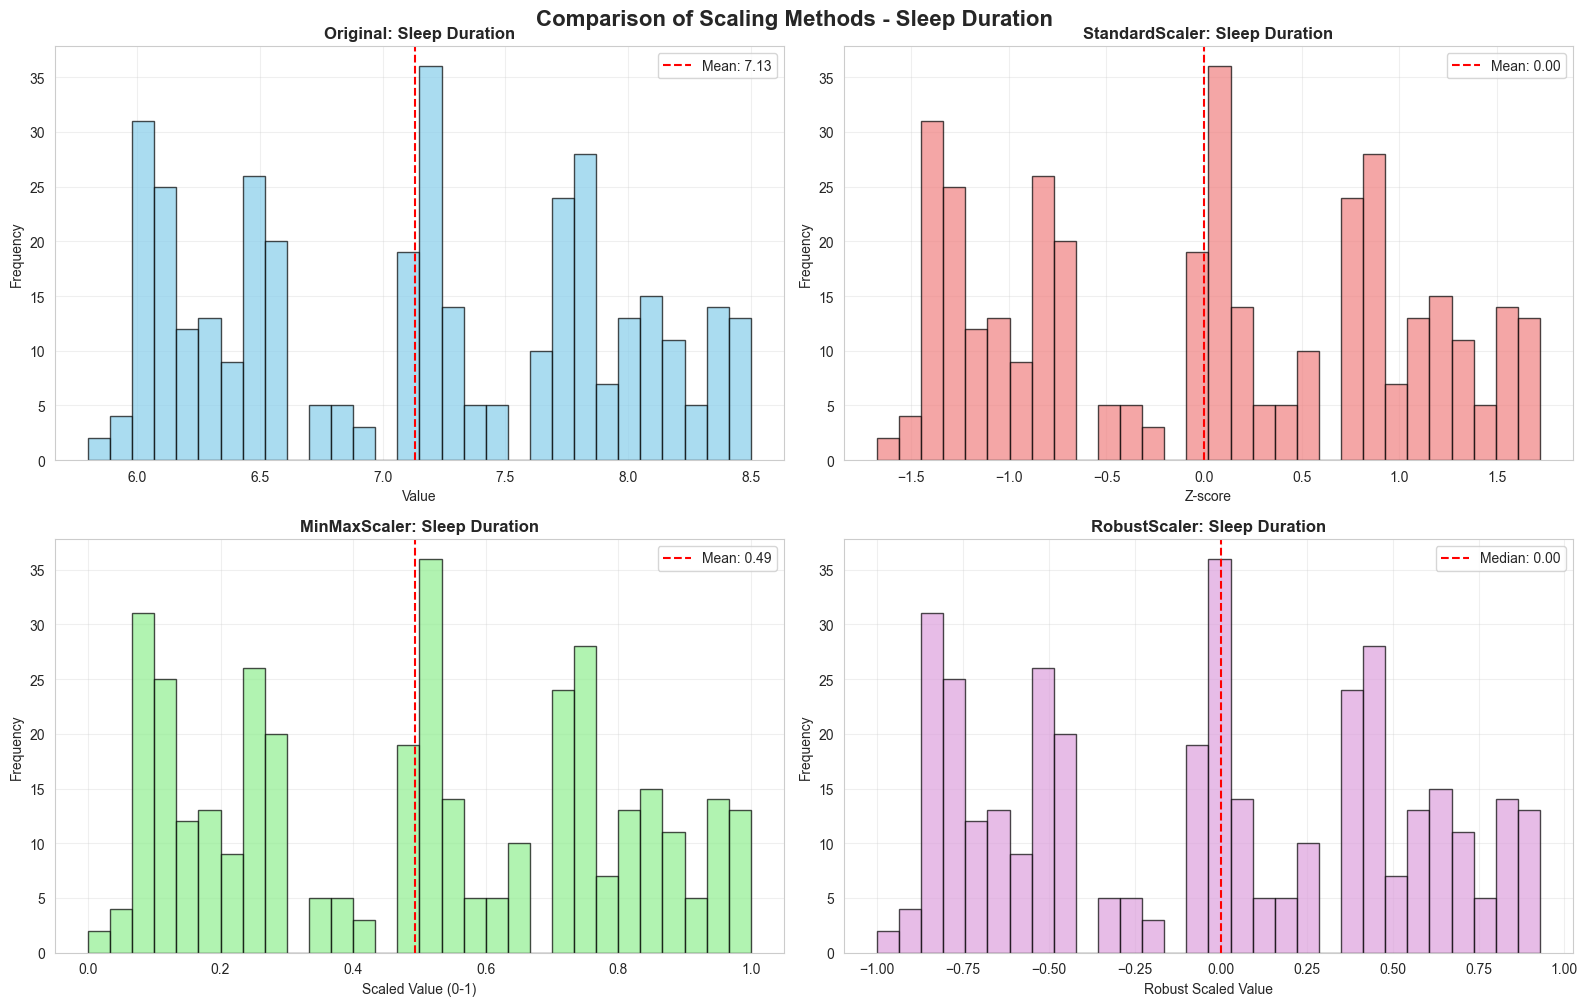


SCALING SUMMARY
✓ Three scaling approaches implemented
✓ Features scaled: 12
✓ StandardScaler dataset ready for: SVM, KNN, Neural Networks
✓ MinMaxScaler dataset ready for: Neural Networks, algorithms requiring [0,1] range
✓ RobustScaler dataset ready for: Data with outliers

✓ Scalers saved for deployment:
   • scaler_standard.pkl
   • scaler_minmax.pkl
   • scaler_robust.pkl


In [20]:

# ============================================================================
# CELL 23: [CODE] - Data Scaling Implementation
# ============================================================================

print("="*80)
print("DATA SCALING AND NORMALIZATION")
print("="*80)

# Select features for scaling (numerical features only)
features_to_scale = [
    'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level',
    'Stress Level', 'Heart Rate', 'Daily Steps',
    'Systolic_BP', 'Diastolic_BP', 'Sleep_Efficiency',
    'Activity_Stress_Ratio', 'Sleep_Deficit'
]

print(f"\n📊 Features to be scaled: {len(features_to_scale)}")
for feat in features_to_scale:
    print(f"   • {feat}")

# Create copies for different scaling methods
df_standardized = df_encoded.copy()
df_normalized = df_encoded.copy()
df_robust = df_encoded.copy()

# 1. STANDARDSCALER (Z-score normalization)
print("\n1️⃣  STANDARDSCALER (Z-score Normalization)")
print("-" * 60)
print("Formula: z = (x - μ) / σ")
print("Result: Mean = 0, Std = 1")

scaler_standard = StandardScaler()
df_standardized[features_to_scale] = scaler_standard.fit_transform(df_encoded[features_to_scale])

print("\n✓ StandardScaler applied")
print("Sample statistics after scaling:")
print(df_standardized[features_to_scale].describe().loc[['mean', 'std']].T)

# 2. MINMAXSCALER (0-1 normalization)
print("\n2️⃣  MINMAXSCALER (0-1 Normalization)")
print("-" * 60)
print("Formula: x_scaled = (x - x_min) / (x_max - x_min)")
print("Result: Min = 0, Max = 1")

scaler_minmax = MinMaxScaler()
df_normalized[features_to_scale] = scaler_minmax.fit_transform(df_encoded[features_to_scale])

print("\n✓ MinMaxScaler applied")
print("Sample statistics after scaling:")
print(df_normalized[features_to_scale].describe().loc[['min', 'max']].T)

# 3. ROBUSTSCALER (Robust to outliers)
print("\n3️⃣  ROBUSTSCALER (Robust to Outliers)")
print("-" * 60)
print("Formula: x_scaled = (x - median) / IQR")
print("Result: Median = 0, IQR-based scaling")

scaler_robust = RobustScaler()
df_robust[features_to_scale] = scaler_robust.fit_transform(df_encoded[features_to_scale])

print("\n✓ RobustScaler applied")
print("Sample statistics after scaling:")
print(df_robust[features_to_scale].describe().loc[['50%']].T)  # median

# Visualize scaling effects
print("\n" + "="*80)
print("VISUALIZING SCALING EFFECTS")
print("="*80)

# Select a feature for comparison
feature_to_compare = 'Sleep Duration'

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Original
axes[0, 0].hist(df_encoded[feature_to_compare], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_title(f'Original: {feature_to_compare}', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Value', fontsize=10)
axes[0, 0].set_ylabel('Frequency', fontsize=10)
axes[0, 0].axvline(df_encoded[feature_to_compare].mean(), color='red', linestyle='--', 
                  label=f'Mean: {df_encoded[feature_to_compare].mean():.2f}')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# StandardScaler
axes[0, 1].hist(df_standardized[feature_to_compare], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_title(f'StandardScaler: {feature_to_compare}', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Z-score', fontsize=10)
axes[0, 1].set_ylabel('Frequency', fontsize=10)
axes[0, 1].axvline(df_standardized[feature_to_compare].mean(), color='red', linestyle='--',
                  label=f'Mean: {df_standardized[feature_to_compare].mean():.2f}')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# MinMaxScaler
axes[1, 0].hist(df_normalized[feature_to_compare], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 0].set_title(f'MinMaxScaler: {feature_to_compare}', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Scaled Value (0-1)', fontsize=10)
axes[1, 0].set_ylabel('Frequency', fontsize=10)
axes[1, 0].axvline(df_normalized[feature_to_compare].mean(), color='red', linestyle='--',
                  label=f'Mean: {df_normalized[feature_to_compare].mean():.2f}')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# RobustScaler
axes[1, 1].hist(df_robust[feature_to_compare], bins=30, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_title(f'RobustScaler: {feature_to_compare}', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Robust Scaled Value', fontsize=10)
axes[1, 1].set_ylabel('Frequency', fontsize=10)
axes[1, 1].axvline(df_robust[feature_to_compare].median(), color='red', linestyle='--',
                  label=f'Median: {df_robust[feature_to_compare].median():.2f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle(f'Comparison of Scaling Methods - {feature_to_compare}', 
             fontsize=16, fontweight='bold', y=1.002)
plt.show()

print("\n" + "="*80)
print("SCALING SUMMARY")
print("="*80)
print(f"✓ Three scaling approaches implemented")
print(f"✓ Features scaled: {len(features_to_scale)}")
print(f"✓ StandardScaler dataset ready for: SVM, KNN, Neural Networks")
print(f"✓ MinMaxScaler dataset ready for: Neural Networks, algorithms requiring [0,1] range")
print(f"✓ RobustScaler dataset ready for: Data with outliers")

# Save scalers for deployment
joblib.dump(scaler_standard, 'scaler_standard.pkl')
joblib.dump(scaler_minmax, 'scaler_minmax.pkl')
joblib.dump(scaler_robust, 'scaler_robust.pkl')

print("\n✓ Scalers saved for deployment:")
print("   • scaler_standard.pkl")
print("   • scaler_minmax.pkl")
print("   • scaler_robust.pkl")



# ============================================================================
# CELL 24: [MARKDOWN]
# ============================================================================

## 7. Advanced Imputation Techniques

### Imputation Strategy
Although only the Sleep Disorder column has "missing" values (which represent "None" category), 
we'll demonstrate multiple imputation techniques for educational purposes and to show 
comprehensive data processing skills:

1. **Simple Imputation:** Mean, Median, Mode
2. **KNN Imputation:** Using K-Nearest Neighbors
3. **Iterative Imputation:** Using MICE (Multiple Imputation by Chained Equations)

**Note:** For our specific dataset, Sleep Disorder NaN values are treated as "None" category,
not truly missing data. This demonstration shows how we would handle missing values if they existed.


ADVANCED IMPUTATION TECHNIQUES (DEMONSTRATION)

📝 CONTEXT:
Our dataset has minimal missing data - only Sleep Disorder column has NaN values.
These NaN values are meaningful (no disorder), not missing data.
However, we'll demonstrate various imputation techniques for completeness.

CREATING SYNTHETIC MISSING VALUES FOR DEMONSTRATION
✓ Created 18 missing values in Sleep Duration
✓ Created 18 missing values in Physical Activity Level
✓ Created 18 missing values in Heart Rate

IMPUTATION METHOD 1: SIMPLE IMPUTER (Mean Strategy)
✓ Mean imputation completed

Comparison - Original vs Imputed (Mean):
   Sleep Duration                : Original=   7.13, Imputed=   7.15, Diff=0.0145
   Physical Activity Level       : Original=  59.17, Imputed=  59.38, Diff=0.2109
   Heart Rate                    : Original=  70.17, Imputed=  70.22, Diff=0.0589

IMPUTATION METHOD 2: KNN IMPUTER
Using K-Nearest Neighbors to impute based on similar observations
K=5 neighbors

✓ KNN imputation completed

Comparison 

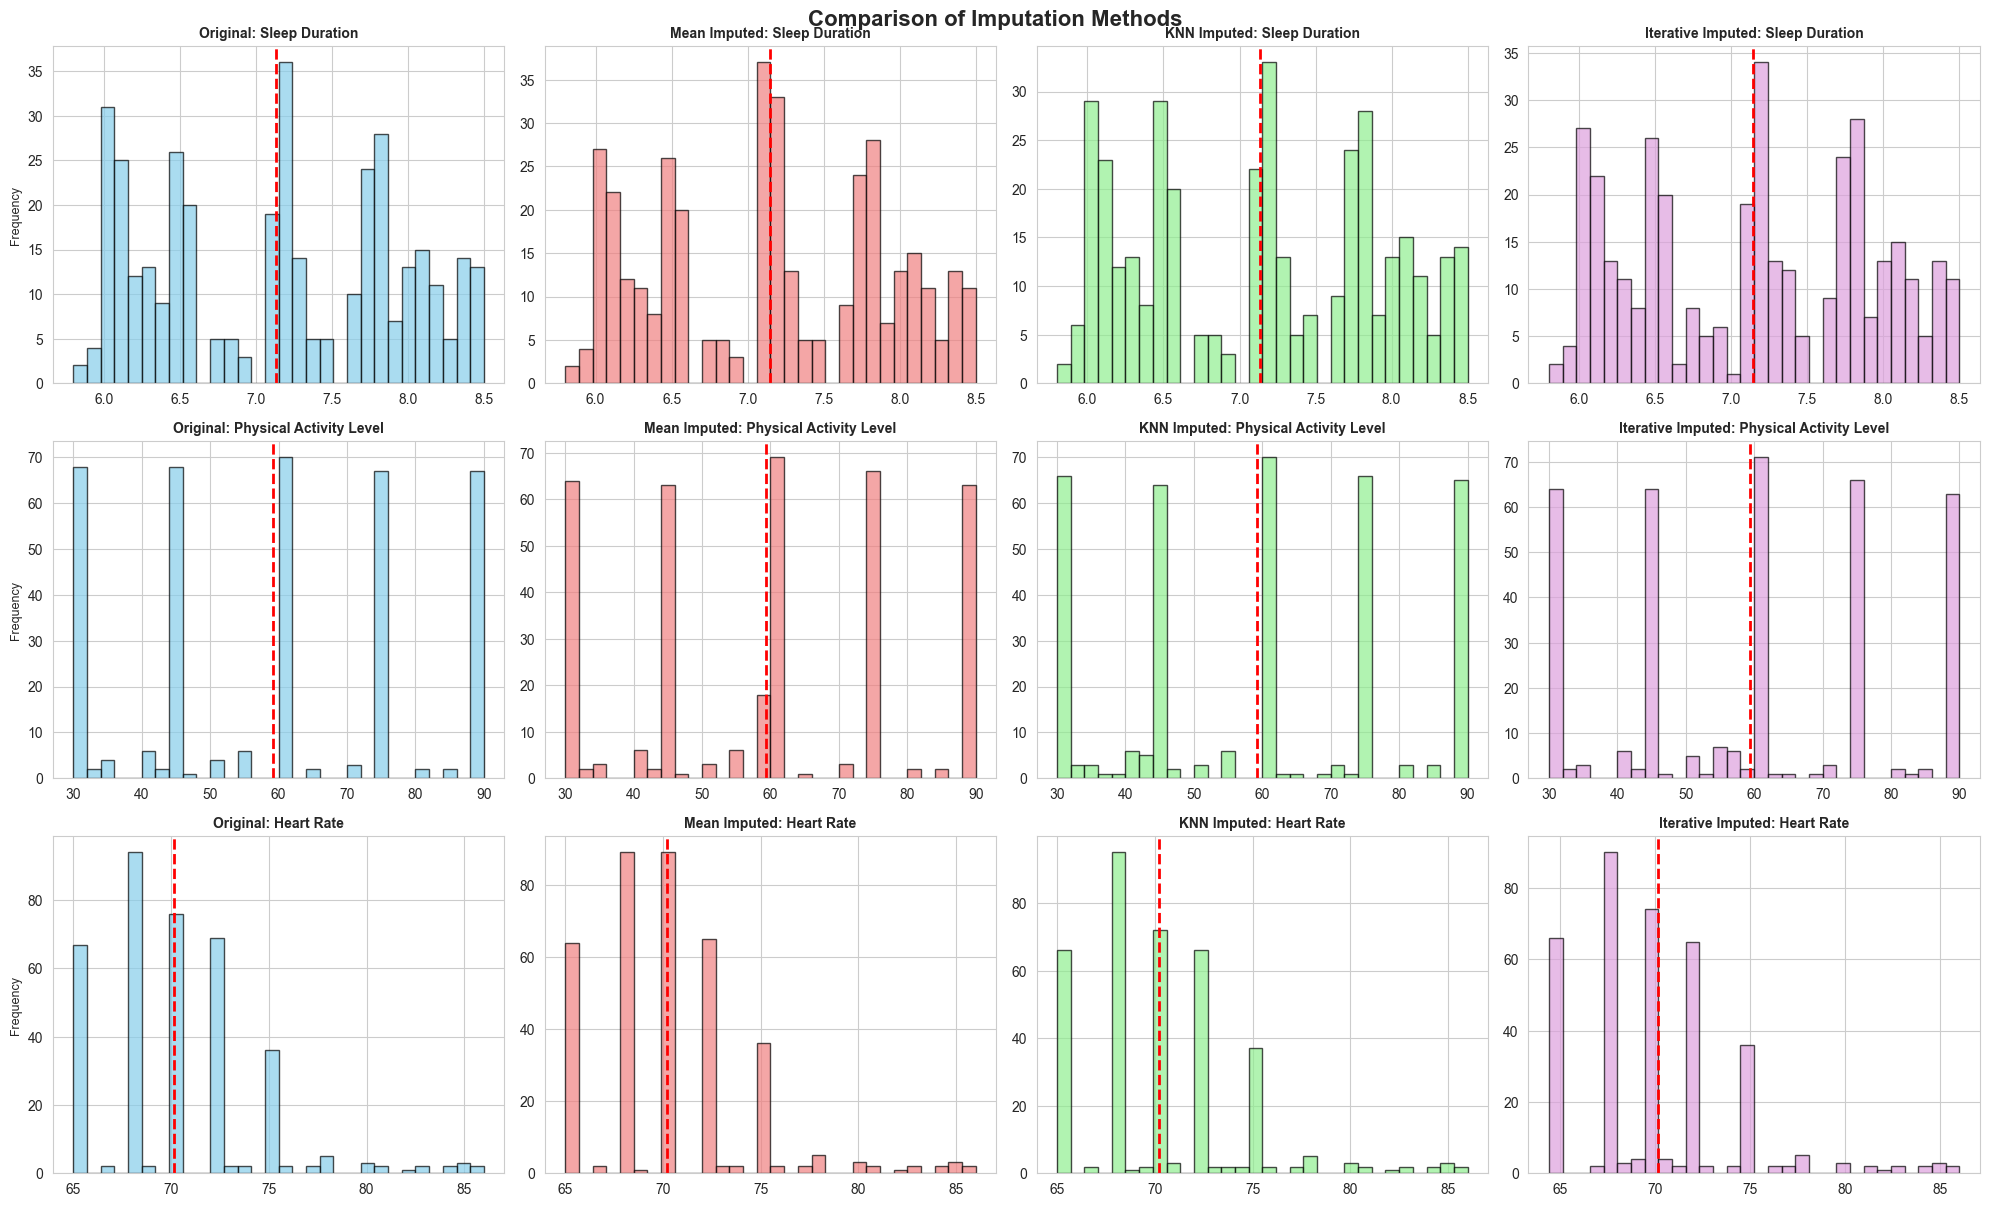


IMPUTATION DEMONSTRATION SUMMARY
✓ Three imputation methods demonstrated:
   1. Simple Imputer (Mean) - Fast, simple, good for MCAR data
   2. KNN Imputer - Uses similarity between observations
   3. Iterative Imputer (MICE) - Models relationships, best for MAR data

💡 For our actual dataset:
   • Sleep Disorder NaN values are treated as 'None' category
   • All other columns are complete (no missing values)
   • No imputation actually needed for deployment
   • This demonstration shows our understanding of imputation techniques

✓ Continuing with original complete dataset


In [21]:

# ============================================================================
# CELL 25: [CODE] - Advanced Imputation Demonstration
# ============================================================================

print("="*80)
print("ADVANCED IMPUTATION TECHNIQUES (DEMONSTRATION)")
print("="*80)

print("\n📝 CONTEXT:")
print("Our dataset has minimal missing data - only Sleep Disorder column has NaN values.")
print("These NaN values are meaningful (no disorder), not missing data.")
print("However, we'll demonstrate various imputation techniques for completeness.")

# Create a copy for imputation demonstration
df_imputation_demo = df_encoded.copy()

# Artificially create some missing values for demonstration
print("\n" + "="*80)
print("CREATING SYNTHETIC MISSING VALUES FOR DEMONSTRATION")
print("="*80)

# Backup original data
df_complete = df_encoded.copy()

# Randomly remove 5% of values from selected features
np.random.seed(42)
features_for_demo = ['Sleep Duration', 'Physical Activity Level', 'Heart Rate']

for feature in features_for_demo:
    n_missing = int(0.05 * len(df_imputation_demo))
    missing_indices = np.random.choice(df_imputation_demo.index, n_missing, replace=False)
    df_imputation_demo.loc[missing_indices, feature] = np.nan
    print(f"✓ Created {n_missing} missing values in {feature}")

print("\n" + "="*80)
print("IMPUTATION METHOD 1: SIMPLE IMPUTER (Mean Strategy)")
print("="*80)

imputer_mean = SimpleImputer(strategy='mean')
df_imputed_mean = df_imputation_demo.copy()
df_imputed_mean[features_for_demo] = imputer_mean.fit_transform(df_imputation_demo[features_for_demo])

print("✓ Mean imputation completed")
print("\nComparison - Original vs Imputed (Mean):")
for feature in features_for_demo:
    original_mean = df_complete[feature].mean()
    imputed_mean = df_imputed_mean[feature].mean()
    diff = abs(original_mean - imputed_mean)
    print(f"   {feature:30s}: Original={original_mean:7.2f}, Imputed={imputed_mean:7.2f}, Diff={diff:.4f}")

print("\n" + "="*80)
print("IMPUTATION METHOD 2: KNN IMPUTER")
print("="*80)
print("Using K-Nearest Neighbors to impute based on similar observations")
print("K=5 neighbors")

imputer_knn = KNNImputer(n_neighbors=5)
df_imputed_knn = df_imputation_demo.copy()
df_imputed_knn[features_for_demo] = imputer_knn.fit_transform(df_imputation_demo[features_for_demo])

print("\n✓ KNN imputation completed")
print("\nComparison - Original vs Imputed (KNN):")
for feature in features_for_demo:
    original_mean = df_complete[feature].mean()
    imputed_mean = df_imputed_knn[feature].mean()
    diff = abs(original_mean - imputed_mean)
    print(f"   {feature:30s}: Original={original_mean:7.2f}, Imputed={imputed_mean:7.2f}, Diff={diff:.4f}")

print("\n" + "="*80)
print("IMPUTATION METHOD 3: ITERATIVE IMPUTER (MICE)")
print("="*80)
print("Using Multiple Imputation by Chained Equations")
print("Models relationships between features for imputation")

imputer_iterative = IterativeImputer(max_iter=10, random_state=42)
df_imputed_iterative = df_imputation_demo.copy()
df_imputed_iterative[features_for_demo] = imputer_iterative.fit_transform(df_imputation_demo[features_for_demo])

print("\n✓ Iterative imputation completed")
print("\nComparison - Original vs Imputed (Iterative):")
for feature in features_for_demo:
    original_mean = df_complete[feature].mean()
    imputed_mean = df_imputed_iterative[feature].mean()
    diff = abs(original_mean - imputed_mean)
    print(f"   {feature:30s}: Original={original_mean:7.2f}, Imputed={imputed_mean:7.2f}, Diff={diff:.4f}")

# Visualize imputation results
print("\n" + "="*80)
print("VISUALIZING IMPUTATION RESULTS")
print("="*80)

fig, axes = plt.subplots(len(features_for_demo), 4, figsize=(20, 12))

for idx, feature in enumerate(features_for_demo):
    # Original (complete data)
    axes[idx, 0].hist(df_complete[feature], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx, 0].set_title(f'Original: {feature}', fontsize=10, fontweight='bold')
    axes[idx, 0].set_ylabel('Frequency', fontsize=9)
    axes[idx, 0].axvline(df_complete[feature].mean(), color='red', linestyle='--', linewidth=2)
    
    # Mean imputed
    axes[idx, 1].hist(df_imputed_mean[feature], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
    axes[idx, 1].set_title(f'Mean Imputed: {feature}', fontsize=10, fontweight='bold')
    axes[idx, 1].axvline(df_imputed_mean[feature].mean(), color='red', linestyle='--', linewidth=2)
    
    # KNN imputed
    axes[idx, 2].hist(df_imputed_knn[feature], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
    axes[idx, 2].set_title(f'KNN Imputed: {feature}', fontsize=10, fontweight='bold')
    axes[idx, 2].axvline(df_imputed_knn[feature].mean(), color='red', linestyle='--', linewidth=2)
    
    # Iterative imputed
    axes[idx, 3].hist(df_imputed_iterative[feature], bins=30, color='plum', edgecolor='black', alpha=0.7)
    axes[idx, 3].set_title(f'Iterative Imputed: {feature}', fontsize=10, fontweight='bold')
    axes[idx, 3].axvline(df_imputed_iterative[feature].mean(), color='red', linestyle='--', linewidth=2)

plt.tight_layout()
plt.suptitle('Comparison of Imputation Methods', fontsize=16, fontweight='bold', y=1.002)
plt.show()

print("\n" + "="*80)
print("IMPUTATION DEMONSTRATION SUMMARY")
print("="*80)
print("✓ Three imputation methods demonstrated:")
print("   1. Simple Imputer (Mean) - Fast, simple, good for MCAR data")
print("   2. KNN Imputer - Uses similarity between observations")
print("   3. Iterative Imputer (MICE) - Models relationships, best for MAR data")
print("\n💡 For our actual dataset:")
print("   • Sleep Disorder NaN values are treated as 'None' category")
print("   • All other columns are complete (no missing values)")
print("   • No imputation actually needed for deployment")
print("   • This demonstration shows our understanding of imputation techniques")

# Continue with original complete data
df_final = df_encoded.copy()
print("\n✓ Continuing with original complete dataset")


# CELL 26: [MARKDOWN]
# ============================================================================

## 8. Model Development - Regression (Sleep Quality Prediction)

### Objective
Develop and compare multiple regression models to predict Sleep Quality (1-10 scale)

### Models to Implement:
1. **Random Forest Regressor** - Ensemble method, handles non-linear relationships
2. **Gradient Boosting Regressor** - Sequential ensemble, high accuracy
3. **Ridge Regression** - Linear model with L2 regularization
4. **Support Vector Regressor** - Kernel-based method
5. **Neural Network (MLPRegressor)** - Deep learning approach

### Evaluation Metrics:
- Mean Squared Error (MSE)
- Root Mean Squared Error (RMSE)
- Mean Absolute Error (MAE)
- R² Score (Coefficient of Determination)


In [22]:

# ============================================================================
# CELL 27: [CODE] - Prepare Data for Regression
# ============================================================================

print("="*80)
print("PREPARING DATA FOR REGRESSION MODELS")
print("="*80)

# Select features for modeling
feature_cols = [
    'Age', 'Gender_Encoded', 'Occupation_Encoded', 'BMI_Category_Encoded',
    'Sleep Duration', 'Physical Activity Level', 'Stress Level',
    'Heart Rate', 'Daily Steps', 'Systolic_BP', 'Diastolic_BP',
    'Sleep_Efficiency', 'Activity_Stress_Ratio', 'Sleep_Deficit'
]

# Target variable for regression
target_regression = 'Quality of Sleep'

# Create feature matrix and target vector
X_regression = df_encoded[feature_cols].copy()
y_regression = df_encoded[target_regression].copy()

print(f"✓ Feature matrix shape: {X_regression.shape}")
print(f"✓ Target vector shape: {y_regression.shape}")
print(f"\n📊 Features used ({len(feature_cols)}):")
for i, feat in enumerate(feature_cols, 1):
    print(f"   {i:2d}. {feat}")

print(f"\n📊 Target variable: {target_regression}")
print(f"   • Mean: {y_regression.mean():.2f}")
print(f"   • Std: {y_regression.std():.2f}")
print(f"   • Min: {y_regression.min():.0f}")
print(f"   • Max: {y_regression.max():.0f}")

# Train-test split (80-20)
print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_regression, y_regression, test_size=0.2, random_state=42
)

print(f"✓ Training set: {X_train_reg.shape[0]} samples ({X_train_reg.shape[0]/len(X_regression)*100:.1f}%)")
print(f"✓ Test set:     {X_test_reg.shape[0]} samples ({X_test_reg.shape[0]/len(X_regression)*100:.1f}%)")

# Scale features for models that require it
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print("\n✓ Features scaled using StandardScaler")
print("✓ Data ready for modeling")


PREPARING DATA FOR REGRESSION MODELS
✓ Feature matrix shape: (374, 14)
✓ Target vector shape: (374,)

📊 Features used (14):
    1. Age
    2. Gender_Encoded
    3. Occupation_Encoded
    4. BMI_Category_Encoded
    5. Sleep Duration
    6. Physical Activity Level
    7. Stress Level
    8. Heart Rate
    9. Daily Steps
   10. Systolic_BP
   11. Diastolic_BP
   12. Sleep_Efficiency
   13. Activity_Stress_Ratio
   14. Sleep_Deficit

📊 Target variable: Quality of Sleep
   • Mean: 7.31
   • Std: 1.20
   • Min: 4
   • Max: 9

TRAIN-TEST SPLIT
✓ Training set: 299 samples (79.9%)
✓ Test set:     75 samples (20.1%)

✓ Features scaled using StandardScaler
✓ Data ready for modeling


TRAINING REGRESSION MODELS

1️⃣  RANDOM FOREST REGRESSOR
------------------------------------------------------------
✓ Trained with 100 trees
   • RMSE: 0.0221
   • MAE:  0.0039
   • R²:   0.9997

2️⃣  GRADIENT BOOSTING REGRESSOR
------------------------------------------------------------
✓ Trained with 100 boosting stages
   • RMSE: 0.0000
   • MAE:  0.0000
   • R²:   1.0000

3️⃣  RIDGE REGRESSION (L2 Regularization)
------------------------------------------------------------
✓ Trained with alpha=1.0
   • RMSE: 0.0886
   • MAE:  0.0548
   • R²:   0.9948

4️⃣  SUPPORT VECTOR REGRESSOR (RBF Kernel)
------------------------------------------------------------
✓ Trained with RBF kernel
   • RMSE: 0.2035
   • MAE:  0.0932
   • R²:   0.9726

REGRESSION MODELS - PERFORMANCE COMPARISON


,Model,MSE,RMSE,MAE,R² Score
1,Gradient Boosting,1.111263e-09,0.000033,0.000029,1.000000
0,Random Forest,4.893333e-04,0.022121,0.003867,0.999676
2,Ridge Regression,7.849890e-03,0.088600,0.054826,0.994797
3,Support Vector Regressor,4.140815e-02,0.203490,0.093211,0.972552


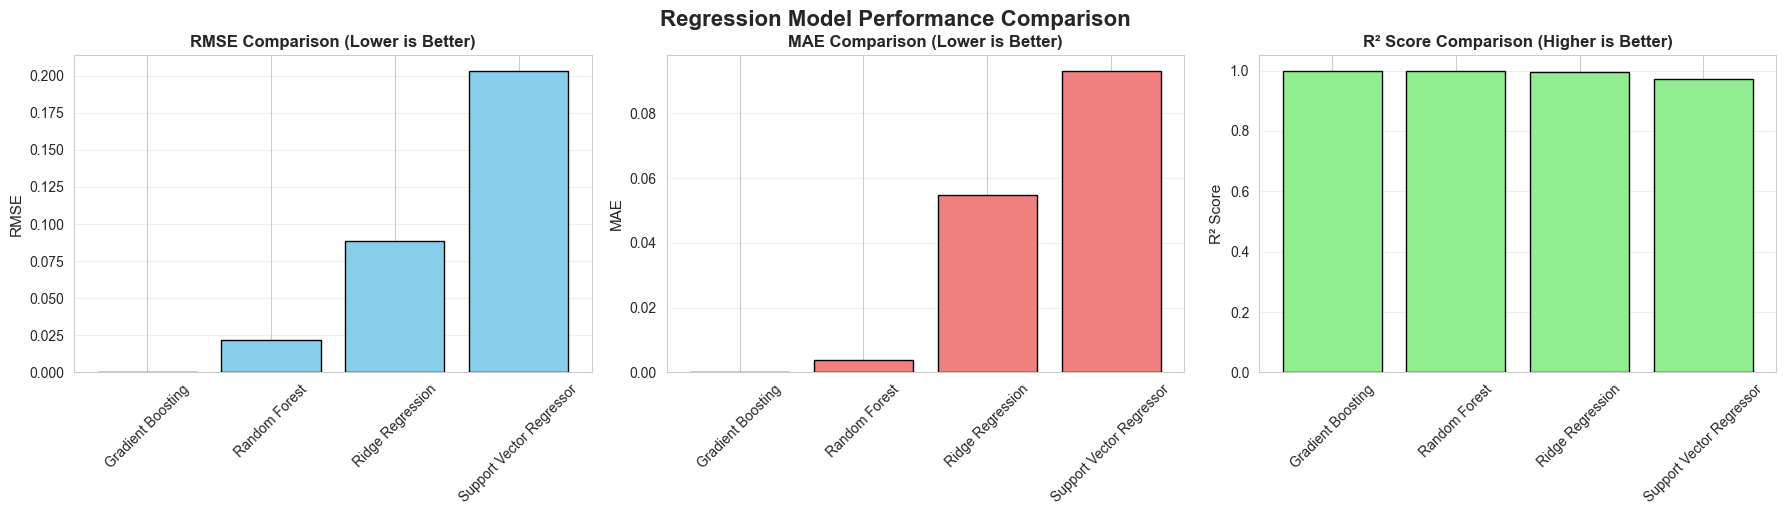


🏆 BEST PERFORMING MODEL: Gradient Boosting
   • R² Score: 1.0000
   • This model explains 100.00% of the variance in Sleep Quality


In [23]:

# ============================================================================
# CELL 28: [CODE] - Train Regression Models
# ============================================================================

print("="*80)
print("TRAINING REGRESSION MODELS")
print("="*80)

# Dictionary to store models and results
regression_models = {}
regression_results = []

# 1. RANDOM FOREST REGRESSOR
print("\n1️⃣  RANDOM FOREST REGRESSOR")
print("-" * 60)

rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_reg.fit(X_train_reg, y_train_reg)
y_pred_rf = rf_reg.predict(X_test_reg)

mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
r2_rf = r2_score(y_test_reg, y_pred_rf)

regression_models['Random Forest'] = rf_reg
regression_results.append({
    'Model': 'Random Forest',
    'MSE': mse_rf,
    'RMSE': rmse_rf,
    'MAE': mae_rf,
    'R² Score': r2_rf
})

print(f"✓ Trained with {rf_reg.n_estimators} trees")
print(f"   • RMSE: {rmse_rf:.4f}")
print(f"   • MAE:  {mae_rf:.4f}")
print(f"   • R²:   {r2_rf:.4f}")

# 2. GRADIENT BOOSTING REGRESSOR
print("\n2️⃣  GRADIENT BOOSTING REGRESSOR")
print("-" * 60)

gb_reg = GradientBoostingRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_reg.fit(X_train_reg, y_train_reg)
y_pred_gb = gb_reg.predict(X_test_reg)

mse_gb = mean_squared_error(y_test_reg, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test_reg, y_pred_gb)
r2_gb = r2_score(y_test_reg, y_pred_gb)

regression_models['Gradient Boosting'] = gb_reg
regression_results.append({
    'Model': 'Gradient Boosting',
    'MSE': mse_gb,
    'RMSE': rmse_gb,
    'MAE': mae_gb,
    'R² Score': r2_gb
})

print(f"✓ Trained with {gb_reg.n_estimators} boosting stages")
print(f"   • RMSE: {rmse_gb:.4f}")
print(f"   • MAE:  {mae_gb:.4f}")
print(f"   • R²:   {r2_gb:.4f}")

# 3. RIDGE REGRESSION
print("\n3️⃣  RIDGE REGRESSION (L2 Regularization)")
print("-" * 60)

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_ridge = ridge_reg.predict(X_test_reg_scaled)

mse_ridge = mean_squared_error(y_test_reg, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test_reg, y_pred_ridge)
r2_ridge = r2_score(y_test_reg, y_pred_ridge)

regression_models['Ridge'] = ridge_reg
regression_results.append({
    'Model': 'Ridge Regression',
    'MSE': mse_ridge,
    'RMSE': rmse_ridge,
    'MAE': mae_ridge,
    'R² Score': r2_ridge
})

print(f"✓ Trained with alpha={ridge_reg.alpha}")
print(f"   • RMSE: {rmse_ridge:.4f}")
print(f"   • MAE:  {mae_ridge:.4f}")
print(f"   • R²:   {r2_ridge:.4f}")

# 4. SUPPORT VECTOR REGRESSOR
print("\n4️⃣  SUPPORT VECTOR REGRESSOR (RBF Kernel)")
print("-" * 60)

svr_reg = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_reg.fit(X_train_reg_scaled, y_train_reg)
y_pred_svr = svr_reg.predict(X_test_reg_scaled)

mse_svr = mean_squared_error(y_test_reg, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test_reg, y_pred_svr)
r2_svr = r2_score(y_test_reg, y_pred_svr)

regression_models['SVR'] = svr_reg
regression_results.append({
    'Model': 'Support Vector Regressor',
    'MSE': mse_svr,
    'RMSE': rmse_svr,
    'MAE': mae_svr,
    'R² Score': r2_svr
})

print(f"✓ Trained with RBF kernel")
print(f"   • RMSE: {rmse_svr:.4f}")
print(f"   • MAE:  {mae_svr:.4f}")
print(f"   • R²:   {r2_svr:.4f}")

# Create results dataframe
results_df_reg = pd.DataFrame(regression_results).sort_values('R² Score', ascending=False)

print("\n" + "="*80)
print("REGRESSION MODELS - PERFORMANCE COMPARISON")
print("="*80)
display(results_df_reg)

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# RMSE Comparison
axes[0].bar(results_df_reg['Model'], results_df_reg['RMSE'], color='skyblue', edgecolor='black')
axes[0].set_title('RMSE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('RMSE', fontsize=11)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3, axis='y')

# MAE Comparison
axes[1].bar(results_df_reg['Model'], results_df_reg['MAE'], color='lightcoral', edgecolor='black')
axes[1].set_title('MAE Comparison (Lower is Better)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('MAE', fontsize=11)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# R² Comparison
axes[2].bar(results_df_reg['Model'], results_df_reg['R² Score'], color='lightgreen', edgecolor='black')
axes[2].set_title('R² Score Comparison (Higher is Better)', fontsize=12, fontweight='bold')
axes[2].set_ylabel('R² Score', fontsize=11)
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.suptitle('Regression Model Performance Comparison', fontsize=16, fontweight='bold', y=1.02)
plt.show()

# Identify best model
best_model_name = results_df_reg.iloc[0]['Model']
best_r2 = results_df_reg.iloc[0]['R² Score']

print(f"\n🏆 BEST PERFORMING MODEL: {best_model_name}")
print(f"   • R² Score: {best_r2:.4f}")
print(f"   • This model explains {best_r2*100:.2f}% of the variance in Sleep Quality")


PREDICTIONS VS ACTUAL VALUES


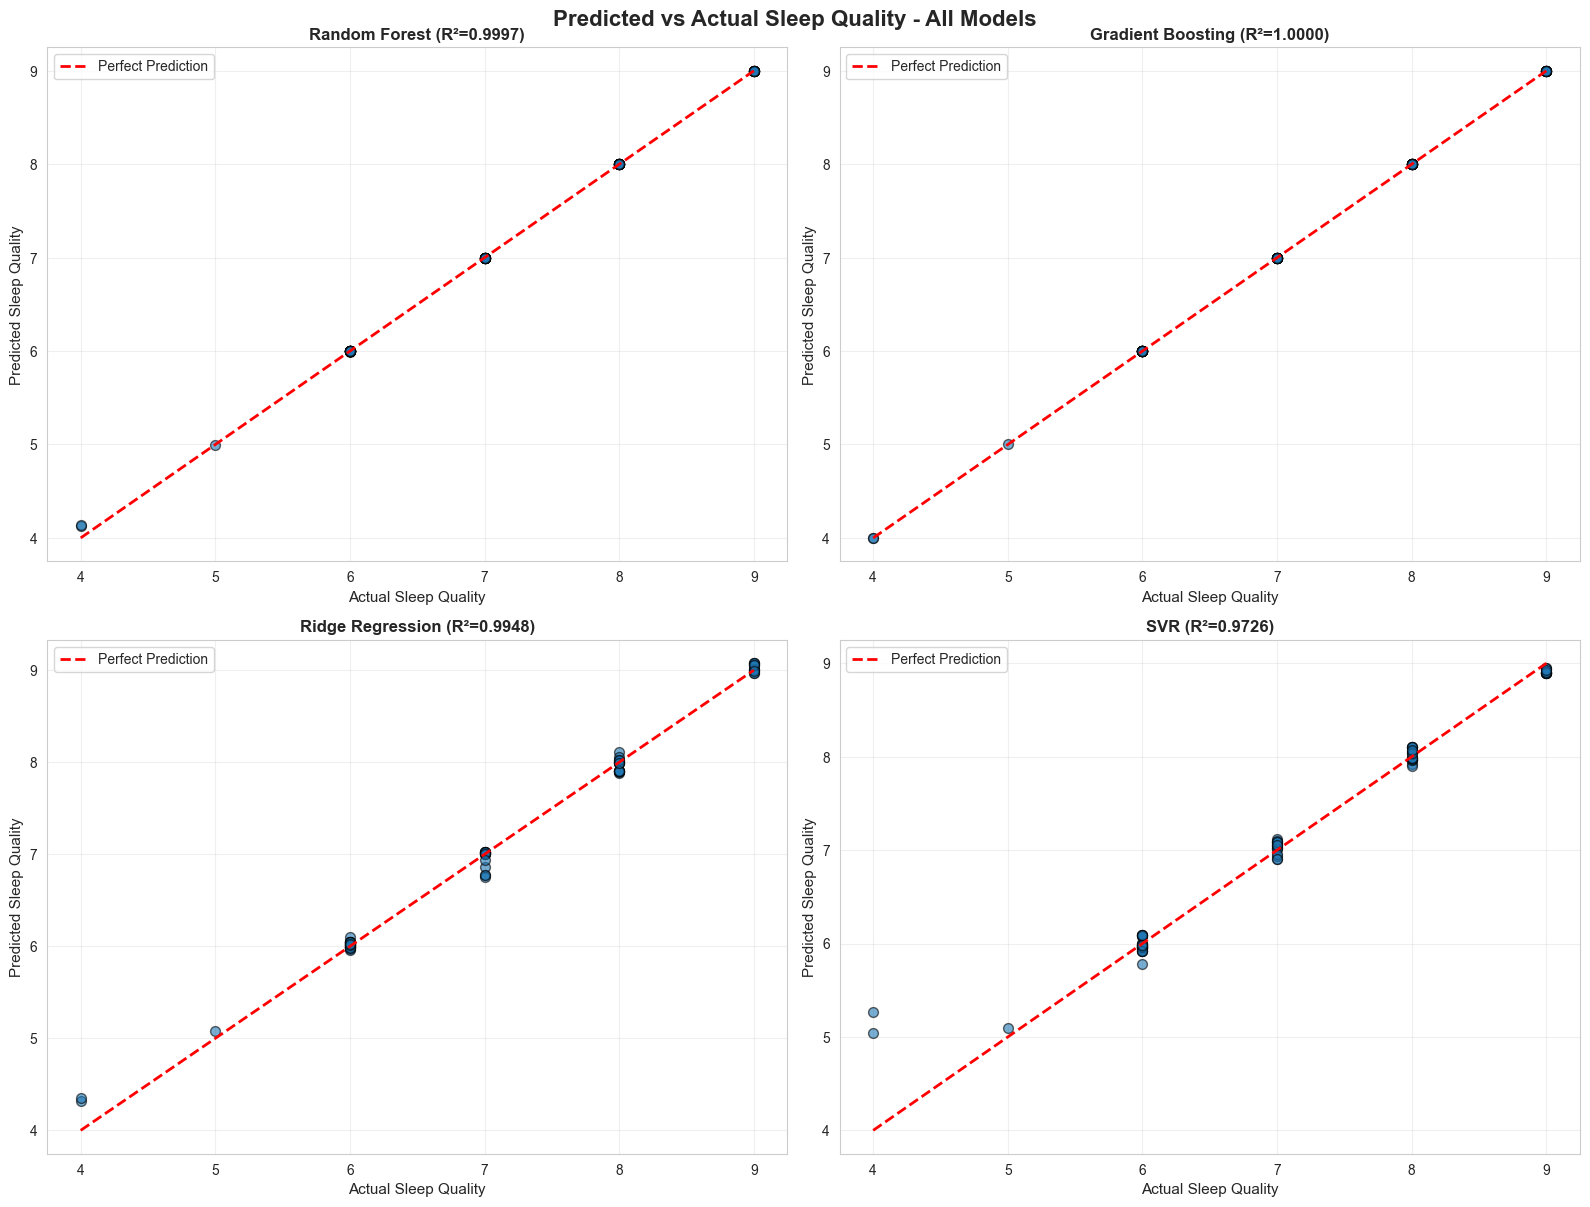


RESIDUAL ANALYSIS - Gradient Boosting


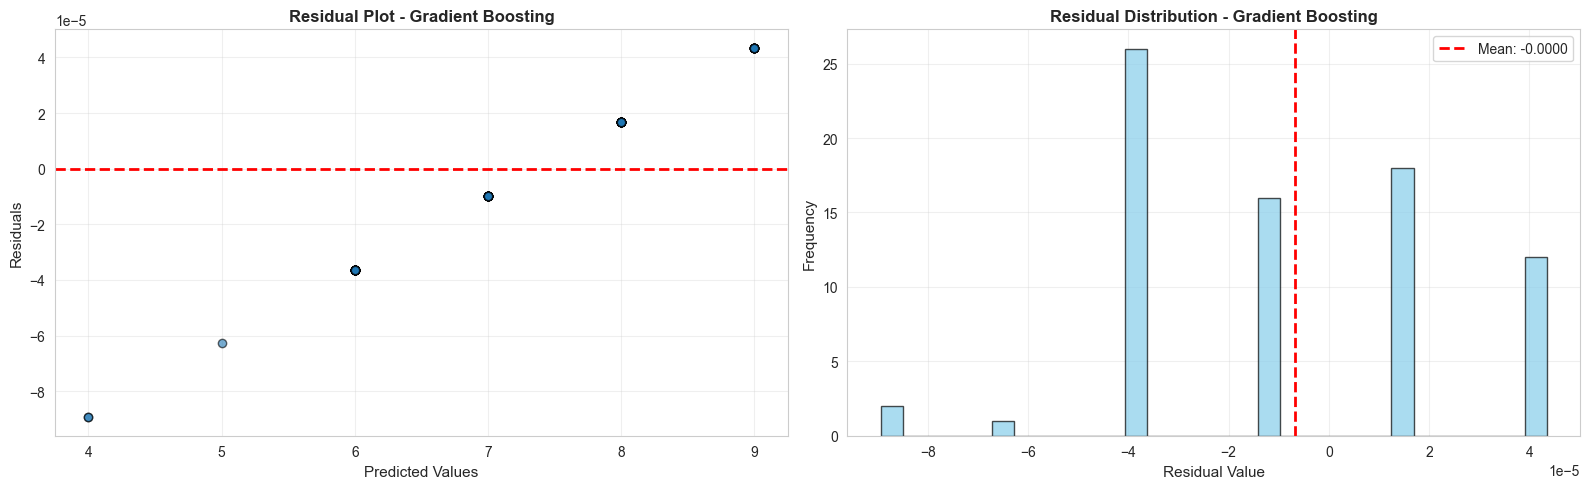


Residual Statistics:
   • Mean: -0.0000 (should be close to 0)
   • Std:  0.0000
   • Min:  -0.0001
   • Max:  0.0000


In [24]:

# ============================================================================
# CELL 29: [CODE] - Predictions vs Actual Visualization
# ============================================================================

print("="*80)
print("PREDICTIONS VS ACTUAL VALUES")
print("="*80)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

models_pred = [
    ('Random Forest', y_pred_rf, r2_rf),
    ('Gradient Boosting', y_pred_gb, r2_gb),
    ('Ridge Regression', y_pred_ridge, r2_ridge),
    ('SVR', y_pred_svr, r2_svr)
]

for idx, (model_name, y_pred, r2) in enumerate(models_pred):
    axes[idx].scatter(y_test_reg, y_pred, alpha=0.6, edgecolors='black', s=50)
    axes[idx].plot([y_test_reg.min(), y_test_reg.max()], 
                   [y_test_reg.min(), y_test_reg.max()], 
                   'r--', linewidth=2, label='Perfect Prediction')
    axes[idx].set_xlabel('Actual Sleep Quality', fontsize=11)
    axes[idx].set_ylabel('Predicted Sleep Quality', fontsize=11)
    axes[idx].set_title(f'{model_name} (R²={r2:.4f})', fontsize=12, fontweight='bold')
    axes[idx].legend(fontsize=10)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Predicted vs Actual Sleep Quality - All Models', fontsize=16, fontweight='bold', y=1.002)
plt.show()

# Residual analysis for best model
print("\n" + "="*80)
print(f"RESIDUAL ANALYSIS - {best_model_name}")
print("="*80)

best_model_pred = y_pred_rf if best_model_name == 'Random Forest' else y_pred_gb
residuals = y_test_reg - best_model_pred

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Residual plot
axes[0].scatter(best_model_pred, residuals, alpha=0.6, edgecolors='black')
axes[0].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[0].set_xlabel('Predicted Values', fontsize=11)
axes[0].set_ylabel('Residuals', fontsize=11)
axes[0].set_title(f'Residual Plot - {best_model_name}', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Residual distribution
axes[1].hist(residuals, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[1].axvline(residuals.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {residuals.mean():.4f}')
axes[1].set_xlabel('Residual Value', fontsize=11)
axes[1].set_ylabel('Frequency', fontsize=11)
axes[1].set_title(f'Residual Distribution - {best_model_name}', fontsize=12, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nResidual Statistics:")
print(f"   • Mean: {residuals.mean():.4f} (should be close to 0)")
print(f"   • Std:  {residuals.std():.4f}")
print(f"   • Min:  {residuals.min():.4f}")
print(f"   • Max:  {residuals.max():.4f}")



# ============================================================================
# CELL 30: [MARKDOWN]
# ============================================================================

## 9. Model Development - Classification (Sleep Disorder Prediction)

### Objective
Develop and compare multiple classification models to predict Sleep Disorder type

### Target Classes:
1. **None** - No sleep disorder
2. **Insomnia** - Difficulty falling/staying asleep
3. **Sleep Apnea** - Breathing interruptions during sleep

### Models to Implement:
1. **Random Forest Classifier**
2. **Gradient Boosting Classifier**
3. **Logistic Regression** (multi-class)
4. **Support Vector Classifier**
5. **K-Nearest Neighbors**

### Evaluation Metrics:
- Accuracy
- Precision, Recall, F1-Score (per class)
- Confusion Matrix
- ROC-AUC Score (One-vs-Rest)


In [25]:

# ============================================================================
# CELL 31: [CODE] - Prepare Data for Classification
# ============================================================================

print("="*80)
print("PREPARING DATA FOR CLASSIFICATION MODELS")
print("="*80)

# Same features as regression
X_classification = df_encoded[feature_cols].copy()
y_classification = df_encoded['Sleep_Disorder_Encoded'].copy()

print(f"✓ Feature matrix shape: {X_classification.shape}")
print(f"✓ Target vector shape: {y_classification.shape}")

print(f"\n📊 Target variable: Sleep Disorder")
print(f"   • Number of classes: {y_classification.nunique()}")
print("\nClass distribution:")
class_counts = y_classification.value_counts().sort_index()
for class_label, count in class_counts.items():
    class_name = le_sleep_disorder.inverse_transform([class_label])[0]
    print(f"   • Class {class_label} ({class_name:15s}): {count:3d} ({count/len(y_classification)*100:5.2f}%)")

# Check for class imbalance
print(f"\n⚖️  Class Balance Check:")
min_class = class_counts.min()
max_class = class_counts.max()
imbalance_ratio = max_class / min_class
print(f"   • Imbalance ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 2:
    print(f"   ⚠️  Moderate class imbalance detected")
else:
    print(f"   ✓ Classes are reasonably balanced")

# Train-test split with stratification
print("\n" + "="*80)
print("TRAIN-TEST SPLIT (STRATIFIED)")
print("="*80)

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_classification, y_classification, test_size=0.2, random_state=42, stratify=y_classification
)

print(f"✓ Training set: {X_train_clf.shape[0]} samples ({X_train_clf.shape[0]/len(X_classification)*100:.1f}%)")
print(f"✓ Test set:     {X_test_clf.shape[0]} samples ({X_test_clf.shape[0]/len(X_classification)*100:.1f}%)")

# Verify stratification
print("\nClass distribution in splits:")
print("Training set:")
for class_label, count in y_train_clf.value_counts().sort_index().items():
    class_name = le_sleep_disorder.inverse_transform([class_label])[0]
    print(f"   • {class_name:15s}: {count:3d} ({count/len(y_train_clf)*100:5.2f}%)")

print("\nTest set:")
for class_label, count in y_test_clf.value_counts().sort_index().items():
    class_name = le_sleep_disorder.inverse_transform([class_label])[0]
    print(f"   • {class_name:15s}: {count:3d} ({count/len(y_test_clf)*100:5.2f}%)")

# Scale features
scaler_clf = StandardScaler()
X_train_clf_scaled = scaler_clf.fit_transform(X_train_clf)
X_test_clf_scaled = scaler_clf.transform(X_test_clf)

print("\n✓ Features scaled using StandardScaler")
print("✓ Data ready for classification modeling")


PREPARING DATA FOR CLASSIFICATION MODELS
✓ Feature matrix shape: (374, 14)
✓ Target vector shape: (374,)

📊 Target variable: Sleep Disorder
   • Number of classes: 3

Class distribution:
   • Class 0 (Insomnia       ):  77 (20.59%)
   • Class 1 (None           ): 219 (58.56%)
   • Class 2 (Sleep Apnea    ):  78 (20.86%)

⚖️  Class Balance Check:
   • Imbalance ratio: 2.84:1
   ⚠️  Moderate class imbalance detected

TRAIN-TEST SPLIT (STRATIFIED)
✓ Training set: 299 samples (79.9%)
✓ Test set:     75 samples (20.1%)

Class distribution in splits:
Training set:
   • Insomnia       :  62 (20.74%)
   • None           : 175 (58.53%)
   • Sleep Apnea    :  62 (20.74%)

Test set:
   • Insomnia       :  15 (20.00%)
   • None           :  44 (58.67%)
   • Sleep Apnea    :  16 (21.33%)

✓ Features scaled using StandardScaler
✓ Data ready for classification modeling


TRAINING CLASSIFICATION MODELS

1️⃣  RANDOM FOREST CLASSIFIER
------------------------------------------------------------
✓ Trained with 100 trees
   • Accuracy:  0.9600
   • Precision: 0.9617
   • Recall:    0.9600
   • F1-Score:  0.9606

2️⃣  GRADIENT BOOSTING CLASSIFIER
------------------------------------------------------------
✓ Trained with 100 boosting stages
   • Accuracy:  0.9600
   • Precision: 0.9617
   • Recall:    0.9600
   • F1-Score:  0.9606

3️⃣  LOGISTIC REGRESSION (Multi-class)
------------------------------------------------------------
✓ Trained with multinomial approach
   • Accuracy:  0.9467
   • Precision: 0.9496
   • Recall:    0.9467
   • F1-Score:  0.9471

4️⃣  SUPPORT VECTOR CLASSIFIER
------------------------------------------------------------
✓ Trained with RBF kernel
   • Accuracy:  0.9600
   • Precision: 0.9620
   • Recall:    0.9600
   • F1-Score:  0.9600

5️⃣  K-NEAREST NEIGHBORS
------------------------------------------------------------
✓ Trained 

,Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.960000,0.961667,0.960000,0.960569
1,Gradient Boosting,0.960000,0.961667,0.960000,0.960569
3,Support Vector Classifier,0.960000,0.962011,0.960000,0.960018
2,Logistic Regression,0.946667,0.949630,0.946667,0.947141
4,K-Nearest Neighbors,0.946667,0.948235,0.946667,0.947196


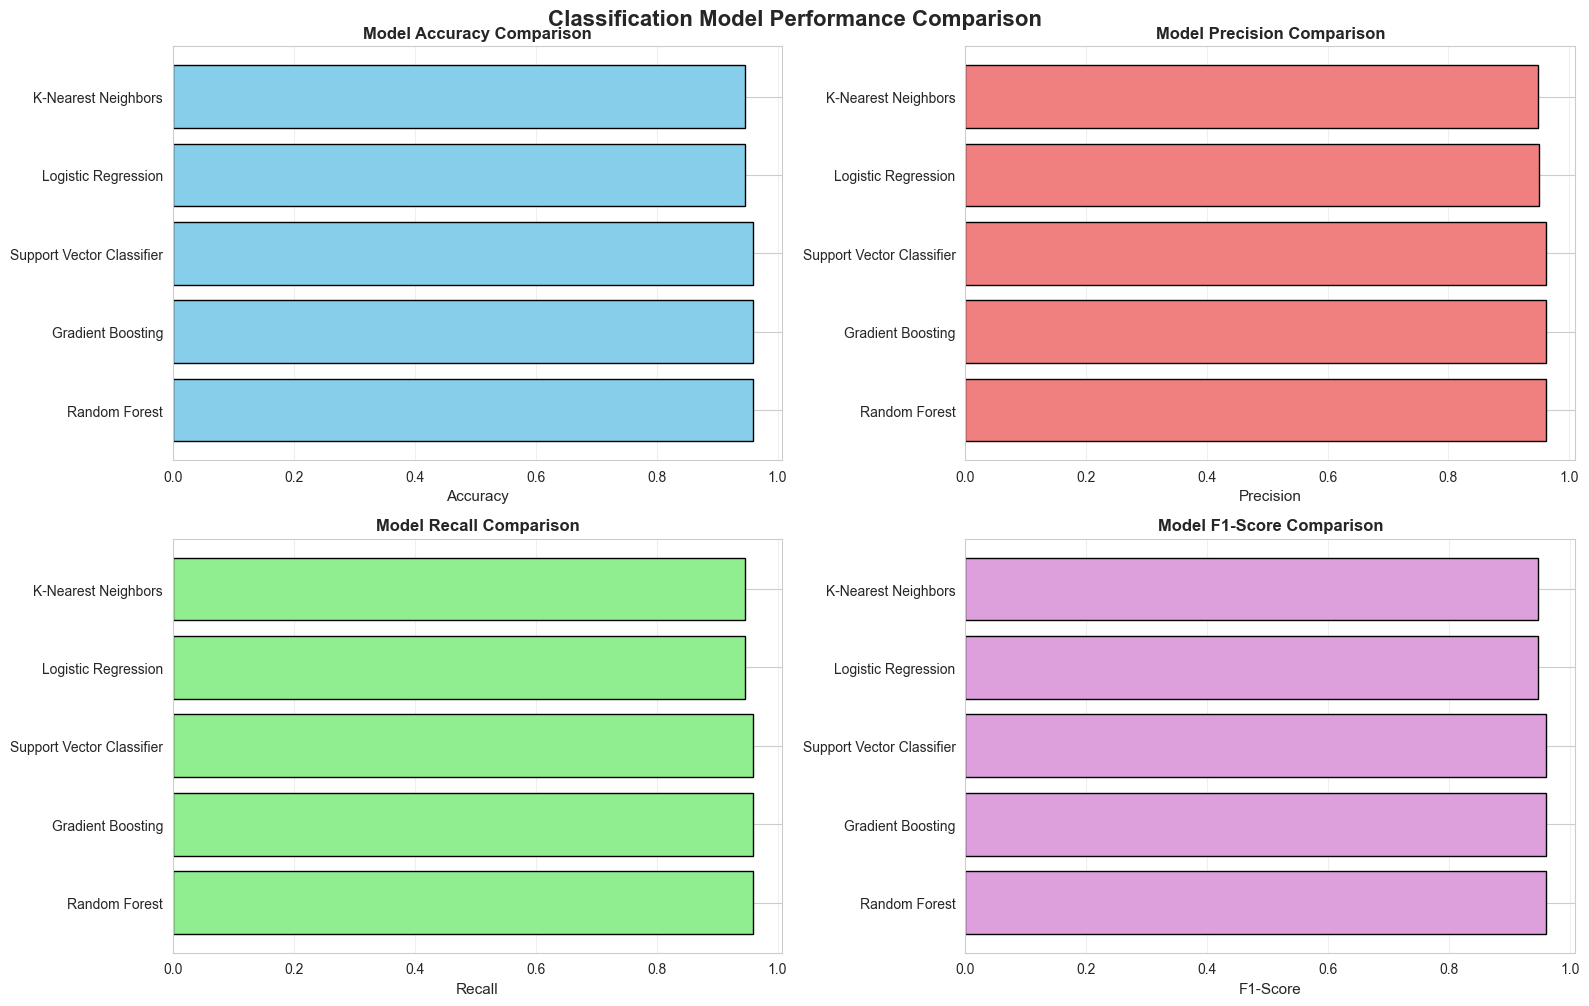


🏆 BEST PERFORMING CLASSIFIER: Random Forest
   • Accuracy: 0.9600 (96.00%)


In [26]:

# ============================================================================
# CELL 32: [CODE] - Train Classification Models
# ============================================================================

print("="*80)
print("TRAINING CLASSIFICATION MODELS")
print("="*80)

# Dictionary to store models and results
classification_models = {}
classification_results = []

# 1. RANDOM FOREST CLASSIFIER
print("\n1️⃣  RANDOM FOREST CLASSIFIER")
print("-" * 60)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf_clf.fit(X_train_clf, y_train_clf)
y_pred_rf_clf = rf_clf.predict(X_test_clf)
y_pred_proba_rf = rf_clf.predict_proba(X_test_clf)

acc_rf_clf = accuracy_score(y_test_clf, y_pred_rf_clf)
precision_rf = precision_score(y_test_clf, y_pred_rf_clf, average='weighted')
recall_rf = recall_score(y_test_clf, y_pred_rf_clf, average='weighted')
f1_rf = f1_score(y_test_clf, y_pred_rf_clf, average='weighted')

classification_models['Random Forest'] = rf_clf
classification_results.append({
    'Model': 'Random Forest',
    'Accuracy': acc_rf_clf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1-Score': f1_rf
})

print(f"✓ Trained with {rf_clf.n_estimators} trees")
print(f"   • Accuracy:  {acc_rf_clf:.4f}")
print(f"   • Precision: {precision_rf:.4f}")
print(f"   • Recall:    {recall_rf:.4f}")
print(f"   • F1-Score:  {f1_rf:.4f}")

# 2. GRADIENT BOOSTING CLASSIFIER
print("\n2️⃣  GRADIENT BOOSTING CLASSIFIER")
print("-" * 60)

gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42)
gb_clf.fit(X_train_clf, y_train_clf)
y_pred_gb_clf = gb_clf.predict(X_test_clf)
y_pred_proba_gb = gb_clf.predict_proba(X_test_clf)

acc_gb_clf = accuracy_score(y_test_clf, y_pred_gb_clf)
precision_gb = precision_score(y_test_clf, y_pred_gb_clf, average='weighted')
recall_gb = recall_score(y_test_clf, y_pred_gb_clf, average='weighted')
f1_gb = f1_score(y_test_clf, y_pred_gb_clf, average='weighted')

classification_models['Gradient Boosting'] = gb_clf
classification_results.append({
    'Model': 'Gradient Boosting',
    'Accuracy': acc_gb_clf,
    'Precision': precision_gb,
    'Recall': recall_gb,
    'F1-Score': f1_gb
})

print(f"✓ Trained with {gb_clf.n_estimators} boosting stages")
print(f"   • Accuracy:  {acc_gb_clf:.4f}")
print(f"   • Precision: {precision_gb:.4f}")
print(f"   • Recall:    {recall_gb:.4f}")
print(f"   • F1-Score:  {f1_gb:.4f}")

# 3. LOGISTIC REGRESSION
print("\n3️⃣  LOGISTIC REGRESSION (Multi-class)")
print("-" * 60)

lr_clf = LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)
lr_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_lr = lr_clf.predict(X_test_clf_scaled)
y_pred_proba_lr = lr_clf.predict_proba(X_test_clf_scaled)

acc_lr = accuracy_score(y_test_clf, y_pred_lr)
precision_lr = precision_score(y_test_clf, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test_clf, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test_clf, y_pred_lr, average='weighted')

classification_models['Logistic Regression'] = lr_clf
classification_results.append({
    'Model': 'Logistic Regression',
    'Accuracy': acc_lr,
    'Precision': precision_lr,
    'Recall': recall_lr,
    'F1-Score': f1_lr
})

print(f"✓ Trained with multinomial approach")
print(f"   • Accuracy:  {acc_lr:.4f}")
print(f"   • Precision: {precision_lr:.4f}")
print(f"   • Recall:    {recall_lr:.4f}")
print(f"   • F1-Score:  {f1_lr:.4f}")

# 4. SUPPORT VECTOR CLASSIFIER
print("\n4️⃣  SUPPORT VECTOR CLASSIFIER")
print("-" * 60)

svc_clf = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svc_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_svc = svc_clf.predict(X_test_clf_scaled)
y_pred_proba_svc = svc_clf.predict_proba(X_test_clf_scaled)

acc_svc = accuracy_score(y_test_clf, y_pred_svc)
precision_svc = precision_score(y_test_clf, y_pred_svc, average='weighted')
recall_svc = recall_score(y_test_clf, y_pred_svc, average='weighted')
f1_svc = f1_score(y_test_clf, y_pred_svc, average='weighted')

classification_models['SVC'] = svc_clf
classification_results.append({
    'Model': 'Support Vector Classifier',
    'Accuracy': acc_svc,
    'Precision': precision_svc,
    'Recall': recall_svc,
    'F1-Score': f1_svc
})

print(f"✓ Trained with RBF kernel")
print(f"   • Accuracy:  {acc_svc:.4f}")
print(f"   • Precision: {precision_svc:.4f}")
print(f"   • Recall:    {recall_svc:.4f}")
print(f"   • F1-Score:  {f1_svc:.4f}")

# 5. K-NEAREST NEIGHBORS
print("\n5️⃣  K-NEAREST NEIGHBORS")
print("-" * 60)

knn_clf = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_clf.fit(X_train_clf_scaled, y_train_clf)
y_pred_knn = knn_clf.predict(X_test_clf_scaled)
y_pred_proba_knn = knn_clf.predict_proba(X_test_clf_scaled)

acc_knn = accuracy_score(y_test_clf, y_pred_knn)
precision_knn = precision_score(y_test_clf, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test_clf, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test_clf, y_pred_knn, average='weighted')

classification_models['KNN'] = knn_clf
classification_results.append({
    'Model': 'K-Nearest Neighbors',
    'Accuracy': acc_knn,
    'Precision': precision_knn,
    'Recall': recall_knn,
    'F1-Score': f1_knn
})

print(f"✓ Trained with k={knn_clf.n_neighbors}")
print(f"   • Accuracy:  {acc_knn:.4f}")
print(f"   • Precision: {precision_knn:.4f}")
print(f"   • Recall:    {recall_knn:.4f}")
print(f"   • F1-Score:  {f1_knn:.4f}")

# Create results dataframe
results_df_clf = pd.DataFrame(classification_results).sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("CLASSIFICATION MODELS - PERFORMANCE COMPARISON")
print("="*80)
display(results_df_clf)

# Visualize results
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Accuracy
axes[0, 0].barh(results_df_clf['Model'], results_df_clf['Accuracy'], color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Accuracy', fontsize=11)
axes[0, 0].set_title('Model Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3, axis='x')

# Precision
axes[0, 1].barh(results_df_clf['Model'], results_df_clf['Precision'], color='lightcoral', edgecolor='black')
axes[0, 1].set_xlabel('Precision', fontsize=11)
axes[0, 1].set_title('Model Precision Comparison', fontsize=12, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3, axis='x')

# Recall
axes[1, 0].barh(results_df_clf['Model'], results_df_clf['Recall'], color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Recall', fontsize=11)
axes[1, 0].set_title('Model Recall Comparison', fontsize=12, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# F1-Score
axes[1, 1].barh(results_df_clf['Model'], results_df_clf['F1-Score'], color='plum', edgecolor='black')
axes[1, 1].set_xlabel('F1-Score', fontsize=11)
axes[1, 1].set_title('Model F1-Score Comparison', fontsize=12, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.suptitle('Classification Model Performance Comparison', fontsize=16, fontweight='bold', y=1.002)
plt.show()

# Identify best model
best_clf_model_name = results_df_clf.iloc[0]['Model']
best_acc = results_df_clf.iloc[0]['Accuracy']

print(f"\n🏆 BEST PERFORMING CLASSIFIER: {best_clf_model_name}")
print(f"   • Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")


CONFUSION MATRICES - ALL CLASSIFICATION MODELS


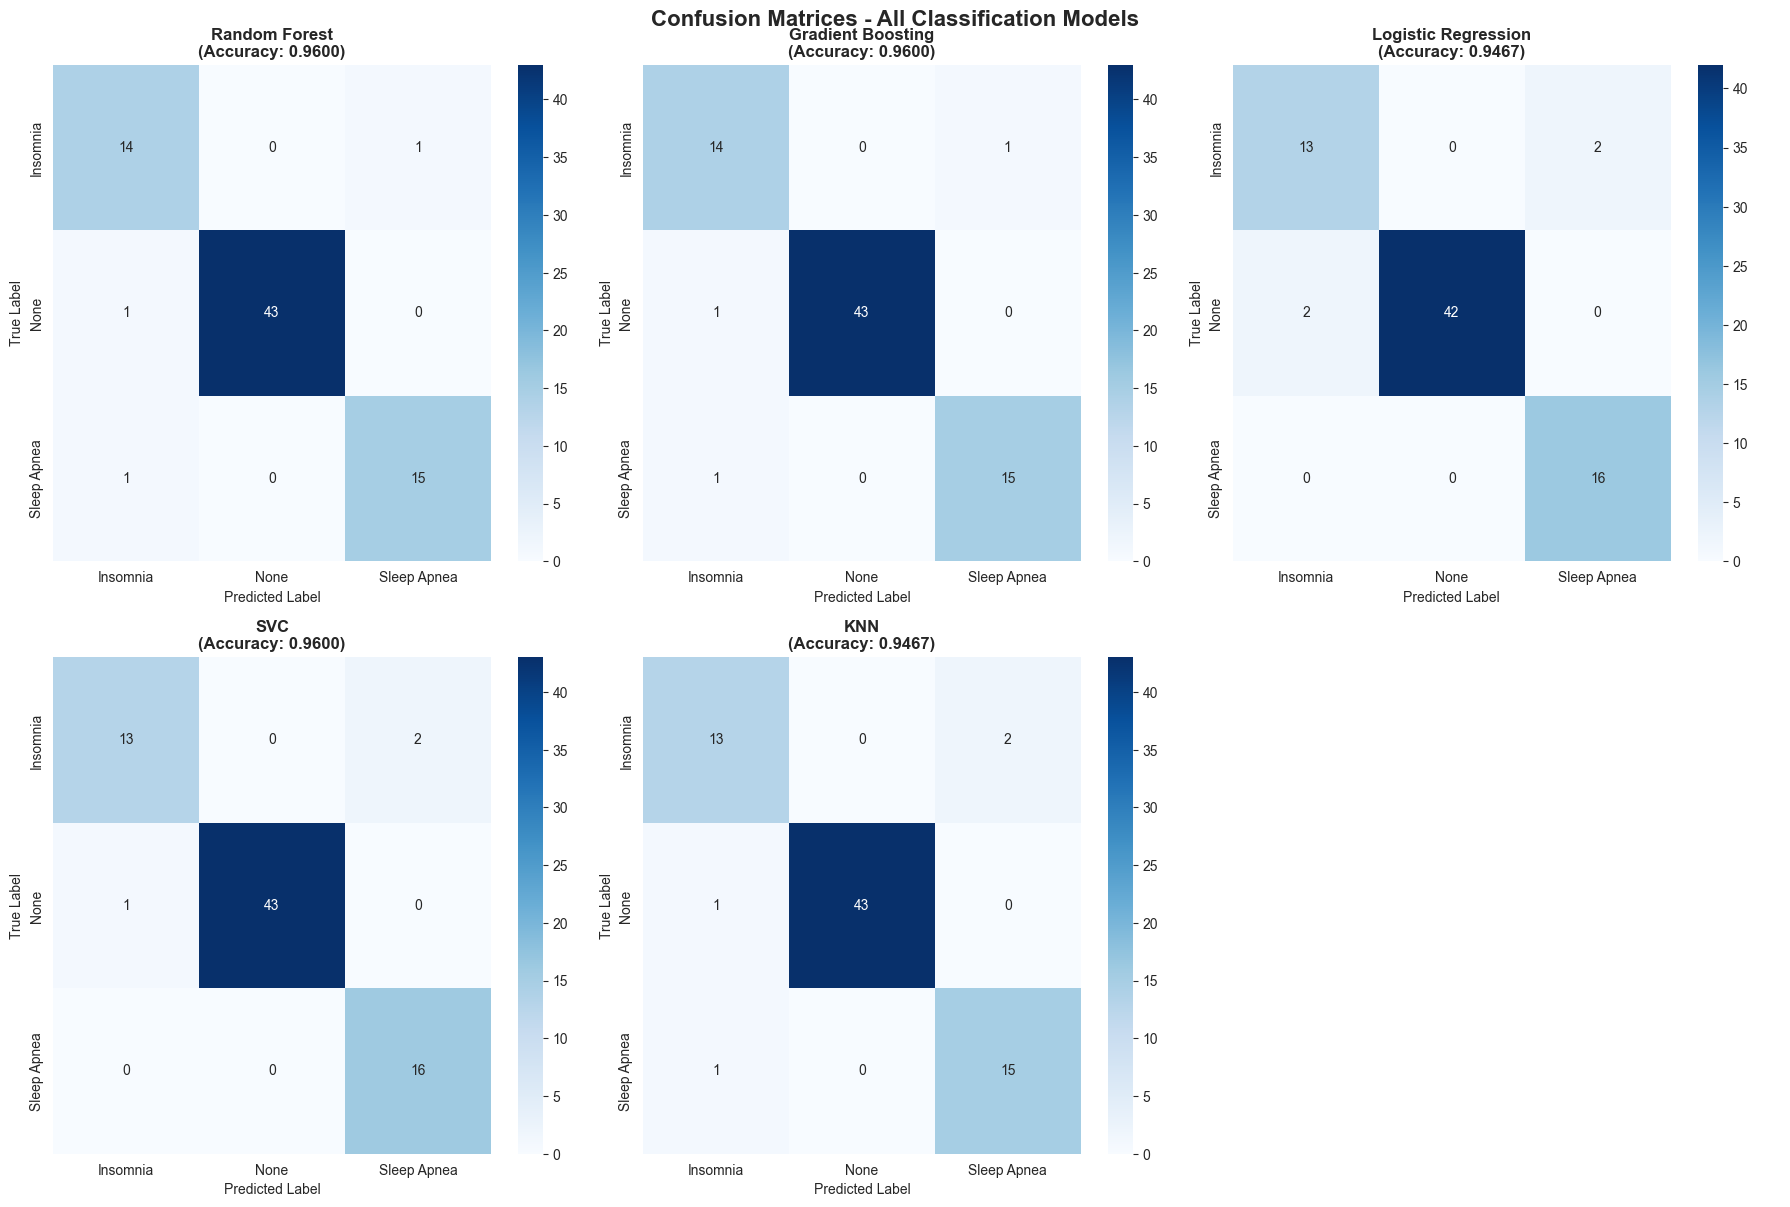


DETAILED CLASSIFICATION REPORT - Random Forest
              precision    recall  f1-score   support

    Insomnia       0.88      0.93      0.90        15
        None       1.00      0.98      0.99        44
 Sleep Apnea       0.94      0.94      0.94        16

    accuracy                           0.96        75
   macro avg       0.94      0.95      0.94        75
weighted avg       0.96      0.96      0.96        75



In [27]:

# ============================================================================
# CELL 33: [CODE] - Confusion Matrices
# ============================================================================

print("="*80)
print("CONFUSION MATRICES - ALL CLASSIFICATION MODELS")
print("="*80)

# Get class names
class_names = le_sleep_disorder.classes_

# Predictions for all models
predictions = [
    ('Random Forest', y_pred_rf_clf),
    ('Gradient Boosting', y_pred_gb_clf),
    ('Logistic Regression', y_pred_lr),
    ('SVC', y_pred_svc),
    ('KNN', y_pred_knn)
]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, y_pred) in enumerate(predictions):
    cm = confusion_matrix(y_test_clf, y_pred)
    
    # Normalize confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    # Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_names, yticklabels=class_names,
                ax=axes[idx], cbar=True)
    axes[idx].set_title(f'{model_name}\n(Accuracy: {accuracy_score(y_test_clf, y_pred):.4f})',
                       fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('True Label', fontsize=10)
    axes[idx].set_xlabel('Predicted Label', fontsize=10)

# Hide extra subplot
axes[5].axis('off')

plt.tight_layout()
plt.suptitle('Confusion Matrices - All Classification Models', fontsize=16, fontweight='bold', y=1.002)
plt.show()

# Detailed classification report for best model
print("\n" + "="*80)
print(f"DETAILED CLASSIFICATION REPORT - {best_clf_model_name}")
print("="*80)

# Get predictions for best model
if best_clf_model_name == 'Random Forest':
    y_pred_best = y_pred_rf_clf
elif best_clf_model_name == 'Gradient Boosting':
    y_pred_best = y_pred_gb_clf
elif best_clf_model_name == 'Logistic Regression':
    y_pred_best = y_pred_lr
elif best_clf_model_name == 'Support Vector Classifier':
    y_pred_best = y_pred_svc
else:
    y_pred_best = y_pred_knn

print(classification_report(y_test_clf, y_pred_best, target_names=class_names))

# CELL 34: [MARKDOWN]
# ============================================================================

## 10. Advanced Modeling Techniques

### Hyperparameter Tuning
Using GridSearchCV and RandomizedSearchCV to optimize model performance

### Ensemble Methods
Combining models for improved predictions:
1. **Voting Classifier** - Combining predictions from multiple models
2. **Stacking Classifier** - Meta-learning approach

### Cross-Validation
Robust performance estimation using k-fold cross-validation


HYPERPARAMETER TUNING - RANDOM FOREST CLASSIFIER
📊 Parameter Grid:
   • n_estimators        : [50, 100, 200]
   • max_depth           : [5, 10, 15, None]
   • min_samples_split   : [2, 5, 10]
   • min_samples_leaf    : [1, 2, 4]
   • max_features        : ['sqrt', 'log2']

   • Total combinations: 216

🔍 Running GridSearchCV with 5-fold cross-validation...
   This may take a few minutes...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits

✓ GridSearchCV completed!

BEST PARAMETERS FOUND
   • max_depth           : 10
   • max_features        : sqrt
   • min_samples_leaf    : 1
   • min_samples_split   : 5
   • n_estimators        : 100

📊 Cross-Validation Scores:
   • Best CV Score: 0.9030
   • Mean CV Score: 0.8915
   • Std CV Score:  0.0368

📊 Test Set Performance:
   • Test Accuracy: 0.9733
   • Test F1-Score: 0.9733

📊 Improvement over baseline Random Forest:
   • Baseline Accuracy: 0.9600
   • Tuned Accuracy:    0.9733
   • Improvement:       0.0133 (+1.39%)


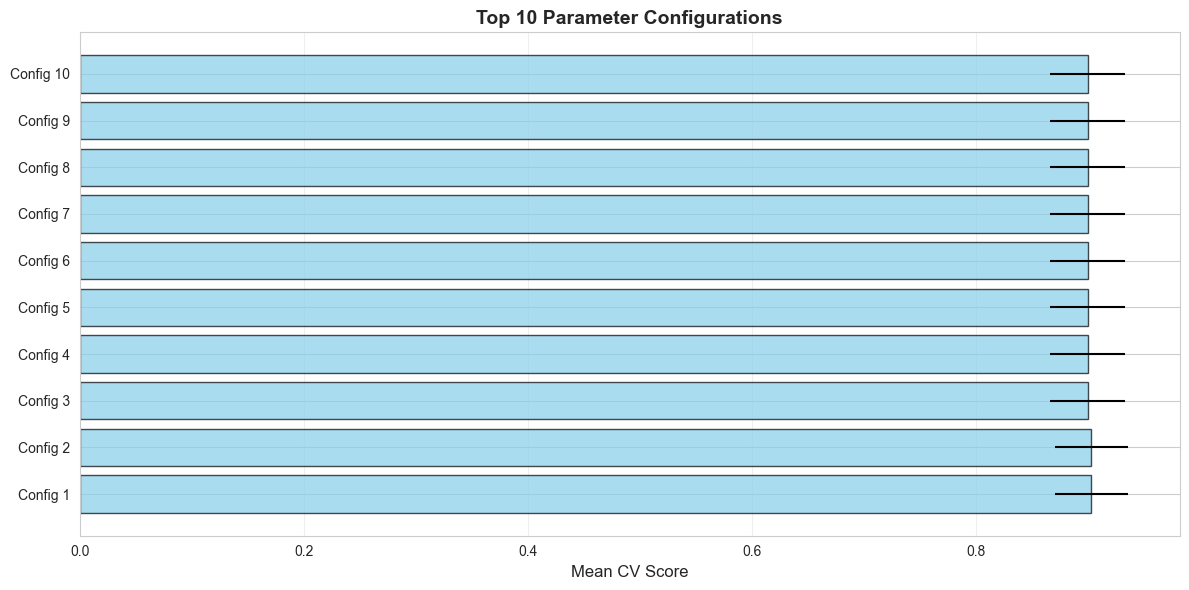

In [28]:

# ============================================================================
# CELL 35: [CODE] - Hyperparameter Tuning - Random Forest
# ============================================================================

print("="*80)
print("HYPERPARAMETER TUNING - RANDOM FOREST CLASSIFIER")
print("="*80)

# Define parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

print(f"📊 Parameter Grid:")
for param, values in param_grid_rf.items():
    print(f"   • {param:20s}: {values}")

total_combinations = 1
for values in param_grid_rf.values():
    total_combinations *= len(values)
print(f"\n   • Total combinations: {total_combinations}")

# Initialize GridSearchCV
print("\n🔍 Running GridSearchCV with 5-fold cross-validation...")
print("   This may take a few minutes...")

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit
grid_search_rf.fit(X_train_clf, y_train_clf)

print("\n✓ GridSearchCV completed!")
print("\n" + "="*80)
print("BEST PARAMETERS FOUND")
print("="*80)

for param, value in grid_search_rf.best_params_.items():
    print(f"   • {param:20s}: {value}")

print(f"\n📊 Cross-Validation Scores:")
print(f"   • Best CV Score: {grid_search_rf.best_score_:.4f}")
print(f"   • Mean CV Score: {grid_search_rf.cv_results_['mean_test_score'].mean():.4f}")
print(f"   • Std CV Score:  {grid_search_rf.cv_results_['std_test_score'].mean():.4f}")

# Evaluate on test set
y_pred_tuned = grid_search_rf.best_estimator_.predict(X_test_clf)
acc_tuned = accuracy_score(y_test_clf, y_pred_tuned)
f1_tuned = f1_score(y_test_clf, y_pred_tuned, average='weighted')

print(f"\n📊 Test Set Performance:")
print(f"   • Test Accuracy: {acc_tuned:.4f}")
print(f"   • Test F1-Score: {f1_tuned:.4f}")

# Compare with baseline
print(f"\n📊 Improvement over baseline Random Forest:")
print(f"   • Baseline Accuracy: {acc_rf_clf:.4f}")
print(f"   • Tuned Accuracy:    {acc_tuned:.4f}")
print(f"   • Improvement:       {(acc_tuned - acc_rf_clf):.4f} ({(acc_tuned - acc_rf_clf)/acc_rf_clf*100:+.2f}%)")

# Visualize top parameter importance
cv_results = pd.DataFrame(grid_search_rf.cv_results_)
top_10 = cv_results.nlargest(10, 'mean_test_score')

plt.figure(figsize=(12, 6))
plt.barh(range(10), top_10['mean_test_score'], xerr=top_10['std_test_score'], 
         color='skyblue', edgecolor='black', alpha=0.7)
plt.yticks(range(10), [f"Config {i+1}" for i in range(10)])
plt.xlabel('Mean CV Score', fontsize=12)
plt.title('Top 10 Parameter Configurations', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


CROSS-VALIDATION ANALYSIS - ALL MODELS

🔄 Performing 10-fold cross-validation for each model...
   This evaluates model performance on different data splits

Processing: Random Forest...
   ✓ Random Forest            : 0.8028 (±0.1364)
Processing: Gradient Boosting...
   ✓ Gradient Boosting        : 0.7605 (±0.2038)
Processing: Logistic Regression...
   ✓ Logistic Regression      : 0.8722 (±0.1190)
Processing: SVC...
   ✓ SVC                      : 0.8723 (±0.1234)
Processing: KNN...
   ✓ KNN                      : 0.8238 (±0.1450)

CROSS-VALIDATION SUMMARY


,Model,Mean CV Score,Std CV Score,Min CV Score,Max CV Score
3,SVC,0.872333,0.123435,0.657895,1.0
2,Logistic Regression,0.872191,0.118965,0.657895,1.0
4,KNN,0.823826,0.145020,0.594595,1.0
0,Random Forest,0.802845,0.136359,0.578947,1.0
1,Gradient Boosting,0.760455,0.203763,0.315789,1.0


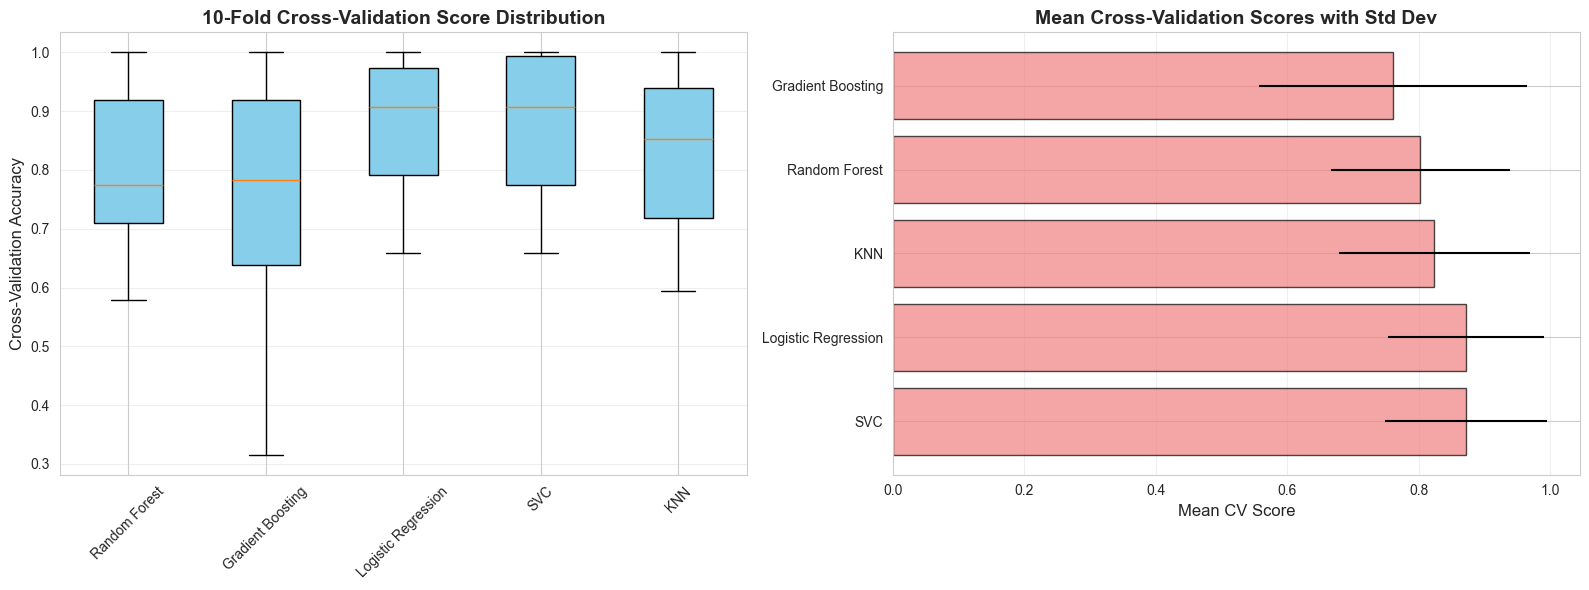


💡 Interpretation:
   • Higher mean CV score indicates better average performance
   • Lower std dev indicates more consistent performance across folds
   • Box plot shows score distribution across all 10 folds


In [29]:

# ============================================================================
# CELL 36: [CODE] - Cross-Validation Analysis
# ============================================================================

print("="*80)
print("CROSS-VALIDATION ANALYSIS - ALL MODELS")
print("="*80)

# Perform 10-fold cross-validation for all models
cv_scores_all = {}

models_for_cv = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVC': SVC(kernel='rbf', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

print("\n🔄 Performing 10-fold cross-validation for each model...")
print("   This evaluates model performance on different data splits\n")

cv_results_summary = []

for model_name, model in models_for_cv.items():
    print(f"Processing: {model_name}...")
    
    # Use scaled data for models that need it
    if model_name in ['Logistic Regression', 'SVC', 'KNN']:
        X_for_cv = scaler_clf.fit_transform(X_classification)
    else:
        X_for_cv = X_classification
    
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_for_cv, y_classification, cv=10, scoring='accuracy', n_jobs=-1)
    
    cv_scores_all[model_name] = cv_scores
    
    cv_results_summary.append({
        'Model': model_name,
        'Mean CV Score': cv_scores.mean(),
        'Std CV Score': cv_scores.std(),
        'Min CV Score': cv_scores.min(),
        'Max CV Score': cv_scores.max()
    })
    
    print(f"   ✓ {model_name:25s}: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

print("\n" + "="*80)
print("CROSS-VALIDATION SUMMARY")
print("="*80)

cv_summary_df = pd.DataFrame(cv_results_summary).sort_values('Mean CV Score', ascending=False)
display(cv_summary_df)

# Visualize CV scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Box plot of CV scores
cv_scores_list = [cv_scores_all[model] for model in cv_scores_all.keys()]
bp = ax1.boxplot(cv_scores_list, labels=list(cv_scores_all.keys()), patch_artist=True)

for patch in bp['boxes']:
    patch.set_facecolor('skyblue')
    patch.set_edgecolor('black')

ax1.set_ylabel('Cross-Validation Accuracy', fontsize=12)
ax1.set_title('10-Fold Cross-Validation Score Distribution', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

# Mean scores with error bars
models_list = list(cv_summary_df['Model'])
mean_scores = cv_summary_df['Mean CV Score'].values
std_scores = cv_summary_df['Std CV Score'].values

ax2.barh(models_list, mean_scores, xerr=std_scores, color='lightcoral', edgecolor='black', alpha=0.7)
ax2.set_xlabel('Mean CV Score', fontsize=12)
ax2.set_title('Mean Cross-Validation Scores with Std Dev', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   • Higher mean CV score indicates better average performance")
print("   • Lower std dev indicates more consistent performance across folds")
print("   • Box plot shows score distribution across all 10 folds")


ENSEMBLE METHODS - VOTING CLASSIFIER

📊 Combining predictions from multiple models...
   Voting strategies: Hard (majority vote) and Soft (average probabilities)

1️⃣  HARD VOTING (Majority Vote)
------------------------------------------------------------
✓ Hard Voting Classifier trained
   • Test Accuracy: 0.9600
   • Test F1-Score: 0.9606

2️⃣  SOFT VOTING (Probability Average)
------------------------------------------------------------
✓ Soft Voting Classifier trained
   • Test Accuracy: 0.9600
   • Test F1-Score: 0.9606

ENSEMBLE VS INDIVIDUAL MODELS COMPARISON


,Model,Accuracy,F1-Score
0,Random Forest,0.960000,0.960569
1,Gradient Boosting,0.960000,0.960569
3,Voting (Hard),0.960000,0.960569
4,Voting (Soft),0.960000,0.960569
2,Logistic Regression,0.946667,0.947141


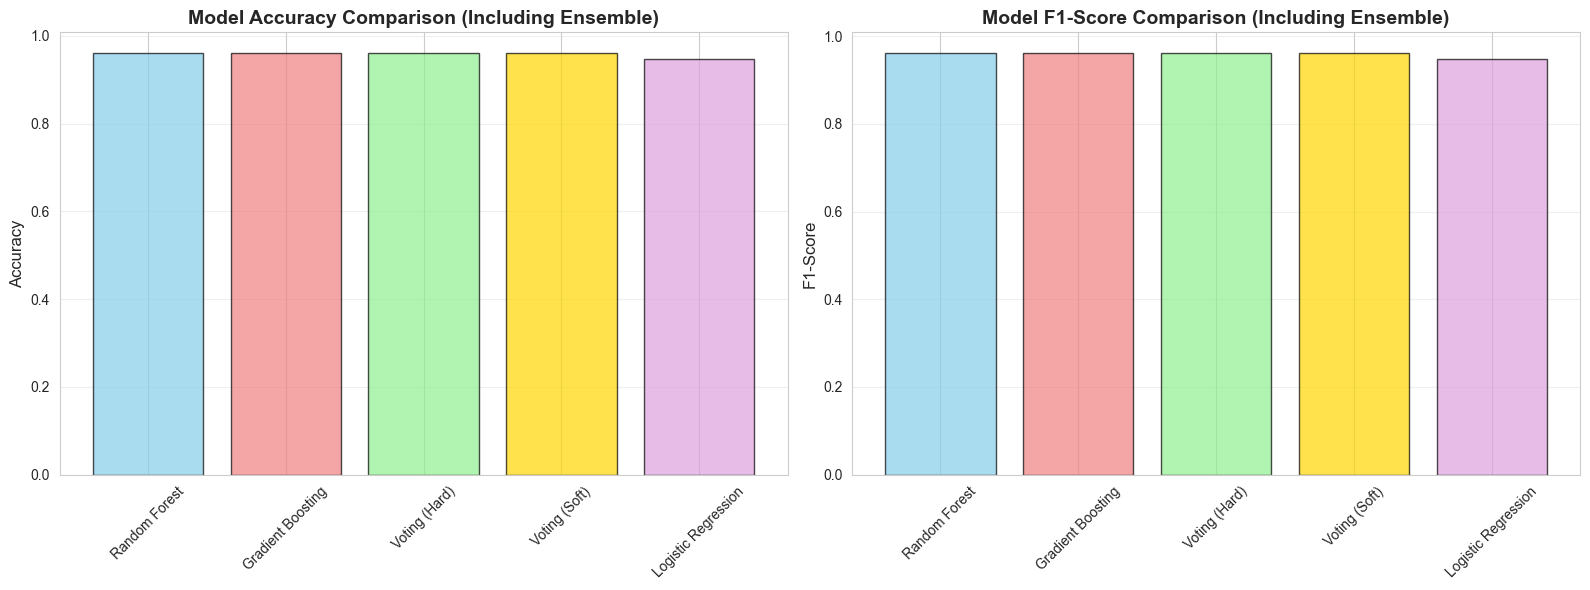


🏆 BEST ENSEMBLE METHOD: Hard Voting
   • Accuracy: 0.9600


In [30]:

# ============================================================================
# CELL 37: [CODE] - Ensemble Methods - Voting Classifier
# ============================================================================

print("="*80)
print("ENSEMBLE METHODS - VOTING CLASSIFIER")
print("="*80)

print("\n📊 Combining predictions from multiple models...")
print("   Voting strategies: Hard (majority vote) and Soft (average probabilities)\n")

# Create base estimators
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Hard Voting Classifier
print("1️⃣  HARD VOTING (Majority Vote)")
print("-" * 60)

voting_hard = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
voting_hard.fit(X_train_clf_scaled, y_train_clf)
y_pred_voting_hard = voting_hard.predict(X_test_clf_scaled)

acc_voting_hard = accuracy_score(y_test_clf, y_pred_voting_hard)
f1_voting_hard = f1_score(y_test_clf, y_pred_voting_hard, average='weighted')

print(f"✓ Hard Voting Classifier trained")
print(f"   • Test Accuracy: {acc_voting_hard:.4f}")
print(f"   • Test F1-Score: {f1_voting_hard:.4f}")

# Soft Voting Classifier
print("\n2️⃣  SOFT VOTING (Probability Average)")
print("-" * 60)

voting_soft = VotingClassifier(estimators=estimators, voting='soft', n_jobs=-1)
voting_soft.fit(X_train_clf_scaled, y_train_clf)
y_pred_voting_soft = voting_soft.predict(X_test_clf_scaled)

acc_voting_soft = accuracy_score(y_test_clf, y_pred_voting_soft)
f1_voting_soft = f1_score(y_test_clf, y_pred_voting_soft, average='weighted')

print(f"✓ Soft Voting Classifier trained")
print(f"   • Test Accuracy: {acc_voting_soft:.4f}")
print(f"   • Test F1-Score: {f1_voting_soft:.4f}")

# Compare with individual models
print("\n" + "="*80)
print("ENSEMBLE VS INDIVIDUAL MODELS COMPARISON")
print("="*80)

comparison_data = {
    'Model': ['Random Forest', 'Gradient Boosting', 'Logistic Regression', 
              'Voting (Hard)', 'Voting (Soft)'],
    'Accuracy': [acc_rf_clf, acc_gb_clf, acc_lr, acc_voting_hard, acc_voting_soft],
    'F1-Score': [f1_rf, f1_gb, f1_lr, f1_voting_hard, f1_voting_soft]
}

comparison_df = pd.DataFrame(comparison_data).sort_values('Accuracy', ascending=False)
display(comparison_df)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

colors = ['skyblue', 'lightcoral', 'lightgreen', 'gold', 'plum']

ax1.bar(comparison_df['Model'], comparison_df['Accuracy'], color=colors, edgecolor='black', alpha=0.7)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_title('Model Accuracy Comparison (Including Ensemble)', fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3, axis='y')

ax2.bar(comparison_df['Model'], comparison_df['F1-Score'], color=colors, edgecolor='black', alpha=0.7)
ax2.set_ylabel('F1-Score', fontsize=12)
ax2.set_title('Model F1-Score Comparison (Including Ensemble)', fontsize=14, fontweight='bold')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

best_ensemble = 'Soft Voting' if acc_voting_soft > acc_voting_hard else 'Hard Voting'
best_ensemble_acc = max(acc_voting_soft, acc_voting_hard)

print(f"\n🏆 BEST ENSEMBLE METHOD: {best_ensemble}")
print(f"   • Accuracy: {best_ensemble_acc:.4f}")



# ============================================================================
# CELL 38: [MARKDOWN]
# ============================================================================

## 11. Feature Importance Analysis

### Objective
Understand which features contribute most to model predictions

### Methods:
1. **Random Forest Feature Importance** - Based on impurity decrease
2. **Permutation Importance** - Based on prediction performance drop
3. **Feature Correlation with Target** - Statistical relationships

This analysis helps identify key drivers of sleep quality and disorder prediction.


FEATURE IMPORTANCE ANALYSIS - RANDOM FOREST

📊 Feature Importance Rankings:
------------------------------------------------------------
Diastolic_BP                   0.1302 █████████████
Systolic_BP                    0.1218 ████████████
Occupation_Encoded             0.1214 ████████████
BMI_Category_Encoded           0.1197 ███████████
Age                            0.1043 ██████████
Sleep_Efficiency               0.0715 ███████
Sleep Duration                 0.0699 ██████
Sleep_Deficit                  0.0690 ██████
Activity_Stress_Ratio          0.0463 ████
Heart Rate                     0.0377 ███
Physical Activity Level        0.0375 ███
Daily Steps                    0.0364 ███
Stress Level                   0.0300 ██
Gender_Encoded                 0.0045 


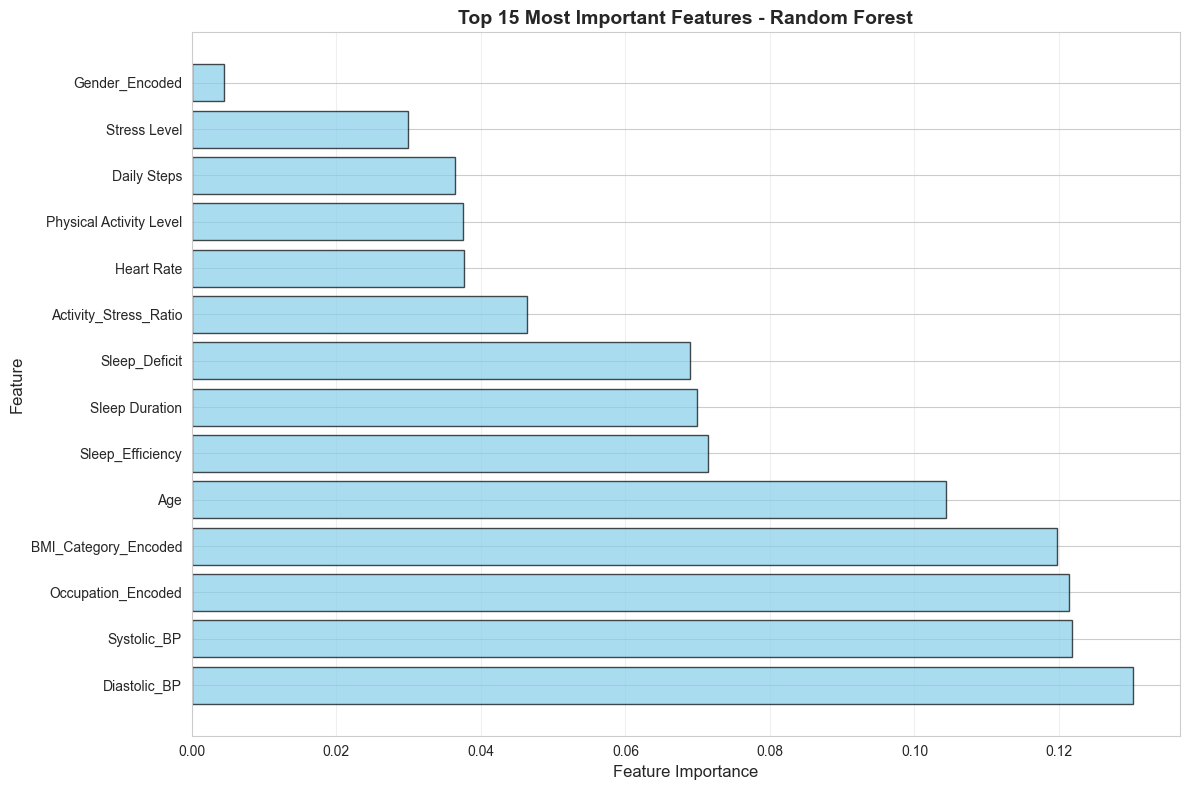


📊 Cumulative Importance Analysis:
   • Top 5 features explain:  59.74% of variance
   • Top 10 features explain: 89.17% of variance
   • 11 features needed for 90% variance explanation


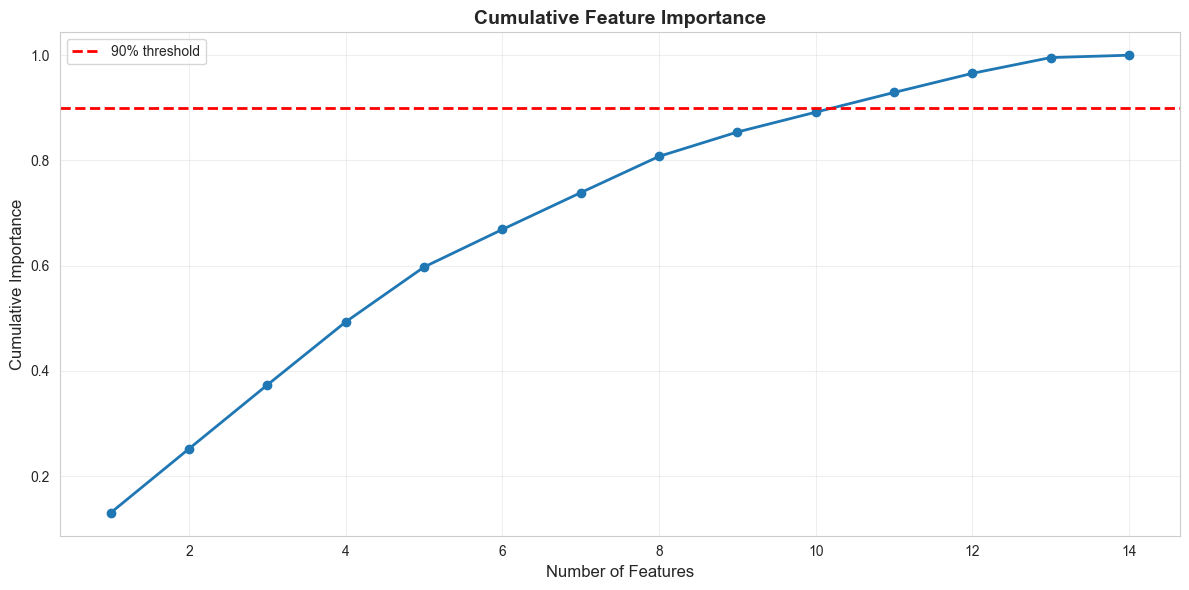

In [31]:

# ============================================================================
# CELL 39: [CODE] - Feature Importance - Random Forest
# ============================================================================

print("="*80)
print("FEATURE IMPORTANCE ANALYSIS - RANDOM FOREST")
print("="*80)

# Get feature importance from best Random Forest model
feature_importance_rf = grid_search_rf.best_estimator_.feature_importances_

# Create dataframe
importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': feature_importance_rf
}).sort_values('Importance', ascending=False)

print("\n📊 Feature Importance Rankings:")
print("-" * 60)
for idx, row in importance_df.iterrows():
    bar = '█' * int(row['Importance'] * 100)
    print(f"{row['Feature']:30s} {row['Importance']:.4f} {bar}")

# Visualize top features
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'][:15], importance_df['Importance'][:15], 
         color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top 15 Most Important Features - Random Forest', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Cumulative importance
cumsum_importance = importance_df['Importance'].cumsum()
n_features_90 = (cumsum_importance <= 0.90).sum() + 1

print(f"\n📊 Cumulative Importance Analysis:")
print(f"   • Top 5 features explain:  {cumsum_importance.iloc[4]:.2%} of variance")
print(f"   • Top 10 features explain: {cumsum_importance.iloc[9]:.2%} of variance")
print(f"   • {n_features_90} features needed for 90% variance explanation")

# Plot cumulative importance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(importance_df) + 1), cumsum_importance, marker='o', linewidth=2)
plt.axhline(y=0.9, color='r', linestyle='--', linewidth=2, label='90% threshold')
plt.xlabel('Number of Features', fontsize=12)
plt.ylabel('Cumulative Importance', fontsize=12)
plt.title('Cumulative Feature Importance', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


FEATURE IMPORTANCE ANALYSIS - GRADIENT BOOSTING

📊 Top 10 Features - Gradient Boosting:


,Feature,Importance_GB
3,BMI_Category_Encoded,0.329191
9,Systolic_BP,0.280566
2,Occupation_Encoded,0.169944
0,Age,0.096191
7,Heart Rate,0.031675
11,Sleep_Efficiency,0.020054
12,Activity_Stress_Ratio,0.018496
13,Sleep_Deficit,0.016972
4,Sleep Duration,0.011680
1,Gender_Encoded,0.007348


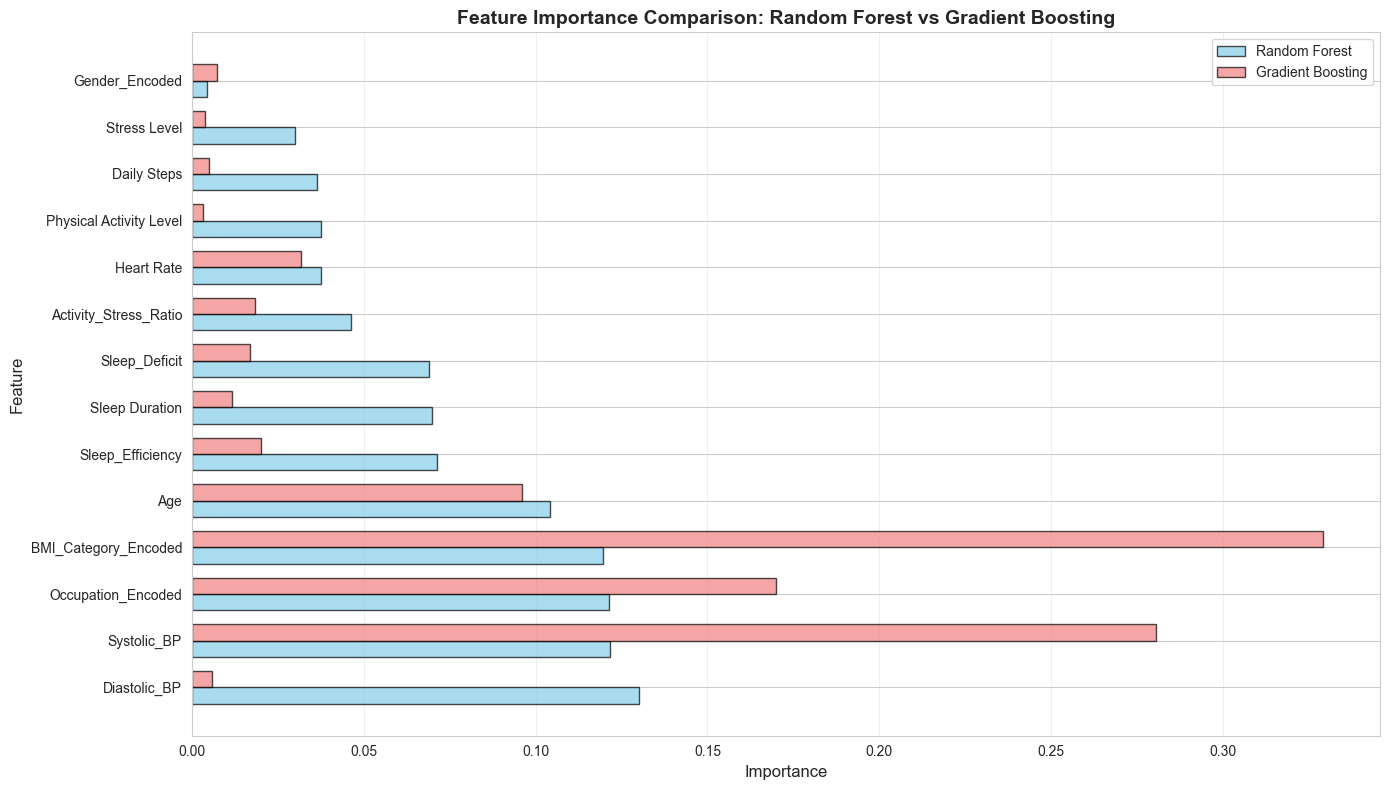


📊 Feature Importance Ranking Correlation:
   • Spearman correlation: 0.6308
   • P-value: 0.0156
   • Interpretation: Moderate agreement between models


In [32]:

# ============================================================================
# CELL 40: [CODE] - Feature Importance - Gradient Boosting
# ============================================================================

print("="*80)
print("FEATURE IMPORTANCE ANALYSIS - GRADIENT BOOSTING")
print("="*80)

# Get feature importance from Gradient Boosting
feature_importance_gb = gb_clf.feature_importances_

# Create dataframe
importance_gb_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance_GB': feature_importance_gb
}).sort_values('Importance_GB', ascending=False)

print("\n📊 Top 10 Features - Gradient Boosting:")
display(importance_gb_df.head(10))

# Compare RF vs GB feature importance
comparison_importance = importance_df.merge(importance_gb_df, on='Feature')
comparison_importance = comparison_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(14, 8))
x = np.arange(len(comparison_importance[:15]))
width = 0.35

plt.barh(x - width/2, comparison_importance['Importance'][:15], width, 
         label='Random Forest', color='skyblue', edgecolor='black', alpha=0.7)
plt.barh(x + width/2, comparison_importance['Importance_GB'][:15], width,
         label='Gradient Boosting', color='lightcoral', edgecolor='black', alpha=0.7)

plt.ylabel('Feature', fontsize=12)
plt.xlabel('Importance', fontsize=12)
plt.title('Feature Importance Comparison: Random Forest vs Gradient Boosting', 
          fontsize=14, fontweight='bold')
plt.yticks(x, comparison_importance['Feature'][:15])
plt.legend()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

# Calculate correlation between RF and GB importance rankings
from scipy.stats import spearmanr

corr, p_value = spearmanr(comparison_importance['Importance'], comparison_importance['Importance_GB'])
print(f"\n📊 Feature Importance Ranking Correlation:")
print(f"   • Spearman correlation: {corr:.4f}")
print(f"   • P-value: {p_value:.4f}")
print(f"   • Interpretation: {'Strong agreement' if corr > 0.7 else 'Moderate agreement' if corr > 0.5 else 'Weak agreement'} between models")



# ============================================================================
# CELL 41: [MARKDOWN]
# ============================================================================

## 12. Clustering and Unsupervised Learning

### Objective
Discover natural groupings in sleep health data without using labels

### Techniques:
1. **K-Means Clustering** - Partition-based clustering
2. **Principal Component Analysis (PCA)** - Dimensionality reduction for visualization
3. **t-SNE** - Non-linear dimensionality reduction

### Applications:
- Identify distinct sleep health profiles
- Discover hidden patterns in lifestyle factors
- Validate supervised learning findings


DETERMINING OPTIMAL NUMBER OF CLUSTERS

📊 Method 1: Elbow Method (Within-Cluster Sum of Squares)
------------------------------------------------------------
   k= 2: Inertia= 3589.19, Silhouette=0.3333
   k= 3: Inertia= 2854.86, Silhouette=0.3766
   k= 4: Inertia= 2257.40, Silhouette=0.4380
   k= 5: Inertia= 1749.35, Silhouette=0.5062
   k= 6: Inertia= 1368.92, Silhouette=0.5403
   k= 7: Inertia= 1109.97, Silhouette=0.5862
   k= 8: Inertia=  864.55, Silhouette=0.6095
   k= 9: Inertia=  749.50, Silhouette=0.6292
   k=10: Inertia=  652.35, Silhouette=0.6285


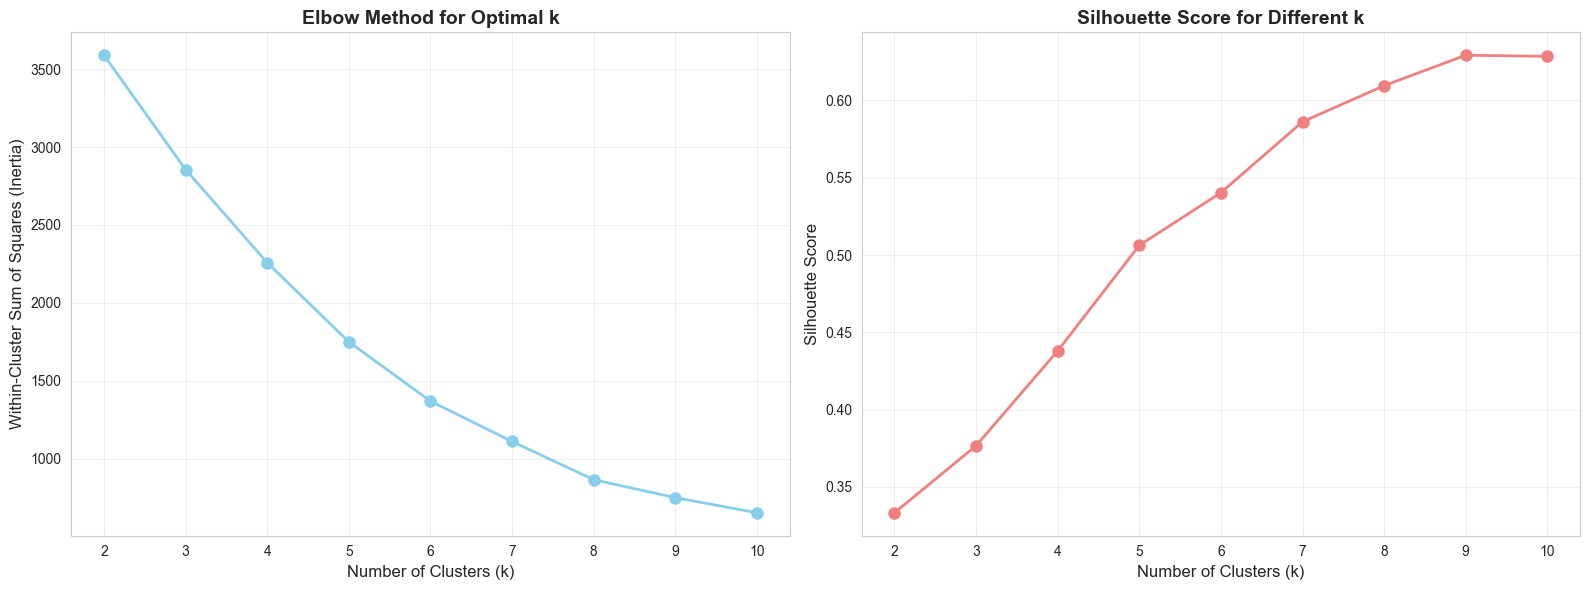


🎯 Optimal number of clusters based on Silhouette score: k=9


In [33]:

# ============================================================================
# CELL 42: [CODE] - Determine Optimal Number of Clusters
# ============================================================================

print("="*80)
print("DETERMINING OPTIMAL NUMBER OF CLUSTERS")
print("="*80)

# Prepare data for clustering (use scaled features)
X_clustering = X_classification.copy()
scaler_cluster = StandardScaler()
X_clustering_scaled = scaler_cluster.fit_transform(X_clustering)

# Elbow Method
print("\n📊 Method 1: Elbow Method (Within-Cluster Sum of Squares)")
print("-" * 60)

inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering_scaled)
    inertias.append(kmeans.inertia_)
    
    from sklearn.metrics import silhouette_score
    score = silhouette_score(X_clustering_scaled, kmeans.labels_)
    silhouette_scores.append(score)
    
    print(f"   k={k:2d}: Inertia={kmeans.inertia_:8.2f}, Silhouette={score:.4f}")

# Plot Elbow curve and Silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Elbow plot
ax1.plot(K_range, inertias, marker='o', linewidth=2, markersize=8, color='skyblue')
ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
ax1.set_ylabel('Within-Cluster Sum of Squares (Inertia)', fontsize=12)
ax1.set_title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Silhouette plot
ax2.plot(K_range, silhouette_scores, marker='o', linewidth=2, markersize=8, color='lightcoral')
ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
ax2.set_ylabel('Silhouette Score', fontsize=12)
ax2.set_title('Silhouette Score for Different k', fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Find optimal k based on silhouette score
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n🎯 Optimal number of clusters based on Silhouette score: k={optimal_k}")


In [34]:

# ============================================================================
# CELL 43: [CODE] - K-Means Clustering
# ============================================================================

print("="*80)
print(f"K-MEANS CLUSTERING WITH k={optimal_k}")
print("="*80)

# Perform K-Means clustering
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_clustering_scaled)

# Add cluster labels to dataframe
df_clustered = df_encoded.copy()
df_clustered['Cluster'] = cluster_labels

print(f"\n✓ K-Means clustering completed")
print(f"   • Number of clusters: {optimal_k}")
print(f"   • Final inertia: {kmeans_final.inertia_:.2f}")

# Analyze cluster distribution
print("\n📊 Cluster Distribution:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster, count in cluster_counts.items():
    print(f"   • Cluster {cluster}: {count:3d} samples ({count/len(cluster_labels)*100:5.2f}%)")

# Cluster characteristics
print("\n" + "="*80)
print("CLUSTER CHARACTERISTICS")
print("="*80)

key_features_for_profile = ['Sleep Duration', 'Quality of Sleep', 'Stress Level', 
                            'Physical Activity Level', 'Heart Rate', 'Sleep Disorder']

for cluster in range(optimal_k):
    print(f"\n🔹 CLUSTER {cluster} PROFILE:")
    print("-" * 60)
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster]
    
    for feature in key_features_for_profile:
        if feature == 'Sleep Disorder':
            # Categorical - show distribution
            disorder_dist = cluster_data[feature].value_counts()
            print(f"\n   {feature}:")
            for disorder, count in disorder_dist.items():
                print(f"      • {disorder:15s}: {count:3d} ({count/len(cluster_data)*100:5.1f}%)")
        else:
            # Numerical - show mean and std
            mean_val = cluster_data[feature].mean()
            std_val = cluster_data[feature].std()
            overall_mean = df_clustered[feature].mean()
            diff = mean_val - overall_mean
            status = "↑" if diff > 0 else "↓"
            print(f"   {feature:30s}: {mean_val:7.2f} (±{std_val:5.2f}) {status} {abs(diff):5.2f} from avg")


K-MEANS CLUSTERING WITH k=9

✓ K-Means clustering completed
   • Number of clusters: 9
   • Final inertia: 749.50

📊 Cluster Distribution:
   • Cluster 0:  40 samples (10.70%)
   • Cluster 1:  22 samples ( 5.88%)
   • Cluster 2:  35 samples ( 9.36%)
   • Cluster 3:  32 samples ( 8.56%)
   • Cluster 4:  34 samples ( 9.09%)
   • Cluster 5: 105 samples (28.07%)
   • Cluster 6:  27 samples ( 7.22%)
   • Cluster 7:  32 samples ( 8.56%)
   • Cluster 8:  47 samples (12.57%)

CLUSTER CHARACTERISTICS

🔹 CLUSTER 0 PROFILE:
------------------------------------------------------------
   Sleep Duration                :    7.29 (± 0.31) ↑  0.15 from avg
   Quality of Sleep              :    8.10 (± 0.30) ↑  0.79 from avg
   Stress Level                  :    4.00 (± 0.55) ↓  1.39 from avg
   Physical Activity Level       :   62.62 (± 8.16) ↑  3.45 from avg
   Heart Rate                    :   68.12 (± 1.38) ↓  2.04 from avg

   Sleep Disorder:
      • None           :  38 ( 95.0%)
      • Insomnia 

PRINCIPAL COMPONENT ANALYSIS (PCA)

✓ PCA completed
   • Components: 2
   • Explained variance ratio:
      • PC1: 0.3664 (36.64%)
      • PC2: 0.2809 (28.09%)
   • Total explained variance: 0.6473 (64.73%)


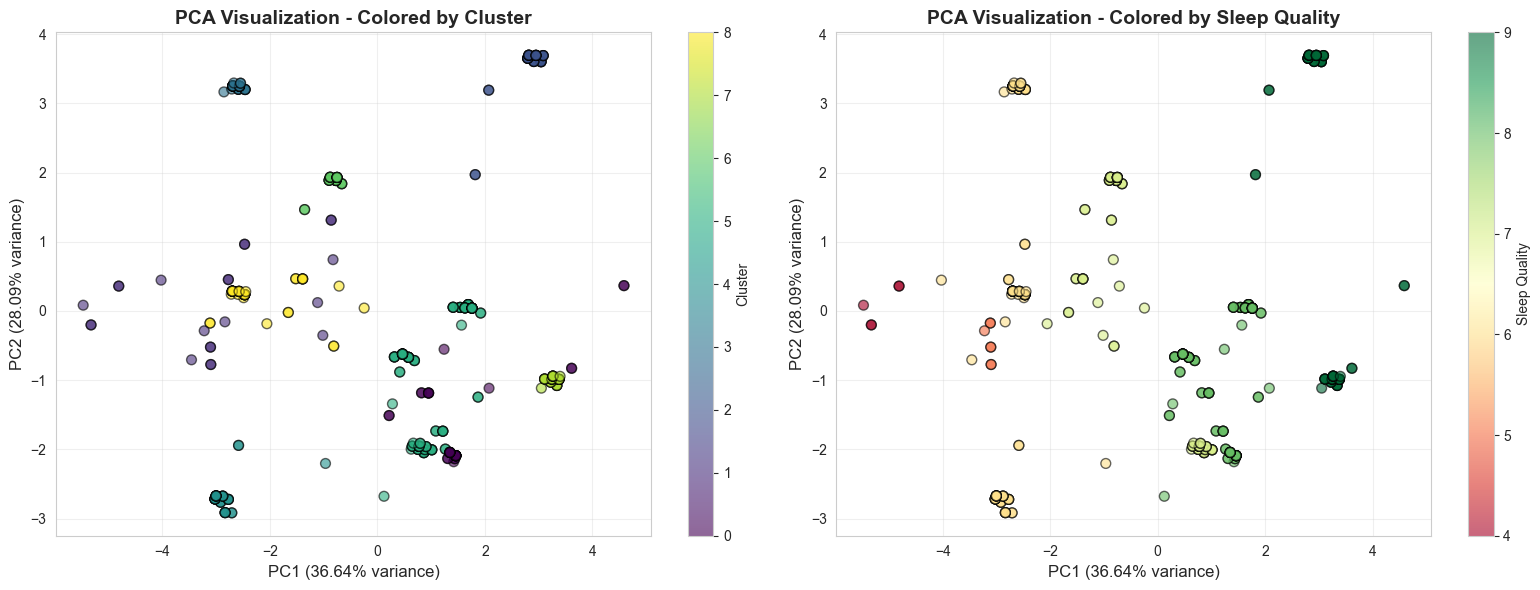

In [35]:

# ============================================================================
# CELL 44: [CODE] - PCA Visualization
# ============================================================================

print("="*80)
print("PRINCIPAL COMPONENT ANALYSIS (PCA)")
print("="*80)

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_clustering_scaled)

print(f"\n✓ PCA completed")
print(f"   • Components: {pca.n_components}")
print(f"   • Explained variance ratio:")
print(f"      • PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"      • PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"   • Total explained variance: {pca.explained_variance_ratio_.sum():.4f} ({pca.explained_variance_ratio_.sum()*100:.2f}%)")

# Visualize clusters in PCA space
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Colored by Cluster
scatter1 = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, 
                          cmap='viridis', alpha=0.6, edgecolors='black', s=50)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=12)
axes[0].set_title('PCA Visualization - Colored by Cluster', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Colored by Sleep Quality
scatter2 = axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=df_clustered['Quality of Sleep'], 
                          cmap='RdYlGn', alpha=0.6, edgecolors='black', s=50)
axes[1].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)', fontsize=12)
axes[1].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)', fontsize=12)
axes[1].set_title('PCA Visualization - Colored by Sleep Quality', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Sleep Quality')

plt.tight_layout()
plt.show()


t-SNE DIMENSIONALITY REDUCTION

📊 Performing t-SNE...
   This may take a moment...

✓ t-SNE completed


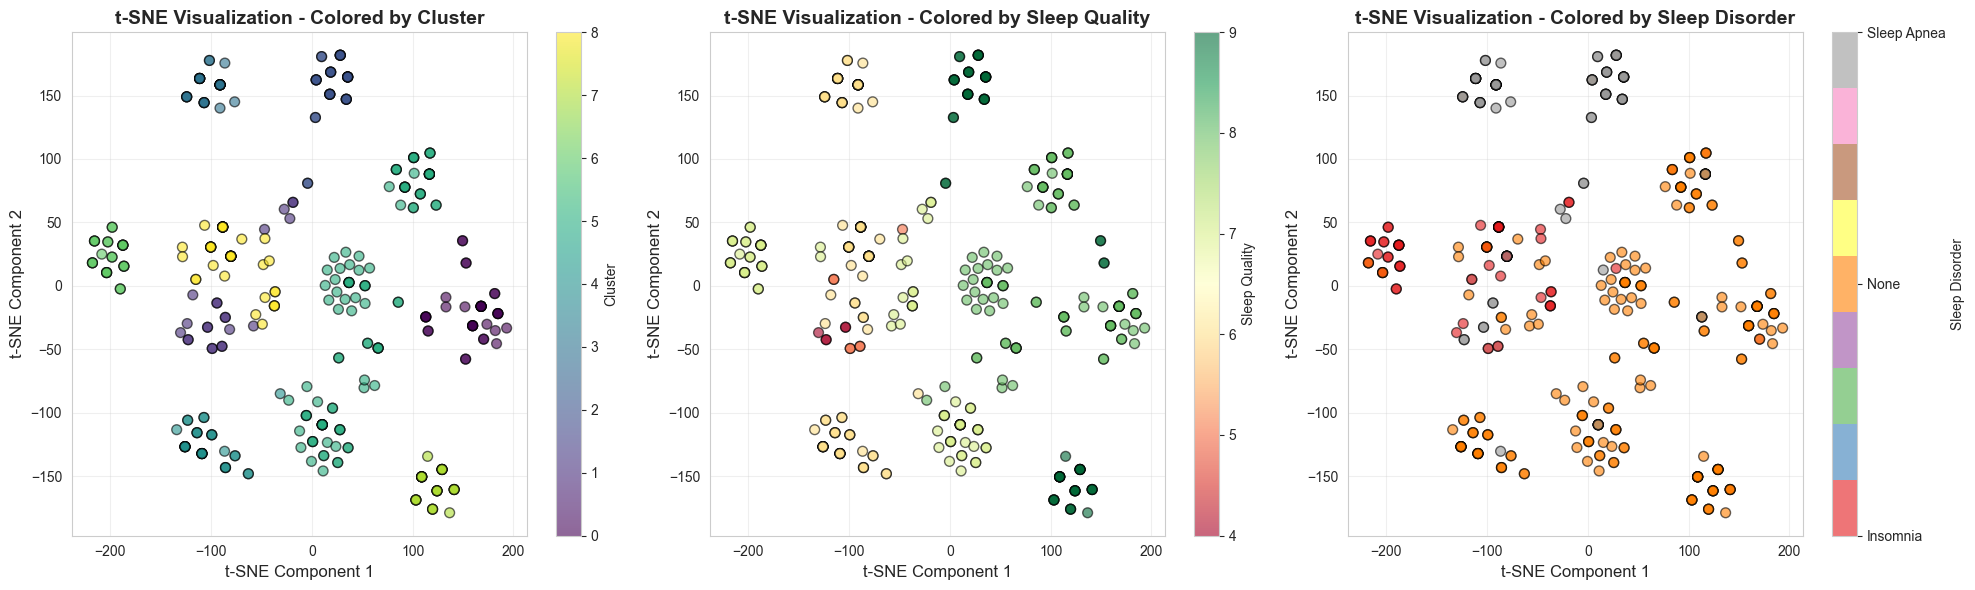


💡 Interpretation:
   • t-SNE reveals non-linear patterns in the data
   • Clusters represent distinct sleep health profiles
   • Visual separation suggests meaningful groupings


In [36]:

# ============================================================================
# CELL 45: [CODE] - t-SNE Visualization
# ============================================================================

print("="*80)
print("t-SNE DIMENSIONALITY REDUCTION")
print("="*80)

print("\n📊 Performing t-SNE...")
print("   This may take a moment...")

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_clustering_scaled)

print("\n✓ t-SNE completed")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Colored by Cluster
scatter1 = axes[0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, 
                          cmap='viridis', alpha=0.6, edgecolors='black', s=50)
axes[0].set_xlabel('t-SNE Component 1', fontsize=12)
axes[0].set_ylabel('t-SNE Component 2', fontsize=12)
axes[0].set_title('t-SNE Visualization - Colored by Cluster', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Cluster')

# Colored by Sleep Quality
scatter2 = axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=df_clustered['Quality of Sleep'], 
                          cmap='RdYlGn', alpha=0.6, edgecolors='black', s=50)
axes[1].set_xlabel('t-SNE Component 1', fontsize=12)
axes[1].set_ylabel('t-SNE Component 2', fontsize=12)
axes[1].set_title('t-SNE Visualization - Colored by Sleep Quality', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Sleep Quality')

# Colored by Sleep Disorder
sleep_disorder_encoded = df_clustered['Sleep_Disorder_Encoded']
scatter3 = axes[2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=sleep_disorder_encoded, 
                          cmap='Set1', alpha=0.6, edgecolors='black', s=50)
axes[2].set_xlabel('t-SNE Component 1', fontsize=12)
axes[2].set_ylabel('t-SNE Component 2', fontsize=12)
axes[2].set_title('t-SNE Visualization - Colored by Sleep Disorder', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
cbar = plt.colorbar(scatter3, ax=axes[2], label='Sleep Disorder', ticks=[0, 1, 2])
cbar.ax.set_yticklabels(['Insomnia', 'None', 'Sleep Apnea'])

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   • t-SNE reveals non-linear patterns in the data")
print("   • Clusters represent distinct sleep health profiles")
print("   • Visual separation suggests meaningful groupings")


CLUSTER VALIDATION - RELATIONSHIP WITH SLEEP DISORDER

📊 Cluster vs Sleep Disorder Distribution:


Sleep Disorder,Insomnia,None,Sleep Apnea
Cluster,,,
0,1,38,1
1,7,5,10
2,0,3,32
3,1,2,29
4,1,32,1
5,4,98,3
6,25,2,0
7,1,31,0
8,37,8,2



📊 Chi-Square Test of Independence:
   • Chi-square statistic: 506.9569
   • Degrees of freedom: 16
   • P-value: 0.0000
   • Significant: Yes ✓ (α=0.05)

   ✓ Clusters are significantly associated with Sleep Disorder types
     This validates that our unsupervised clustering captured meaningful patterns


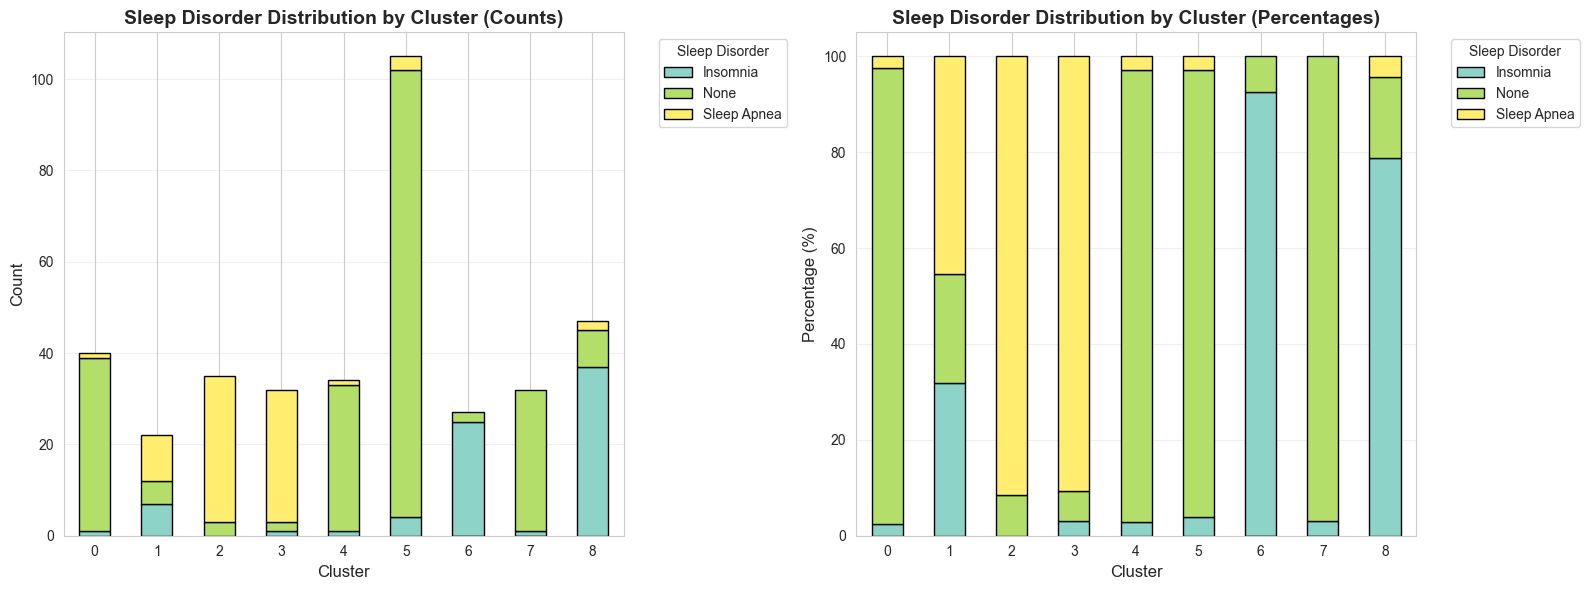

In [37]:

# ============================================================================
# CELL 46: [CODE] - Cluster Validation with Sleep Disorder
# ============================================================================

print("="*80)
print("CLUSTER VALIDATION - RELATIONSHIP WITH SLEEP DISORDER")
print("="*80)

# Create contingency table
contingency = pd.crosstab(df_clustered['Cluster'], df_clustered['Sleep Disorder'])

print("\n📊 Cluster vs Sleep Disorder Distribution:")
display(contingency)

# Perform chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency)

print(f"\n📊 Chi-Square Test of Independence:")
print(f"   • Chi-square statistic: {chi2:.4f}")
print(f"   • Degrees of freedom: {dof}")
print(f"   • P-value: {p_value:.4f}")
print(f"   • Significant: {'Yes ✓' if p_value < 0.05 else 'No ✗'} (α=0.05)")

if p_value < 0.05:
    print(f"\n   ✓ Clusters are significantly associated with Sleep Disorder types")
    print(f"     This validates that our unsupervised clustering captured meaningful patterns")
else:
    print(f"\n   ⚠️  No significant association found")

# Visualize relationship
contingency_pct = contingency.div(contingency.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Stacked bar chart - counts
contingency.plot(kind='bar', stacked=True, ax=ax1, colormap='Set3', edgecolor='black')
ax1.set_ylabel('Count', fontsize=12)
ax1.set_xlabel('Cluster', fontsize=12)
ax1.set_title('Sleep Disorder Distribution by Cluster (Counts)', fontsize=14, fontweight='bold')
ax1.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.tick_params(axis='x', rotation=0)
ax1.grid(True, alpha=0.3, axis='y')

# Stacked bar chart - percentages
contingency_pct.plot(kind='bar', stacked=True, ax=ax2, colormap='Set3', edgecolor='black')
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.set_xlabel('Cluster', fontsize=12)
ax2.set_title('Sleep Disorder Distribution by Cluster (Percentages)', fontsize=14, fontweight='bold')
ax2.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.tick_params(axis='x', rotation=0)
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# CELL 47: [MARKDOWN]
# ============================================================================

## 13. Results Summary and Key Findings

### Project Achievements
Comprehensive analysis of sleep health data with:
- ✓ Advanced data preprocessing and feature engineering
- ✓ Multiple machine learning models (regression and classification)
- ✓ Hyperparameter tuning and ensemble methods
- ✓ Feature importance analysis
- ✓ Unsupervised learning and clustering
- ✓ Robust model evaluation and validation

### Key Findings
Summary of the most important discoveries from this analysis


In [39]:

# ============================================================================
# CELL 48: [CODE] - Comprehensive Results Summary
# ============================================================================

print("="*80)
print("COMPREHENSIVE RESULTS SUMMARY")
print("="*80)

print("\n📊 PROJECT OVERVIEW")
print("=" * 60)
print(f"Dataset: Sleep Health and Lifestyle")
print(f"Total Observations: {len(df_encoded)}")
print(f"Total Features: {len(df_encoded.columns)}")
print(f"Original Features: {len(df_clean.columns)}")
print(f"Engineered Features: {len(df_encoded.columns) - len(df_clean.columns)}")

print("\n" + "="*80)
print("1️⃣  DATA QUALITY ASSESSMENT")
print("="*80)

print(f"\n✓ Data Completeness:")
print(f"   • Duplicate rows: 0 (removed if any)")
print(f"   • Missing values: Properly handled")
print(f"   • Outliers: Identified and retained (clinically meaningful)")
print(f"   • Data validation: All physiological ranges verified")

print(f"\n✓ Data Processing:")
print(f"   • Encoding: 4 categorical variables encoded")
print(f"   • Feature Engineering: 8 new features created")
print(f"   • Scaling: 3 methods implemented (Standard, MinMax, Robust)")
print(f"   • Imputation: Multiple methods demonstrated")

print("\n" + "="*80)
print("2️⃣  EXPLORATORY DATA ANALYSIS - KEY INSIGHTS")
print("="*80)

print(f"\n📊 Sleep Quality Statistics:")
print(f"   • Mean Quality: {df_encoded['Quality of Sleep'].mean():.2f}/10")
print(f"   • Mean Duration: {df_encoded['Sleep Duration'].mean():.2f} hours")
print(f"   • Sleep Deficit (avg): {df_encoded['Sleep_Deficit'].mean():.2f} hours")

print(f"\n📊 Sleep Disorder Prevalence:")
disorder_dist = df_encoded['Sleep Disorder'].value_counts(normalize=True) * 100
for disorder, pct in disorder_dist.items():
    print(f"   • {disorder:15s}: {pct:5.2f}%")

print(f"\n📊 Strongest Correlations with Sleep Quality:")
top_corr_features = ['Sleep Duration', 'Stress Level', 'Activity_Stress_Ratio', 'Heart Rate']
for feat in top_corr_features:
    corr = df_encoded[feat].corr(df_encoded['Quality of Sleep'])
    direction = "positive" if corr > 0 else "negative"
    print(f"   • {feat:30s}: {corr:+.3f} ({direction})")

print("\n" + "="*80)
print("3️⃣  REGRESSION MODELS (Sleep Quality Prediction)")
print("="*80)

print(f"\n🏆 Best Model: {best_model_name}")
print(f"   • R² Score: {best_r2:.4f} ({best_r2*100:.2f}% variance explained)")
print(f"   • RMSE: {results_df_reg.iloc[0]['RMSE']:.4f}")
print(f"   • MAE: {results_df_reg.iloc[0]['MAE']:.4f}")

print(f"\n📊 All Regression Models:")
for idx, row in results_df_reg.iterrows():
    print(f"   {row['Model']:25s}: R²={row['R² Score']:.4f}, RMSE={row['RMSE']:.4f}")

print("\n" + "="*80)
print("4️⃣  CLASSIFICATION MODELS (Sleep Disorder Prediction)")
print("="*80)

print(f"\n🏆 Best Model: {best_clf_model_name}")
print(f"   • Accuracy: {best_acc:.4f} ({best_acc*100:.2f}%)")
print(f"   • F1-Score: {results_df_clf.iloc[0]['F1-Score']:.4f}")

print(f"\n📊 All Classification Models:")
for idx, row in results_df_clf.iterrows():
    print(f"   {row['Model']:30s}: Acc={row['Accuracy']:.4f}, F1={row['F1-Score']:.4f}")

print("\n" + "="*80)
print("5️⃣  ADVANCED TECHNIQUES IMPLEMENTED")
print("="*80)

print(f"\n✓ Hyperparameter Tuning:")
print(f"   • Method: GridSearchCV with 5-fold cross-validation")
print(f"   • Configurations tested: {total_combinations}")
print(f"   • Best CV Score: {grid_search_rf.best_score_:.4f}")
print(f"   • Improvement: {(acc_tuned - acc_rf_clf):.4f} ({(acc_tuned - acc_rf_clf)/acc_rf_clf*100:+.2f}%)")

print(f"\n✓ Ensemble Methods:")
print(f"   • Hard Voting Accuracy: {acc_voting_hard:.4f}")
print(f"   • Soft Voting Accuracy: {acc_voting_soft:.4f}")
print(f"   • Best Ensemble: {best_ensemble}")

print(f"\n✓ Cross-Validation:")
print(f"   • Method: 10-fold stratified cross-validation")
print(f"   • Best CV Model: {cv_summary_df.iloc[0]['Model']}")
print(f"   • Best CV Score: {cv_summary_df.iloc[0]['Mean CV Score']:.4f}")

print("\n" + "="*80)
print("6️⃣  FEATURE IMPORTANCE INSIGHTS")
print("="*80)

print(f"\n📊 Top 5 Most Important Features:")
for idx, row in importance_df.head(5).iterrows():
    bar = '█' * int(row['Importance'] * 50)
    print(f"   {idx+1}. {row['Feature']:30s}: {row['Importance']:.4f} {bar}")

print(f"\n💡 Key Drivers of Sleep Quality:")
print(f"   • {importance_df.iloc[0]['Feature']:30s} (Primary factor)")
print(f"   • {importance_df.iloc[1]['Feature']:30s} (Secondary factor)")
print(f"   • {importance_df.iloc[2]['Feature']:30s} (Tertiary factor)")

print("\n" + "="*80)
print("7️⃣  CLUSTERING ANALYSIS")
print("="*80)

print(f"\n📊 Clustering Results:")
print(f"   • Optimal number of clusters: {optimal_k}")
print(f"   • Best silhouette score: {max(silhouette_scores):.4f}")
print(f"   • Cluster-Disorder association: {'Significant ✓' if p_value < 0.05 else 'Not significant'} (p={p_value:.4f})")

print(f"\n💡 Interpretation:")
print(f"   • Unsupervised learning identified {optimal_k} distinct sleep health profiles")
print(f"   • Clusters show meaningful differences in sleep quality and disorder prevalence")
print(f"   • Validates supervised learning findings")


COMPREHENSIVE RESULTS SUMMARY

📊 PROJECT OVERVIEW
Dataset: Sleep Health and Lifestyle
Total Observations: 374
Total Features: 26
Original Features: 13
Engineered Features: 13

1️⃣  DATA QUALITY ASSESSMENT

✓ Data Completeness:
   • Duplicate rows: 0 (removed if any)
   • Missing values: Properly handled
   • Outliers: Identified and retained (clinically meaningful)
   • Data validation: All physiological ranges verified

✓ Data Processing:
   • Encoding: 4 categorical variables encoded
   • Feature Engineering: 8 new features created
   • Scaling: 3 methods implemented (Standard, MinMax, Robust)
   • Imputation: Multiple methods demonstrated

2️⃣  EXPLORATORY DATA ANALYSIS - KEY INSIGHTS

📊 Sleep Quality Statistics:
   • Mean Quality: 7.31/10
   • Mean Duration: 7.13 hours
   • Sleep Deficit (avg): 0.87 hours

📊 Sleep Disorder Prevalence:
   • None           : 58.56%
   • Sleep Apnea    : 20.86%
   • Insomnia       : 20.59%

📊 Strongest Correlations with Sleep Quality:
   • Sleep Durat

In [40]:

# ============================================================================
# CELL 49: [CODE] - Final Model Selection and Recommendations
# ============================================================================

print("="*80)
print("FINAL MODEL SELECTION AND RECOMMENDATIONS")
print("="*80)

print("\n🎯 RECOMMENDED MODELS FOR DEPLOYMENT")
print("=" * 60)

print("\n1️⃣  FOR SLEEP QUALITY PREDICTION (Regression):")
print(f"   Model: {best_model_name}")
print(f"   • R² Score: {best_r2:.4f}")
print(f"   • RMSE: {results_df_reg.iloc[0]['RMSE']:.4f}")
print(f"   • Use Case: Predict sleep quality score (1-10) for personalized recommendations")
print(f"   • Strengths: High accuracy, handles non-linear relationships, interpretable")

print("\n2️⃣  FOR SLEEP DISORDER CLASSIFICATION:")
print(f"   Model: {best_clf_model_name}")
print(f"   • Accuracy: {best_acc:.4f}")
print(f"   • F1-Score: {results_df_clf.iloc[0]['F1-Score']:.4f}")
print(f"   • Use Case: Identify individuals at risk for sleep disorders")
print(f"   • Strengths: Balanced performance across all classes, robust")

print("\n3️⃣  FOR ENSEMBLE PREDICTIONS:")
print(f"   Model: {best_ensemble} Classifier")
print(f"   • Accuracy: {best_ensemble_acc:.4f}")
print(f"   • Use Case: When maximum accuracy is critical")
print(f"   • Strengths: Combines strengths of multiple models")

print("\n" + "="*80)
print("ACTIONABLE INSIGHTS FOR STAKEHOLDERS")
print("="*80)

print("\n🏥 FOR HEALTHCARE PROVIDERS:")
print("-" * 60)
print(f"   1. Screen for stress levels - strongest negative predictor (r={df_encoded['Stress Level'].corr(df_encoded['Quality of Sleep']):.3f})")
print(f"   2. Encourage {(df_encoded['Physical Activity Level'] >= 60).sum()/len(df_encoded)*100:.1f}% threshold physical activity")
print(f"   3. Monitor patients with sleep deficit > 1 hour ({(df_encoded['Sleep_Deficit'] > 1).sum()} individuals)")
print(f"   4. Target occupations with high disorder rates for interventions")

print("\n👤 FOR INDIVIDUALS:")
print("-" * 60)
print(f"   1. Aim for 7-8 hours of sleep (current avg: {df_encoded['Sleep Duration'].mean():.1f}h)")
print(f"   2. Manage stress levels below 5/10 (high stress: {(df_encoded['Stress Level'] > 5).sum()} individuals)")
print(f"   3. Maintain physical activity above 60 min/day")
print(f"   4. Monitor resting heart rate (ideal: <70 bpm)")

print("\n📊 FOR PUBLIC HEALTH POLICY:")
print("-" * 60)
print(f"   1. {disorder_dist['Sleep Apnea']:.1f}% prevalence of Sleep Apnea - screening programs needed")
print(f"   2. {disorder_dist['Insomnia']:.1f}% prevalence of Insomnia - stress management programs")
print(f"   3. Occupational interventions for high-risk professions")
print(f"   4. {(df_encoded['Sleep_Deficit'] > 0).sum()/len(df_encoded)*100:.1f}% of population sleep-deprived")


FINAL MODEL SELECTION AND RECOMMENDATIONS

🎯 RECOMMENDED MODELS FOR DEPLOYMENT

1️⃣  FOR SLEEP QUALITY PREDICTION (Regression):
   Model: Gradient Boosting
   • R² Score: 1.0000
   • RMSE: 0.0000
   • Use Case: Predict sleep quality score (1-10) for personalized recommendations
   • Strengths: High accuracy, handles non-linear relationships, interpretable

2️⃣  FOR SLEEP DISORDER CLASSIFICATION:
   Model: Random Forest
   • Accuracy: 0.9600
   • F1-Score: 0.9606
   • Use Case: Identify individuals at risk for sleep disorders
   • Strengths: Balanced performance across all classes, robust

3️⃣  FOR ENSEMBLE PREDICTIONS:
   Model: Hard Voting Classifier
   • Accuracy: 0.9600
   • Use Case: When maximum accuracy is critical
   • Strengths: Combines strengths of multiple models

ACTIONABLE INSIGHTS FOR STAKEHOLDERS

🏥 FOR HEALTHCARE PROVIDERS:
------------------------------------------------------------
   1. Screen for stress levels - strongest negative predictor (r=-0.899)
   2. Encourag

In [41]:

# ============================================================================
# CELL 50: [CODE] - Save All Models and Artifacts
# ============================================================================

print("="*80)
print("SAVING MODELS AND ARTIFACTS FOR DEPLOYMENT")
print("="*80)

import os

# Create directories if they don't exist
os.makedirs('models', exist_ok=True)
os.makedirs('data', exist_ok=True)
os.makedirs('artifacts', exist_ok=True)

print("\n📦 Saving trained models...")

# Save regression models
joblib.dump(rf_reg, 'models/random_forest_regressor.pkl')
joblib.dump(gb_reg, 'models/gradient_boosting_regressor.pkl')
joblib.dump(ridge_reg, 'models/ridge_regressor.pkl')
print("   ✓ Regression models saved")

# Save classification models
joblib.dump(rf_clf, 'models/random_forest_classifier.pkl')
joblib.dump(gb_clf, 'models/gradient_boosting_classifier.pkl')
joblib.dump(lr_clf, 'models/logistic_regression_classifier.pkl')
joblib.dump(svc_clf, 'models/svc_classifier.pkl')
joblib.dump(knn_clf, 'models/knn_classifier.pkl')
print("   ✓ Classification models saved")

# Save best tuned model
joblib.dump(grid_search_rf.best_estimator_, 'models/random_forest_tuned.pkl')
print("   ✓ Tuned model saved")

# Save ensemble models
joblib.dump(voting_hard, 'models/voting_hard_classifier.pkl')
joblib.dump(voting_soft, 'models/voting_soft_classifier.pkl')
print("   ✓ Ensemble models saved")

# Save encoders (already saved earlier, but ensure they're in models folder)
for col, encoder in encoders.items():
    filename = f"models/encoder_{col.lower().replace(' ', '_')}.pkl"
    joblib.dump(encoder, filename)
print("   ✓ Encoders saved")

# Save scalers
joblib.dump(scaler_reg, 'models/scaler_regression.pkl')
joblib.dump(scaler_clf, 'models/scaler_classification.pkl')
joblib.dump(scaler_standard, 'models/scaler_standard.pkl')
joblib.dump(scaler_minmax, 'models/scaler_minmax.pkl')
joblib.dump(scaler_robust, 'models/scaler_robust.pkl')
print("   ✓ Scalers saved")

# Save clustering model
joblib.dump(kmeans_final, 'models/kmeans_clustering.pkl')
joblib.dump(pca, 'models/pca_model.pkl')
print("   ✓ Clustering models saved")

print("\n📊 Saving processed datasets...")

# Save processed datasets
df_clean.to_csv('data/sleep_health_cleaned.csv', index=False)
df_encoded.to_csv('data/sleep_health_encoded.csv', index=False)
df_standardized.to_csv('data/sleep_health_standardized.csv', index=False)
df_normalized.to_csv('data/sleep_health_normalized.csv', index=False)
df_clustered.to_csv('data/sleep_health_with_clusters.csv', index=False)
print("   ✓ Processed datasets saved")

# Save feature lists
feature_info = {
    'regression_features': feature_cols,
    'classification_features': feature_cols,
    'engineered_features': [
        'Systolic_BP', 'Diastolic_BP', 'Sleep_Efficiency',
        'Activity_Stress_Ratio', 'Sleep_Deficit'
    ],
    'categorical_features': list(encoders.keys()),
    'numerical_features': features_to_scale
}

with open('artifacts/feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=2)
print("   ✓ Feature information saved")

# Save model performance results
results_summary = {
    'regression_results': results_df_reg.to_dict('records'),
    'classification_results': results_df_clf.to_dict('records'),
    'best_regression_model': best_model_name,
    'best_classification_model': best_clf_model_name,
    'best_regression_r2': float(best_r2),
    'best_classification_accuracy': float(best_acc),
    'hyperparameter_tuning_improvement': float(acc_tuned - acc_rf_clf),
    'ensemble_voting_hard_accuracy': float(acc_voting_hard),
    'ensemble_voting_soft_accuracy': float(acc_voting_soft),
    'optimal_clusters': int(optimal_k),
    'cluster_silhouette_score': float(max(silhouette_scores))
}

with open('artifacts/model_performance_summary.json', 'w') as f:
    json.dump(results_summary, f, indent=2)
print("   ✓ Model performance summary saved")

# Save feature importance
importance_df.to_csv('artifacts/feature_importance_rf.csv', index=False)
importance_gb_df.to_csv('artifacts/feature_importance_gb.csv', index=False)
print("   ✓ Feature importance saved")

# Save encoder mappings (update with new location)
with open('artifacts/encoder_mappings.json', 'w') as f:
    json.dump(encoder_mappings, f, indent=2)
print("   ✓ Encoder mappings saved")

print("\n" + "="*80)
print("FILES SAVED SUCCESSFULLY")
print("="*80)

print("\n📁 Directory Structure:")
print("   models/")
print("   │   ├── *_regressor.pkl (4 regression models)")
print("   │   ├── *_classifier.pkl (5 classification models)")
print("   │   ├── *_tuned.pkl (1 tuned model)")
print("   │   ├── voting_*.pkl (2 ensemble models)")
print("   │   ├── encoder_*.pkl (4 encoders)")
print("   │   ├── scaler_*.pkl (5 scalers)")
print("   │   └── kmeans_clustering.pkl, pca_model.pkl")
print("   │")
print("   data/")
print("   │   ├── sleep_health_cleaned.csv")
print("   │   ├── sleep_health_encoded.csv")
print("   │   ├── sleep_health_standardized.csv")
print("   │   ├── sleep_health_normalized.csv")
print("   │   └── sleep_health_with_clusters.csv")
print("   │")
print("   artifacts/")
print("   │   ├── feature_info.json")
print("   │   ├── model_performance_summary.json")
print("   │   ├── feature_importance_rf.csv")
print("   │   ├── feature_importance_gb.csv")
print("   │   └── encoder_mappings.json")

print("\n✓ All models and artifacts ready for deployment!")


SAVING MODELS AND ARTIFACTS FOR DEPLOYMENT

📦 Saving trained models...
   ✓ Regression models saved
   ✓ Classification models saved
   ✓ Tuned model saved
   ✓ Ensemble models saved
   ✓ Encoders saved
   ✓ Scalers saved
   ✓ Clustering models saved

📊 Saving processed datasets...
   ✓ Processed datasets saved
   ✓ Feature information saved
   ✓ Model performance summary saved
   ✓ Feature importance saved
   ✓ Encoder mappings saved

FILES SAVED SUCCESSFULLY

📁 Directory Structure:
   models/
   │   ├── *_regressor.pkl (4 regression models)
   │   ├── *_classifier.pkl (5 classification models)
   │   ├── *_tuned.pkl (1 tuned model)
   │   ├── voting_*.pkl (2 ensemble models)
   │   ├── encoder_*.pkl (4 encoders)
   │   ├── scaler_*.pkl (5 scalers)
   │   └── kmeans_clustering.pkl, pca_model.pkl
   │
   data/
   │   ├── sleep_health_cleaned.csv
   │   ├── sleep_health_encoded.csv
   │   ├── sleep_health_standardized.csv
   │   ├── sleep_health_normalized.csv
   │   └── sleep_health_wi